# Libraries Required

In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from tqdm import tqdm as tq
from pre_processing_profiles import pre_processing_profiles as pre_processing_profiles
from pre_processing_posts import pre_processing_posts as pre_posts
import datetime
import random
from IPython.display import display
import collections
from statistics import mean
from matplotlib import style
from collections import Counter
import scipy.stats as stats
import csv
import re
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
from cleantext import clean
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('words')
import time







# RQ1
## After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our datasets? Please summarise its main characteristics with visual and tabular methods.

We decided to use AWS Sagemaker to do the project. We used the three datasets that are already mounted to the AWS, downloaded them in a Data folder in Sagemaker and unzip them by using Terminal. So now we can read the CSV data with Pandas. 


Start to do the Exploratory Data Analysis:

### ` instagram_Profiles Data : `

In [2]:
# Read the data with pandas libarary
dfPr = pd.read_csv("./Data/instagram_profiles.csv", sep = "\t")

In [3]:
# we can see the firt five rows of our data
dfPr.head()

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,4184461,1.472039e+09,tec1025,Thomas Clark,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,4184462,3.531421e+09,luckyfluff,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN


The number of rows of Profile data set is 4509586, and the number of columns is 11

In [4]:
#Determine these information about the instagram_Profile dataset: index dtype and columns, non-null values and memory usage.
dfPr.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509586 entries, 0 to 4509585
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   sid                  4509586 non-null  int64  
 1   profile_id           4477139 non-null  float64
 2   profile_name         4509586 non-null  object 
 3   firstname_lastname   4221121 non-null  object 
 4   description          2453590 non-null  object 
 5   following            3452771 non-null  float64
 6   followers            3452771 non-null  float64
 7   n_posts              3452771 non-null  float64
 8   url                  870274 non-null   object 
 9   cts                  4071098 non-null  object 
 10  is_business_account  3445323 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 378.5+ MB


A brief summary of our data to get a better understanding of the data:
According to the two above cells, we can see that out of 11 columns, we have 1 boolean, 4 float, 1 integer and 6 object.
The is_business_account is a binary categorical column.
We have null values in all columns except in sid and profile_name columns.

In [5]:
#Check if the Profile dataset contains any duplicate data or
duplicates = dfPr.duplicated()
duplicates[duplicates == True].empty

True

The instagram_Profile data doesn't have any duplicate data.

In [6]:
#Total number of the null values
dfPr.isnull().sum().sum()

10689416

In [7]:
#Number of the rows that contain at least one null value
np.count_nonzero(dfPr.isnull().sum(axis=1)!=0)

3763522

As we understood from the section above, we have 3763522 rows that contain null values.
But according to the columns of the data, we can drop some columns that are just for indexing and are not necessary.
We are going to drop sid, profile_name and firstname_lastname columns and just keeping the profile_id column for hashing purposes.
In order to make this changes and keep our main dataframe without manipulation, first we will make a copy of the dfPr and work with it.

In [3]:
#We take a copy of our main data and work on it in order to keep our main data without manipulation and not to import it 
#for multiple times.
dfPr2 = dfPr.copy()

In [4]:
#Drop some columns
dfPr2.drop(["sid", "profile_name","firstname_lastname"], axis=1, inplace = True)
dfPr2

,profile_id,description,following,followers,n_posts,url,cts,is_business_account
0,4.721050e+09,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,5.905830e+08,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,1.074147e+09,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,1.472039e+09,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,3.531421e+09,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN
...,...,...,...,...,...,...,...,...
4509581,1.418322e+09,🙏🏻,468.0,481.0,497.0,NaN,2019-08-01 14:40:26.554 -0400,False
4509582,1.340704e+07,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:41.628 -0400,NaN
4509583,6.007354e+09,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:42.983 -0400,NaN
4509584,2.338990e+07,Fashion - travel - photography ... that's me!👗...,504.0,153.0,183.0,NaN,2019-08-01 14:40:49.982 -0400,False


Now, we are going to codify description and url columns to boolean data to make them compatible to the compiler. In the description column, instead of the profiles that have despriptions we put true and for the NaN value put False. In the url column, if there exists a url, we replace it with True otherwise False.

In [5]:
#Encoding 'description' content to boolean data.
dfPr2['description'] = dfPr2['description'].apply(lambda x: False if pd.isnull(x) else True)
dfPr2

,profile_id,description,following,followers,n_posts,url,cts,is_business_account
0,4.721050e+09,True,250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,5.905830e+08,True,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,1.074147e+09,True,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,1.472039e+09,False,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,3.531421e+09,False,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN
...,...,...,...,...,...,...,...,...
4509581,1.418322e+09,True,468.0,481.0,497.0,NaN,2019-08-01 14:40:26.554 -0400,False
4509582,1.340704e+07,False,NaN,NaN,NaN,NaN,2019-08-01 14:40:41.628 -0400,NaN
4509583,6.007354e+09,False,NaN,NaN,NaN,NaN,2019-08-01 14:40:42.983 -0400,NaN
4509584,2.338990e+07,True,504.0,153.0,183.0,NaN,2019-08-01 14:40:49.982 -0400,False


In [6]:
#Encoding 'url' content to boolean data.
dfPr2['url'] = dfPr2['url'].apply(lambda x: False if pd.isnull(x) else True)
dfPr2

,profile_id,description,following,followers,n_posts,url,cts,is_business_account
0,4.721050e+09,True,250.0,146.0,170.0,False,2019-08-01 14:38:55.394 -0400,False
1,5.905830e+08,True,534.0,1145.0,2878.0,True,2019-08-01 14:39:36.526 -0400,False
2,1.074147e+09,True,469.0,324.0,431.0,True,2019-08-01 14:39:54.407 -0400,False
3,1.472039e+09,False,NaN,NaN,NaN,False,2019-08-01 14:40:06.472 -0400,NaN
4,3.531421e+09,False,NaN,NaN,NaN,False,2019-08-01 14:40:07.806 -0400,NaN
...,...,...,...,...,...,...,...,...
4509581,1.418322e+09,True,468.0,481.0,497.0,False,2019-08-01 14:40:26.554 -0400,False
4509582,1.340704e+07,False,NaN,NaN,NaN,False,2019-08-01 14:40:41.628 -0400,NaN
4509583,6.007354e+09,False,NaN,NaN,NaN,False,2019-08-01 14:40:42.983 -0400,NaN
4509584,2.338990e+07,True,504.0,153.0,183.0,False,2019-08-01 14:40:49.982 -0400,False


In [12]:
# Number of rows and columns that contain the Null values after dropping some columns
dfPr2[dfPr2.isnull().sum(axis=1)!=0].shape

(1180398, 8)

With the above code, we found that after doing some changes in the dataset, now we have 1180398 rows with null values. We have 2 main ways to handle the missing values: Removing data and imputation. In this case, we cannot drop(remove) the null values, because the number of the null values in comparison to the total dataset is too big (almost one-third). For imputation we can use Mean, Median and Mode or interpolation/extrapolation but in our case we have sampled data randomly out of independent user value. It means that we are not able to fill the null values by help of the other values.

<b>Outliers:</b> The outliers are the extreme values within the dataset. Outliers can have a big impact on statistical analysis because they impact calculations like mean and standard deviation. We can use various techniques to visualize and identify outliers before deciding whether they should be dropped, kept, or modified. 

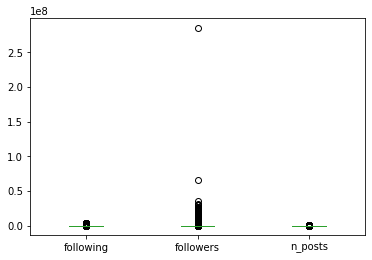

In [13]:
#Plot the boxplot in order to check if we have outliers or not
numeric_col = ["following" , "followers" , "n_posts"]
dfPr2.boxplot(numeric_col)
plt.grid(False)

By watching the boxplot we figure out that we have outliers in all tree numerical columns. So we are going to determine the exact number of the outliers.

In [2]:
#Finding outliers using statistical methods
#create a function to find outliers using IQR

def find_outliers_IQR(df):
    
   q1=df.quantile(0.25) 

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [8]:
#Outliers of the "following" column
followingOutliers = find_outliers_IQR(dfPr2["following"])  

print("number of outliers: "+ str(len(followingOutliers)))

print("max outlier value: "+ str(followingOutliers.max()))

print("min outlier value:"+ str(followingOutliers.min()))

number of outliers: 370009
max outlier value: 4191080.0
min outlier value:3399.0


In [16]:
#outliers of the "followers" column
followersOutliers = find_outliers_IQR(dfPr2["followers"])  

print("number of outliers: "+ str(len(followersOutliers)))

print("max outlier value: "+ str(followersOutliers.max()))

print("min outlier value:"+ str(followersOutliers.min()))

number of outliers: 385054
max outlier value: 285457645.0
min outlier value:2197.0


In [17]:
#outliers of the "n_posts" column
postsOutliers = find_outliers_IQR(dfPr2["n_posts"])  

print("number of outliers: "+ str(len(postsOutliers)))

print("max outlier value: "+ str(postsOutliers.max()))

print("min outlier value:"+ str(postsOutliers.min()))

number of outliers: 349151
max outlier value: 183730.0
min outlier value:1018.0


In [18]:
#Lets write a code to drop the outliers
ls = set([*find_outliers_IQR(dfPr2['following']).index.tolist() , *find_outliers_IQR(dfPr2['followers']).
          index.tolist(), *find_outliers_IQR(dfPr2['n_posts']).index.tolist()])
dfPr2.drop(ls, inplace = True)

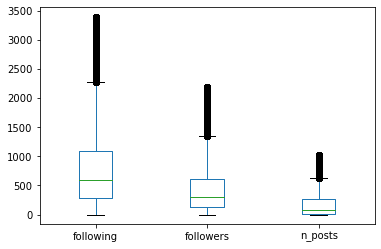

In [19]:
# Plotting the boxplot after dropping outliers
dfPr2.boxplot(numeric_col)
plt.grid(False)

We can normalize the data set to have a better understanding and compareability. The challenge here would be to handle the NULL values which prevent us to perform normalization.
Due to the size of the NULL values (Around 1 million), we need to decide whether we can afford deleting them or not.

We can normalize the dataset through:

**dfNormalized = (dfPr2 - dfPr2.mean()) / dfPr2.std()**


In [20]:
valuesD, frequencyD = np.unique(dfPr2.description.astype('str'), return_counts=True)

In [21]:
valuesU, frequencyU = np.unique(dfPr2.url.astype('str'), return_counts=True)

In [22]:
valuesB, frequencyB = np.unique(dfPr2.is_business_account.astype(str), return_counts=True)

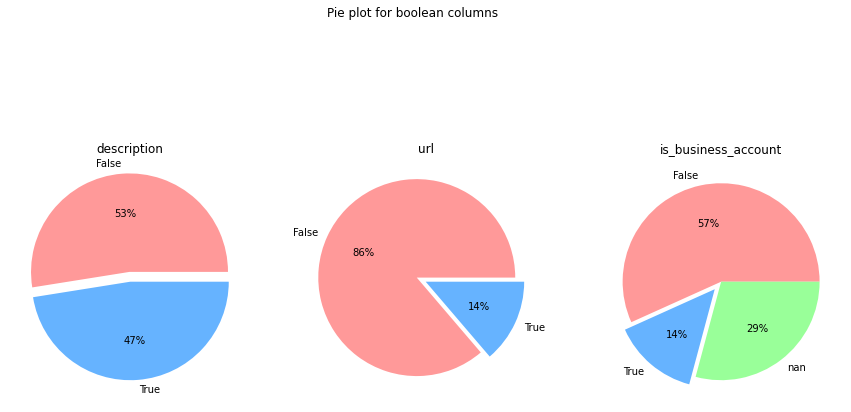

In [23]:
#plotting pie chart for boolean columns
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode1= (0.1,0)
explode2= (0,0.1,0)
fig, axes = plt.subplots(1,3, figsize =(15,8))
fig.suptitle('Pie plot for boolean columns')
axes[0].pie(frequencyD, labels=valuesD, explode=explode1, colors= colors, autopct='%.0f%%')
axes[0].set_title('description')
axes[1].pie(frequencyU, labels=valuesU, explode=explode1, colors= colors, autopct='%.0f%%')
axes[1].set_title('url')
axes[2].pie(frequencyB, labels=valuesB,explode=explode2, colors= colors, autopct='%.0f%%')
axes[2].set_title('is_business_account')
plt.show()

According to the above pie charts, we can figure out that more than half of our users(53%) have 'description' in their instagram' bio, only 14% of our users have 'url' and also, 14% of our users'instagram accout is bussiness type.

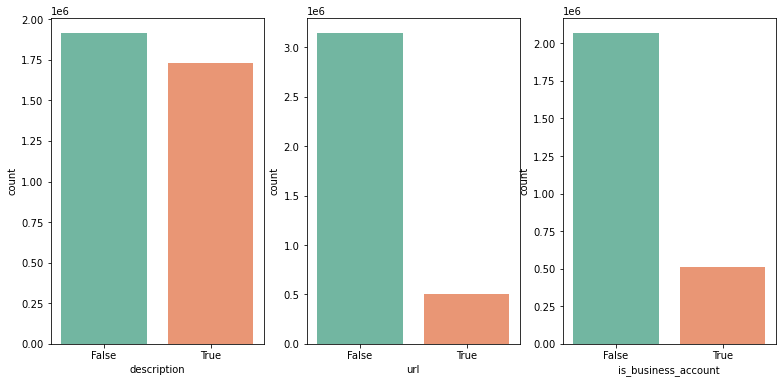

In [24]:
#Distribution of our boolean data
fig, ax =plt.subplots(1 , 3 , figsize = (13,6))
sns.countplot(x= dfPr2['description'], ax=ax[0], palette = "Set2")
sns.countplot(x= dfPr2['url'], ax=ax[1], palette = "Set2")
sns.countplot(x= dfPr2['is_business_account'], ax=ax[2], palette = "Set2")
fig.show()

<b>Countplot</b> is used to Show the counts of observations in each categorical bin using bars.

According to the above charts, most of our users are not bussines account and don't have url in their instagrams' bio. Also the number of the users that have description is a bit less than the users that have description. 

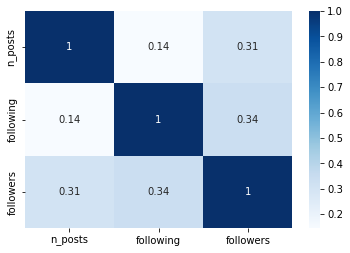

In [25]:
#plotting correlation heatmap
sns.heatmap(dfPr2[['n_posts', 'following', 'followers']].corr(), annot=True , cmap='Blues')
plt.show()

<b>Correlation heatmap :</b> This plot allows us to inspect the dataset easily and understand the relationship between variables. We have tree numerical variables in this dataset, as we can see there is no notable relationship between these tree variables. Approximately, there is no relation between the number of the posts, followers and following of an account. 

In [26]:
# Dropping Null values. Drop the rows that they have null values in "followers" and "following" columns.
dfPr2.dropna(subset=['followers' , 'following'], inplace=True)

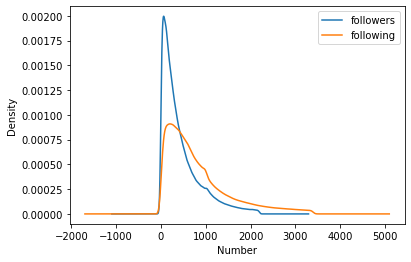

In [27]:
#plotting the density plot for tree numerical variables
fig, ax = plt.subplots(1,1)
for s in [dfPr2.followers, dfPr2.following]:
    s.plot.density()

# Plot formatting
plt.legend(["followers", "following"])
plt.xlabel('Number')
plt.ylabel('Density')
plt.show()

A <b>density plot</b> is a smoothed, continuous version of a histogram estimated (kernel density estimation) from the data. In a density plot the x-axis is the value of the variable, and y-axis is the probability density function for the kernel density estimation.

We created a density curve to capture the “shape” of this distribution, in the above plot these two plots are right skewed, it means the mean is greater than the median. Totally, the number of the 'following' is more than 'followers', because the desnsity around the zero for followers is more than the following.

### ` instagram_Locations Data : `

In [27]:
# Read the Location data with pandas
dfLoc = pd.read_csv("./Data/instagram_locations.csv" , sep = "\t")

In [28]:
# See the first five rows
dfLoc.head()

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.341864,34.153265,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703


In [29]:
# Determine the columns of dfLoc
dfLoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022658 entries, 0 to 1022657
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   sid                     1022658 non-null  int64  
 1   id                      1022658 non-null  int64  
 2   name                    1022658 non-null  object 
 3   street                  715704 non-null   object 
 4   zip                     715579 non-null   object 
 5   city                    937166 non-null   object 
 6   region                  1760 non-null     object 
 7   cd                      939010 non-null   object 
 8   phone                   601688 non-null   object 
 9   aj_exact_city_match     1000510 non-null  object 
 10  aj_exact_country_match  1000510 non-null  object 
 11  blurb                   406705 non-null   object 
 12  dir_city_id             495698 non-null   object 
 13  dir_city_name           495698 non-null   object 
 14  di

This dataset contains 1022658 rows and 23 columns. As we can understand from the above code, the number of the null values in 'region' columns is very big, according to the number of the whole data. So we will drop this column.

In [30]:
#Check if the Location data contains any duplicate data or not
duplicates = dfLoc.duplicated()
duplicates[duplicates == True].empty
#The Location data doesn't have any duplicate data.

True

In [31]:
#Number of null values for each feature
dfLoc.isna().sum()

sid                             0
id                              0
name                            0
street                     306954
zip                        307079
city                        85492
region                    1020898
cd                          83648
phone                      420970
aj_exact_city_match         22148
aj_exact_country_match      22148
blurb                      615953
dir_city_id                526960
dir_city_name              526960
dir_city_slug              527437
dir_country_id             527030
dir_country_name           526960
lat                          6163
lng                          6163
primary_alias_on_fb        597127
slug                        80990
website                    399396
cts                             0
dtype: int64

In [32]:
# The shape of the null values, the number of the rows that contain null values
dfLoc[dfLoc.isnull().sum(axis=1)!=0].shape

(1022658, 23)

According to the number of null values, at least we have one Null value in each row. So because of the big number of null values in comparison to the data, we will not drop all the null values.
But by watching the result of the above code, we have to drop some rows that contain the big number of null values

In [33]:
#We take a copy of our main data and work on it in order to keep our main data withou tmanipulation.
dfLoc2 = dfLoc.copy()

In [34]:
#drop some columns
dfLoc2.drop(["region", "blurb", "primary_alias_on_fb", "id", "name"], axis=1, inplace = True)
dfLoc2

,sid,street,zip,city,cd,phone,aj_exact_city_match,aj_exact_country_match,dir_city_id,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,slug,website,cts
0,719981,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,-0.139475,38.974391,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,NaN,NaN,Nová Vieska,SK,NaN,True,False,c2168642,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,Himalayas,+977,"Kathmandu, Nepal",NP,NaN,False,False,c1670320,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,"65, rue des Grands-Moulins",75013,"Paris, France",FR,01 81 69 18 00,False,False,c2871953,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,3800 W Alameda Ave,91505,"Burbank, California",US,(818) 569-7500,False,False,NaN,NaN,NaN,NaN,NaN,-118.341864,34.153265,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022653,719973,Suarez de Figueroa # 380,NaN,"Santa Cruz de la Sierra, Bolivia",BO,69118383,False,False,c238308,Santa Cruz de la Sierra,santa-cruz-de-la-sierra,BO,Bolivia,-63.185307,-17.786130,baby-season,NaN,2019-05-29 01:20:57.078
1022654,719975,NaN,NaN,NaN,NaN,+52 81 2089 7776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.359619,25.653550,cueva-carvajal,http://www.cuevacarvajal.mx,2019-05-29 01:21:04.434
1022655,719977,304 Orland Square Dr,60462,"Orland Park, Illinois",US,(708) 873-3747,False,False,c2774592,Manor Homes,manor-homes,US,United States,-87.843649,41.618551,the-cheesecake-factory,http://locations.thecheesecakefactory.com/il/o...,2019-05-29 01:21:13.404
1022656,719979,2 Gilmer Terrace,NaN,"Wellington, New Zealand",NZ,NaN,False,False,NaN,NaN,NaN,NaN,NaN,174.775000,-41.285800,plimmer-towers,NaN,2019-05-29 01:21:21.628


In <b> Location </b> dataset there are some approaches that can be done in order to drop some columns, for example the first tree columns(sid, id, nsme) are just for identifying so we can keep one of them. With having the langtitude and latitude of a region, we can figure out cd, street, region, zip and city by providing mapping, so these columns can be dropped. In addition, the dir data(dir_city_id,  dir_city_name, dir_city_slug, dir_country_id, dir_country_name) are internal hashing of instagram that provide the information about the location.

In [35]:
#find the number of unique country in this column
len(np.unique(dfLoc2.cd.astype(str)))

246

There is 246 unique country code in the cd column 

In [36]:
value, frequency= np.unique(dfLoc2.cd.astype(str), return_counts = True)    

In [38]:
#finding the six countries that have the most frequency in location data set
sortTemp = frequency.argsort()
sortedFreq = frequency[sortTemp[::-1]]
sortedValue = value[sortTemp[::-1]]
pieValue = sortedFreq[:7]
pieLabel = sortedValue[:7]
pieValue = np.append(pieValue, np.sum(sortedFreq[7:]))
pieLabel = np.append(pieLabel,'Other')
pieValue = np.delete(pieValue, 2)
pieLabel = np.delete(pieLabel, 2)

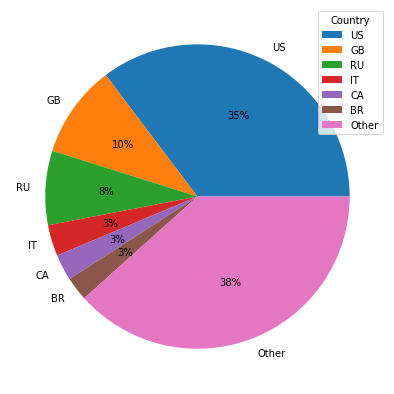

In [40]:
#plot the pie plot for the six countries with most frequencies
plt.pie(pieValue, labels=pieLabel, autopct='%.0f%%')
plt.legend(title = "Country")
plt.rcParams['figure.figsize'] = [15, 7]
plt.show()

According to the above pie plot, US has the most frequency in our dataset, it means that 35% of our posts are posted in US.

### ` instagram_Posts Data : `

In [2]:
#making a sample dataframe just by taking the first 100 rows 
sampleChunkSize = 100;
dfSample = pd.read_csv("Data/instagram_posts.csv", delimiter='\t', chunksize=sampleChunkSize)

In [3]:
#Posts dataset contains 10 columns and 42,710,197 rows
dfSample.get_chunk(10)

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,2237947779,1022366247837915,2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80,0
1,28370932,-1,BVg0pbolYBC,5579335020,457426771112991,2017-06-19 09:31:16.000,1,🙌🏼 believe in ya dreams 🙌🏼 just like I believe...,25,1
2,28370933,-1,BRgkjcXFp3Q,313429634,457426771112991,2017-03-11 20:05:03.000,1,#meraviglia #incensi #the #candele #profumo #a...,9,0
3,28370934,-1,BKTKeNhjEA7,1837592700,457426771112991,2016-09-13 16:27:16.000,1,#teatime #scorpion #friends #love #mountains #...,4,0
4,28370935,-1,8-NQrvoYLX,1131527143,457426771112991,2015-10-18 10:19:27.000,1,thE sky gavE mE a #constEllation,8,0
5,28370964,-1,BrYDPJeABJQ,16262389,282618748,2018-12-14 18:16:15.000,1,#beautiful #Christmas #lights,138,15
6,28370957,-1,BmQ418mgSnL,35673872,282618748,2018-08-09 17:53:46.000,1,As per your suggestion. #themerrytriotakeslondon,389,10
7,28370960,-1,Bm1YQ3Hn1gJ,840873396,282618748,2018-08-23 22:00:59.000,1,-Blue-💙,198,23
8,28370961,-1,2qBVjbTgzi,329994,282618748,2015-05-14 11:02:05.000,1,everything still feels so surreal ☁️,127,8
9,28370962,-1,BP5ViC6gaEf,360796468,282618748,2017-01-30 17:52:01.000,1,Guinness O'clock 🍺🍺 #london #pub #guinness #love,154,6


As we know the size of the post data is so big, so in order to explore this data we can evaluate the columns separately.

### Post Type Column
In this section we evaluate 'post_type' column

In [5]:
# Importing post type column in chunks with chunkSize=100000
dfPostType = pd.DataFrame()
chunks = 100000
for chunk in tqdm(pd.read_csv('Data/instagram_posts.csv', delimiter='\t', usecols=['post_type'], chunksize=chunks)):
    dfPostType=pd.concat([dfPostType, chunk], axis=0)

428it [39:37,  5.56s/it]


In [6]:
#We take a copy of our main data and work on it in order to keep our main data without manipulation
dfPostTypeCopy = dfPostType.copy()

In [7]:
#information for 'PostType' column
dfPostType.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42710197 entries, 0 to 42710196
Data columns (total 1 columns):
 #   Column     Non-Null Count     Dtype
---  ------     --------------     -----
 0   post_type  42710197 non-null  int64
dtypes: int64(1)
memory usage: 325.9 MB


In [14]:
#the number of the null values in postType column is zero
dfPostType.isnull().sum().sum()

0

In [19]:
# Find the frequency of each post type within the dataset
vals, frequency = np.unique(dfPostTypeCopy, return_counts=True)
postType = {vals[0]:"Photo", vals[1]:"Video", vals[2]:"Multi"}

In [20]:
print("The frequency of each post type and its proportion WRT the whole dataset:")
for val, freq in zip(postType.values(), frequency):
    print(f"{val} : {freq} - {freq/len(dfPostTypeCopy)*100:{2}.{4}}%")

The frequency of each post type and its proportion WRT the whole dataset:
Photo : 41534486 - 97.25%
Video : 1134768 - 2.657%
Multi : 40943 - 0.09586%


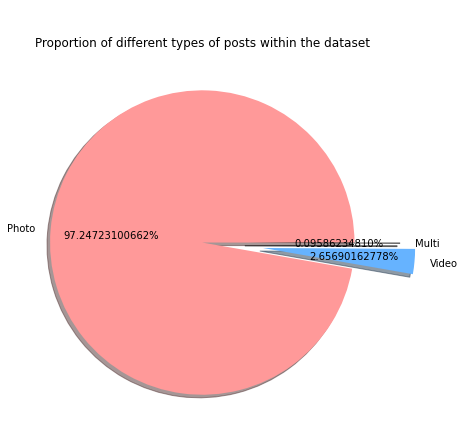

In [22]:
#plotting the pie plot for 'PostType' column
plt.figure(figsize=(7,7))
explodeVals = (0, 0.4, 0.3)
colors =  ['#ff9999','#66b3ff', '#000000']
plt.pie(frequency, labels=postType.values(), explode=explodeVals, colors=colors, autopct='%1.11f%%', shadow=True)
plt.title('\n\nProportion of different types of posts within the dataset')
plt.show()

According to the above pie plt, that shows the proportions of different types of the posts(Photo, Video, Multi).We figure out that the most of our posts are photos, and the amount of the videos and multies in comparision with photos are very low.

In [18]:
# Deleting this column to free up the memory
del dfPostType

### Number of Likes Column
In this section we evaluate 'numbr_likes' column

In [8]:
# Importing number of likes column in chunks with chunkSize=100000
dfNumLikes = pd.DataFrame()
chunks = 100000
for chunk in tqdm(pd.read_csv('Data/instagram_posts.csv', delimiter='\t', usecols=['numbr_likes'], chunksize=chunks)):
    dfNumLikes=pd.concat([dfNumLikes, chunk], axis=0)

428it [02:46,  2.57it/s]


In [9]:
#We take a copy of our main data and work on it in order to keep our main data without manipulation
dfNumLikesCopy = dfNumLikes.copy()

In [10]:
dfNumLikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42710197 entries, 0 to 42710196
Data columns (total 1 columns):
 #   Column       Dtype  
---  ------       -----  
 0   numbr_likes  float64
dtypes: float64(1)
memory usage: 325.9 MB


In [11]:
# Number of null values
dfNumLikesCopy.isnull().sum().sum()

36

In [12]:
# Dropping null values
dfNumLikesCopy.dropna(inplace=True)

In [13]:
dfNumLikesCopy.describe()

,numbr_likes
count,4.271016e+07
mean,2.835030e+02
std,6.124611e+03
min,0.000000e+00
25%,2.000000e+01
50%,4.600000e+01
75%,1.140000e+02
max,8.822952e+06


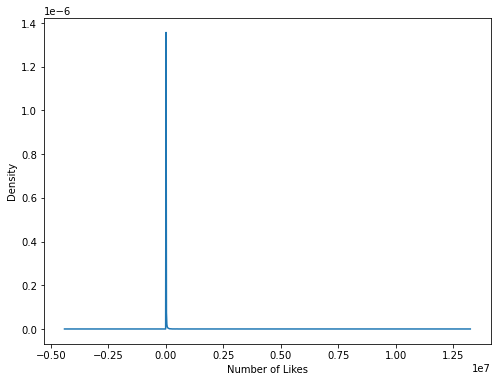

In [27]:
# Plotting the density of number of likes
plt.figure(figsize=(8,6))
ax = dfNumLikesCopy['numbr_likes'].plot.density()
plt.xlabel('Number of Likes')
plt.ylabel('Density')
plt.show()

In [14]:
#Finding outliers using statistical methods
numLikesOutliers = find_outliers_IQR(dfNumLikesCopy['numbr_likes'])

In [15]:
# Dropping outliers
dfNumLikesCopy.drop(index=numLikesOutliers.index, inplace=True)

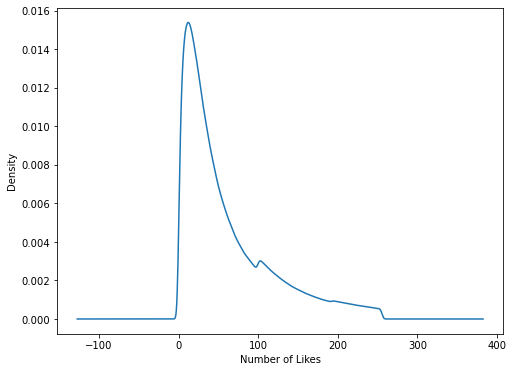

In [16]:
# Plotting the density of number of likes after dropping outliers
plt.figure(figsize=(8,6))
ax = dfNumLikesCopy['numbr_likes'].plot.density()
plt.xlabel('Number of Likes')
plt.ylabel('Density')
plt.show()

As you can see above, the distribution is right-skewed which means the mode, median and the mean are all different in this way. In fact in right-skewed distributions mean>mode.

In [17]:
# Deleting the this column to free up the memory
del dfNumLikes

### Number of Comments Column
In this section we evaluate 'number_comments' column

In [26]:
# Importing number of likes column in chunks with chunkSize=100000
dfNumComments = pd.DataFrame()
chunks = 100000
for chunk in tqdm(pd.read_csv('Data/instagram_posts.csv', delimiter='\t', usecols=['number_comments'], chunksize=chunks)):
    dfNumComments=pd.concat([dfNumComments, chunk], axis=0)

428it [02:14,  3.18it/s]


In [27]:
#We take a copy of our main data and work on it in order to keep our main data without manipulation
dfNumCommentsCopy = dfNumComments.copy()

In [28]:
dfNumComments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42710197 entries, 0 to 42710196
Data columns (total 1 columns):
 #   Column           Dtype  
---  ------           -----  
 0   number_comments  float64
dtypes: float64(1)
memory usage: 325.9 MB


In [26]:
dfNumComments.describe()

,number_comments
count,4.271016e+07
mean,7.595308e+00
std,1.941476e+02
min,0.000000e+00
25%,0.000000e+00
50%,2.000000e+00
75%,5.000000e+00
max,4.889530e+05


In [29]:
# Dropping null and dupplicate values
dfNumCommentsCopy.dropna(inplace=True)
dfNumCommentsCopy.drop_duplicates(inplace=True)

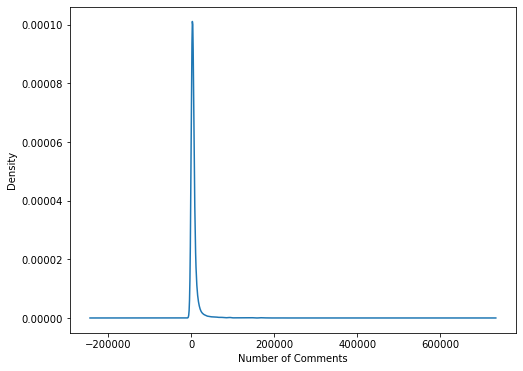

In [28]:
# Plotting the density of number of likes before droppingbm outliers
plt.figure(figsize=(8,6))
ax = dfNumCommentsCopy['number_comments'].plot.density()
plt.xlabel('Number of Comments')
plt.ylabel('Density')
plt.show()

Before dropping the outliers, as we can see in the figure above, the density chart has the most density around the zero. 

In [30]:
numCommentsOutliers = find_outliers_IQR(dfNumCommentsCopy['number_comments'])

In [31]:
# Dropping outliers from the dataset
dfNumCommentsCopy.drop(index=numCommentsOutliers.index, inplace=True)

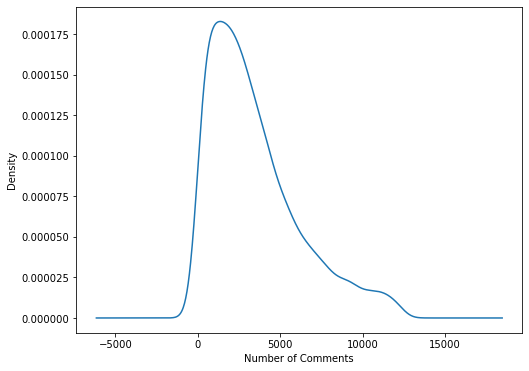

In [31]:
# Plotting the density of number of likes after dropping outliers
plt.figure(figsize=(8,6))
ax = dfNumCommentsCopy['number_comments'].plot.density()
plt.xlabel('Number of Comments')
plt.ylabel('Density')
plt.show()

After dropping the outliers, we can easily see the density of number of the comments in the figure blow. It has the most density between period of 0 to 5000

In [32]:
# Correlation between number of likes and number of comments
dfNumCommentsCopy['number_comments'].corr(dfNumLikes['numbr_likes'])

0.3389511504380232

In [32]:
# Concatenating data frames
dfTemp = pd.concat([dfPostType, dfNumLikes, dfNumComments], axis= 1)

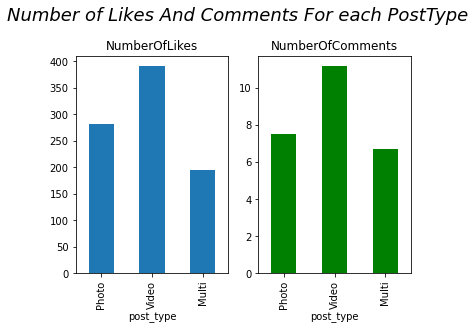

In [47]:
# Plot the bar chart to see the amount of the Likes and Comments for different types of posts
labels = ["Photo", "Video", "Multi"]

#plot1
plt.subplot(1, 2, 1)
dfTemp1 = dfTemp.groupby(['post_type'])['numbr_likes'].mean()
ax1 = dfTemp1.plot(kind='bar')
ax1.set_xticks([0,1,2], labels)
plt.title("NumberOfLikes")

#plot2
plt.subplot(1, 2, 2)
dfTemp2 = dfTemp.groupby(['post_type'])['number_comments'].mean()
ax2 = dfTemp2.plot(kind='bar', color='g')
ax2.set_xticks([0,1,2], labels)
plt.title("NumberOfComments")



plt.suptitle("Number of Likes And Comments For each PostType",y=1.05, fontsize=18, style='italic')
plt.show()

As we can see in the above bar plots, the number of the likes and comments for posts that contain video is more than the other types of the post. Also, multi posts earned the least number of likes and comments.

# RQ2

## Let's explore the dataset by finding simple insights regarding the profile and posts.

### RQ-2.1 Plot the number of posts for each profile in descending order.

##### Approach: 
    
>#####    - To get the values for Number of posts by all the user I use profiles dataset to get the required values.  
>#####    - I read the profiles data in chunks of size=10000 and get the columns n_posts and profile_id.  
>#####    - I sort the obtained rows on the basis of values in n_posts column and sort them in descending order.
>#####    - I plot a scatter plot with Number of posts v/s Profile_id
    

46it [00:07,  6.45it/s]


Text(0, 0.5, 'Number of Posts')

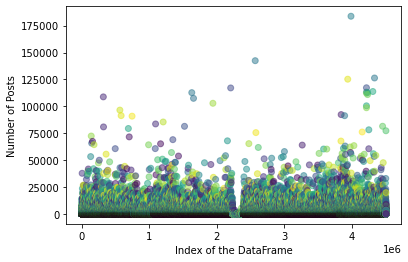

In [26]:

for j,i in tq(enumerate(pd.read_csv('/home/ec2-user/SageMaker/Data/instagram_profiles.csv',sep='\t',usecols=['profile_id','n_posts'],chunksize=100000))):
        i=i.dropna()
        df_nposts=pd.concat([df_nposts,pre_processing_profiles(i)],axis=0) if j!=0 else pre_processing_profiles(i)
        
colors=np.random.rand(len(df_nposts))
plt.scatter(y=df_nposts.n_posts.values,x=df_nposts.index,c=colors,alpha=0.5)
plt.xlabel('Index of the DataFrame')
plt.ylabel('Number of Posts')

###Scatter Plot/histogram 


### RQ 2.2 What posts have the highest number of "likes"?
##### *Approach*:
>#####    - To get the values for Number of likes for all the posts I use posts dataset to get the required values.  
>#####    - I read the posts data in chunks of size=40000 and get the columns numbr_likes and post_id  
>#####    - I sort the obtained rows on the basis of values in nuber_likes column and sort them in descending order.
>#####    - I take the top post with highest number of likes for each chunk and combined all the top post for all the chunks in df_likes Dataframe.
>#####    - Finally,I sort the df_likes in descending order and retrive the post with highest likes among all the stores chunks top post.



In [2]:

for i,chunk in tq(enumerate(pd.read_csv('/home/ec2-user/SageMaker/Data/instagram_posts.csv',usecols=['post_id','numbr_likes'],sep='\t',chunksize=40000))):
       
    df_likes=pd.concat([df_likes,chunk.sort_values(by='numbr_likes',ascending=False).head(1)],axis=0) if i!=0 else chunk.sort_values(by='numbr_likes',ascending=False).head(1)
   

df_likes=df_likes.sort_values(by='numbr_likes',ascending=False)
print('The post with post-id {0} has {1} number of likes which is the maximum among the dataset'.format(str(df_likes['post_id'].head(1).values[0]),str(df_likes['numbr_likes'].head(1).values[0])))    

    

1068it [55:38,  3.13s/it]

The post with post-id Bt3yaXmAM0d has 8822952.0 number of likes which is the maximum among the dataset




### RQ2.3 What posts have the most and the least number of comments?
#### *Approach*:
>#####    - To get the values for Number of likes for all the posts I use posts dataset to get the required values.  
>#####    - I read the posts data in chunks of size=10000 and get the columns number_comments and post_id  
>#####    - I sort the obtained rows on the basis of values in number_comments and sort them in descending order.
>#####    - I take the top post with highest number of cooments for each chunk and the post with least number of comment in sorted chunk using head() and tail() function.
>#####    - I store the highest comment in df_max_comment and least comments in df_min_comment. I combine all the values for all chunks in the respective DataFrame.
>#####    - Finally,I sort the df_max_comments in descending order to retrive the post with highest number of among all the stored chunks.
>#####    - Finally,I sort the df_min_comments in ascending order to retrive the post with least number of among all the stored chunks.



In [2]:
for i,chunk in tq(enumerate(pd.read_csv('/home/ec2-user/SageMaker/Data/instagram_posts.csv',usecols=['post_id','number_comments'],sep='\t',chunksize=10000))):
    chunk=chunk.dropna()     ###Remove NAN
    if i==0:
        df_max_comments=chunk.sort_values(by='number_comments',ascending=False).head(1) ##Sort chunk in Descending order and get the biggest value from chunk
        df_min_comments=chunk.sort_values(by='number_comments',ascending=False).tail(1)  ##Sort chunk in Descending order and get the lowest value from chunk
        
    else:
        i_max=chunk.sort_values(by='number_comments',ascending=False).head(1)
        i_min=chunk.sort_values(by='number_comments',ascending=False).tail(1)
        df_max_comments=pd.concat([df_max_comments,i_max],axis=0)     ##Concatenate data chunks of biggest values.I try to retain datafram structure to leverage dataframe functionalites for analysis.
        df_min_comments=pd.concat([df_min_comments,i_min],axis=0)
        
        
df_max_comments=df_max_comments.sort_values(by='number_comments',ascending=False)
print('The post with post-id {0} has {1} number of comments which is maximum among the dataset'.format(str(df_max_comments['post_id'].head(1).values[0]),str(df_max_comments['number_comments'].head(1).values[0])))    
df_min_comments=df_min_comments.sort_values(by='number_comments',ascending=True)
print('The post with post-id {0} has {1} number of comments which is minimum among the dataset'.format(str(df_min_comments['post_id'].head(1).values[0]),str(df_min_comments['number_comments'].head(1).values[0])))    

 

4272it [03:33, 19.98it/s]

The post with post-id Bx2sPAjHviO has 488953.0 number of comments which is maximum among the dataset
The post with post-id Bp1xEVPgpIe has 0.0 number of comments which is minimum among the dataset


### RQ 2.4 How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results
#### *Approach*:
>#####    - To get the values for Number of likes for all the posts I use posts dataset to get the required values.  
>#####    - I read the posts data in chunks of size=10000 and get the columns location_id 
>#####    - Now for every chunk,I sum of all the rows with empty location_id and store into empty_location Variable
>#####    - Now for every chunk,I sum of all the rows with non empty location_id and store into non_empty_location Variable
>#####    - I extend the sum for both the varaibles over all the chunks.
>#####    - I plot a pie chart to to represent the precentage of tagged location v/s non-tagged Location


In [13]:
for i,chunk in tq(enumerate(pd.read_csv('/home/ec2-user/SageMaker/Data/instagram_posts.csv',usecols=['location_id'],sep='\t',chunksize=1000000))):
  empty_location =empty_location+chunk.isnull().sum() if i!=0 else chunk.isnull().sum()
  non_empty_location=non_empty_location+chunk.notnull().sum() if i!=0 else chunk.notnull().sum()

empty_location=empty_location.values[0]
non_empty_location=non_empty_location.values[0]  

43it [01:32,  2.15s/it]

[12972772] location_id    29737425
dtype: int64


([<matplotlib.patches.Wedge at 0x7f40d0598040>,
 [Text(0.8675127424281129, 1.2236918083099415, 'Non_Tagged Location =30.37%'),
  Text(-0.6361760951321633, -0.8973739331975232, 'Tagged_Location =69.63%')])

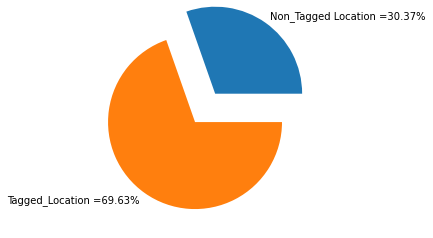

In [24]:
mylabels=['Non_Tagged Location ='+str(round(empty_location*100/(empty_location+non_empty_location),2))+'%','Tagged_Location ='+str(round(non_empty_location*100/(empty_location+non_empty_location),2))+'%']
plt.pie([round(empty_location*100/(empty_location+non_empty_location),2),round(non_empty_location*100/(empty_location+non_empty_location),2)],labels=mylabels,explode=[0.4,0])

### Comments:

##### This chart provides insight to the behaviour of the users. 

##### Most of the users in this dataset tend to use the features of location tagging to their posts. 

##### This can be attributed due to many reasons such as social habits,share the places that they visit(touristic,hidden places) and other possible explanations.


### RQ 2.5 How many posts include only photos? How many also have videos?


#### *Approach*:

>#####    To get the values for Number of likes for all the posts I use posts dataset to get the required values.  
>#####    I read the posts data in chunks of size=10000 and get the columns post_type
>#####    Now for every chunk,I evaluate three things number of posts which are :
>>#####   Only Photos(column value=1)
>>#####   Only Videos(column value=2)
>>#####   Both Photos and Videos(column value=3)

>#####    I make a pie chart for the first two values and ignore the third parameter as it is very very small.


In [16]:
for i,chunk in tq(enumerate(pd.read_csv('/home/ec2-user/SageMaker/Data/instagram_posts.csv',usecols=['post_type'],sep='\t',chunksize=1000000))):
    
    if i==0:  
        count_photos=count_photos+len(chunk[chunk['post_type']==1]) if i!=0 else len(chunk[chunk['post_type']==1]) ##Filter by post_type column values to identify rows with only photos
        count_videos=count_videos+len(chunk[chunk['post_type']==2]) if i!=0 else len(chunk[chunk['post_type']==2])
        count_photos_videos=count_videos+len(chunk[chunk['post_type']==3]) if i!=0 else len(chunk[chunk['post_type']==3])
        
print('The total number of posts with only photos is {}'.format(count_photos))
      
print('The total number of posts with only videos is {}'.format(count_videos))

print('The total number of posts with photos and videos is {}'.format(count_photos_videos))

43it [01:32,  2.15s/it]

The total number of posts with only photos is 940326
The total number of posts with only videos is 59671
The total number of posts with photos and videos is 3


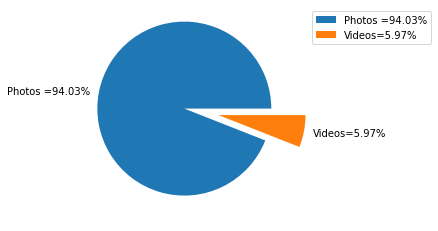

In [12]:
mylabels=['Photos ='+str(round(count_photos*100/(count_photos+count_videos),2))+'%','Videos='+str(round(count_videos*100/(count_photos+count_videos),2))+'%']
plt.pie([round(count_photos*100/(count_photos+count_videos),2),round(count_videos*100/(count_photos+count_videos),2)],labels=mylabels,explode=[0.4,0])
plt.legend(bbox_to_anchor=(1,0,0.5,1))
plt.show()



### RQ2.6 What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

#### *Approach*: 

>#####    For this part I take the profiles dataset and only read columns ['n_posts','followers','following','is_business_account']
>#####    I read the datasets in chunkws of size=10000 and use pre_processing_profiles which does the following thing:
>>#####   The rows of chunk with NaN values from 'is_business_account' replaces with False
>>#####   The rows of chunk with NaN values from 'followers' replaces with 0
>>#####   The rows of chunk with NaN values from 'following' replaces with 0
>>#####   The rows of chunk with NaN values from 'n_posts' replaces with 0

>#####    Now for every chunk,I identify users with buisness v/s Non buisness account using boolean logic and store them to count_true and count_false respectively.

>#####    In order to better understand the percentage of business v/s non_business account.I evaluate three more things:
>>#####   Number of followers, Number of users following and Number of posts for the business v/s non_business account
>>#####   Further a calculate average of followers, following and number of posts to get better understanding of the underlaying pictures.

>#####    I plot a pie plot for Business v/s Non-Business accounts. Further to better interpret these percentage, I plot a barplot average number of followers, users following and n_posts for business v/s non-business accounts.


In [3]:
for j,chunk in tq(enumerate(pd.read_csv('/home/ec2-user/SageMaker/Data/instagram_profiles.csv',sep='\t',usecols=['n_posts','followers','following','is_business_account'],chunksize=10000))):
    chunk=pre_processing_profiles(chunk)
    if j==0:
        count_true=len(chunk[chunk['is_business_account']==True].index)
        true_followers=chunk[chunk['is_business_account']==True]['followers'].sum()
        true_following=chunk[chunk['is_business_account']==True]['following'].sum()
        true_nposts=chunk[chunk['is_business_account']==True]['n_posts'].sum()

        
        count_false=len(chunk.index)-count_true
        false_followers=chunk[chunk['is_business_account']==False]['followers'].sum()
        false_following=chunk[chunk['is_business_account']==False]['following'].sum()
        false_nposts=chunk[chunk['is_business_account']==False]['n_posts'].sum()

    else:
        count_true+=len(chunk[chunk['is_business_account']==True].index)
        true_followers+=chunk[chunk['is_business_account']==True]['followers'].sum()
        true_following+=chunk[chunk['is_business_account']==True]['following'].sum()
        true_nposts+=chunk[chunk['is_business_account']==True]['n_posts'].sum()
        
        count_false+=len(chunk[chunk['is_business_account']==False].index)
        false_followers+=chunk[chunk['is_business_account']==False]['followers'].sum()
        false_following+=chunk[chunk['is_business_account']==False]['following'].sum()
        false_nposts+=chunk[chunk['is_business_account']==False]['n_posts'].sum()



451it [00:16, 26.90it/s]


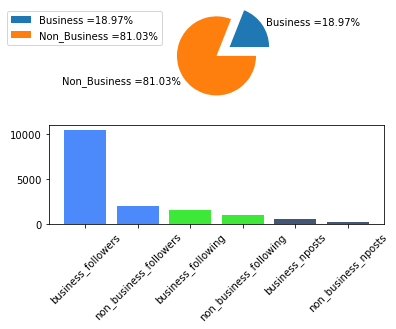

In [12]:

plt.subplot(2,1,1)
mylabels=['Business ='+str(round(count_true*100/(count_true+count_false),2))+'%','Non_Business ='+str(round(count_false*100/(count_true+count_false),2))+'%']
plt.pie([round(count_true/(count_true+count_false),2),round(count_false/(count_true+count_false),2)],labels=mylabels,explode=[0.4,0])
plt.legend(bbox_to_anchor=(-0.5,0,0.5,1))

plt.subplot(2,1,2)
colors=[]
for i in range(0,6,2):
        x=(random.random(), random.random(), random.random())
        colors.append(x)
        colors.append(x)
plt.bar([str('business_followers'),str('non_business_followers'),str('business_following'),str('non_business_following'),str('business_nposts'),str('non_business_nposts')],
        [true_followers/count_true,false_followers/count_false,true_following/count_true,false_following/count_false,true_nposts/count_true,false_nposts/count_false],color=colors)
plt.xticks(rotation=45)
plt.show()

##barh: horizontal bar plot

### Comments
#### On average though business account profiles account for 19% of the dataset they have a big reach in terms of people following their accounts when compared to non_business account which are 81% of the dataset.
#### Observation from bar plot
>#### Busness accounts have higher number of followers that Non-business accounts and hence their posts tend to have more affects on user's behaviours.

>#### Business accounts have higher number of accounts following that Non-business accounts and through this they might keep a track of user's buisness related posts. Further, accounts that are followed might also be buisness accounts through which they can keep track of products services created by other business.

>#### Busness accounts have higher number of posts that Non-business accounts and this might be attributed to have higher user engagement on their pages.


# RQ3 
## Now it's important to understand the most common times in which users publish their posts

### RQ3.1 What is the most common time in which users publish their posts?

#### *Approach*:-

##### - In order to find the most common time for all the posts made by the users in Posts dataset:
>##### - I read the *Instagram_Posts.csv* dataset in chunks to be more efficient in the analysis and just read the time stamp columns.
>##### - I drop the rows in read chunk which has NaN values for the CTS columns
>##### - I convert the cts column into datetime object and just get the hour of the time of post to have a better representation of the number of posts in an interval. 
>>##### -The precision of bining the values should be an hour to make a more generalised outcome. 
>>##### - If we go for precision in minutes or seconds the results would be more voliatile and hence have chosen a hour as measure of time intervals
>##### - Then I used numpy histogram function to calculate get the count of number of posts in every interval.
>##### - I add the histogram values for all the chunks to get the overall numbers for the complete dataset

In [2]:

for i,chunk in tq(enumerate(pd.read_csv('/home/ec2-user/SageMaker/Data/instagram_posts.csv',usecols=['cts'],sep='\t',chunksize=1000000))):
    chunk=chunk.dropna()
    df_time=pd.DatetimeIndex(chunk.cts).hour
    if i==0:
        n,bins=np.histogram(df_time,bins=np.arange(0,25))
        n=np.array(n)
    else:
        n1,bins=np.histogram(df_time,bins=np.arange(0,25))
        n1=np.array(n1)
        n=n+n1


43it [54:21, 75.84s/it]


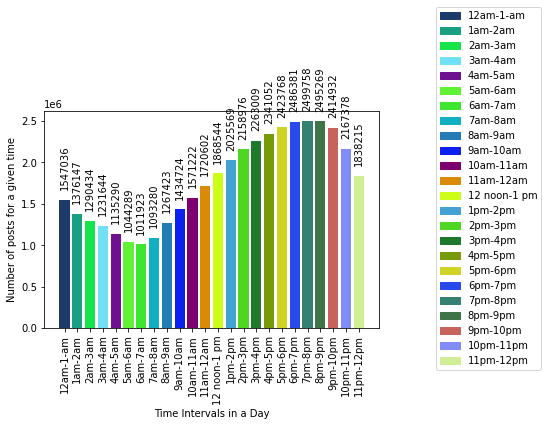

The most common time the users publish their posts is 7pm-8pm with 2499758 numbers of user posting


In [3]:


tic_label=['12am-1-am']
for i in range(0,11):
    tic_label.append(str(i+1)+'am'+'-'+str(i+2)+'am')
tic_label.append('12 noon-1 pm')
for i in range(0,11):
    tic_label.append(str(i+1)+'pm'+'-'+str(i+2)+'pm')
fig, ax = plt.subplots()
colors=[]
for i in range(24):
    colors.append( (random.random(), random.random(), random.random()))

p1=ax.bar(bins[1::],n,tick_label=tic_label,color=colors,label=tic_label)
handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i,label in enumerate(tic_label)]
plt.legend(handles,tic_label,bbox_to_anchor=(1,0.5,0.5,1))
ax.bar_label(p1,labels=np.round(n),label_type='edge',rotation=90,padding=10)
plt.xticks(rotation=90)
plt.xlabel('Time Intervals in a Day')
plt.ylabel('Number of posts for a given time')
plt.show()
print('The most common time the users publish their posts is {0} with {1} numbers of user posting'.format(tic_label[np.argmax(n)],np.amax(n)))

### RQ3.2 Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.

#### *Approach*:-
##### Step-1: In order to create a function that plots the number of intervals I divided the tasks into three sub functions.
>#####  Time_in_seconds: This function iterates over the different time stamps present and converts the time stamps to seconds .
>>##### I iterate over the different time stamp and convert them into datetime objects.
>>##### While converting to datetime objects I just read the time-stamp(only time). The datetime objects assign it's date as [1/1/1900].
>>##### I used this logic as different time-stamps has different dates spread all over the year and I just wanted to focus on time to estimate common time of posting.
>>##### Finally,I output a list of time-stamps in seconds.


In [21]:
def time_in_seconds(time_list:list):
    
    ''' Args: It takes a list of tuples of the different time intervals as input. Suppose the size of list is n and each tuple is made of two elements,total elements are n*2.
    
        Returns: A list of time converted into seconds for every time-stamp passed to the function.Total size is n*2.
        
        Objective: This function iterates over the different time stamps present and converts the time stamps to seconds . Finally appends to the final list. '''
    
    seconds=[]

    for i in time_list:
        for l,j in enumerate(i):
            date_time = datetime.datetime.strptime(j, "%H:%M:%S")
            a_timedelta = date_time - datetime.datetime(1900, 1, 1)
            if l==0:
                seconds.append(a_timedelta.total_seconds())
            else:
                seconds.append(a_timedelta.total_seconds()+1)
            seconds.sort()
    return seconds
        


##### Step-2: post_interval(time_list:list)
>##### It iterates over the posts datasets which is read in chunks and then give the total counts for all the posts in the different time intervals
>##### I perform operation on the chunks to extract the time-in-seconds from time-stamp(time-only) after converting them to date-time objects.
>##### I use numpy histogram function to calculate the number of posts in different time_intervals to get the count for that chunk
>##### I repeat the same for all the chunks.


In [22]:
def post_interval(time_list:list):
    
    ''' Args: It takes a list of tuples of the different time intervals as input. Suppose the size of list is n and each tuple is made of two elements,total elements are n*2.
    
        Returns: It returns two values:
                        1.counts of the posts in the given interval(n)
                        2. returns the bins used to caluculate the counts in the different time-intervals(bins_custom)
        
        Objective: This function uses time_in_seconds functions to calculate the different time intervals converted to seconds which is used further as the bins(histogram function).
        It iterates over the posts datasets which is read in chunks and then give the total counts for all the posts in the different time intervals'''
    
    bins_custom=time_in_seconds(time_list)
    for i,chunk in tq(enumerate(pd.read_csv('/home/ec2-user/SageMaker/Data/instagram_posts.csv',usecols=['cts'],sep='\t',chunksize=100000))):
        chunk=chunk.dropna()
        
        # try:
        df_time=pd.DatetimeIndex(chunk.cts).hour*3600+pd.DatetimeIndex(chunk.cts).minute*60+pd.DatetimeIndex(chunk.cts).second
        df_time=df_time.values
        # except:
        #     df.info()
        #     print(df[df.cts.isna()])
        if i==0:
            n,bins=np.histogram(df_time,bins=bins_custom)
            n=np.array(n)
        else:
            
            n1,bins=np.histogram(df_time,bins=bins_custom)
            n1=np.array(n1)
            n=n+n1
    return n,bins_custom

##### Step-3: plot_bar_interval(time_list:list,n:np.array):

>##### I used the obtained counts from the post_interval function and the time_list to plot a Horizontal bar plot

In [14]:
def plot_bar_interval(time_list:list,n:np.array):
    ''' Args: It takes a list of tuples of the different time intervals as input. Suppose the size of list is n and each tuple is made of two elements,total elements are n*2.
              It also takes an input as numpy array which represents the histogram counts for the required time-intervals passed as list of tuples.
    
        Returns: The Horizontal bar plot 
        
        Objective: This function plots the horizontal barplot for the obtained counts from the post_interval function for all the time intervals. Note it plots the 
        time-intervals in acscending orders '''
    
    
    
    Y=np.arange(0,len(time_list))
    x=[x for _, x in sorted(zip(Y, time_list), key=lambda pair: pair[1][1])]
    labels=[str(j[0])+'-'+str(j[1]) for j in x]
    fig, ax = plt.subplots()
    colors=[]
    for i in range(len(n[0::2])):
        colors.append( (random.random(), random.random(), random.random()))
    p1=ax.barh(width=n[0::2],y=labels,color=colors)
    plt.xticks(rotation=90)
    ax.bar_label(p1,labels=np.round(n[0::2]),label_type='edge',padding=10)
    plt.xlabel('Number of Posts in the requested time interval')
    plt.ylabel(' The provided time intervals')
    handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i,label in enumerate(labels)]
    plt.legend(handles,labels,bbox_to_anchor=(1,-0.5,0.5,1))

##### Step-4: post_interval_plot(time_list:list)

>##### This function uses all the three function time_in_seconds,post_interval,plot_bar_interval and gives an output a plot of counts of posts for passed intervals.

In [20]:
def post_interval_plot(time_list:list):
     ''' Args: It takes a list of tuples of the different time intervals as input. Suppose the size of list is n and each tuple is made of two elements,total elements are n*2.
              
    
        Returns: The Horizontal bar plot.Returns no variable.
        
        Objective: This function uses all the three function time_in_seconds,post_interval,plot_bar_interval. This outputs a horizontal bar plot with number of posts for all the 
        asked intervals'''
        
     bins_custom=time_in_seconds(time_list)
     n,bins_custom=post_interval(time_list)
     plot_bar_interval(time_list,n)

### RQ3.3 Use the function that you created in the previous literal to plot the number of posts between the following time intervals:
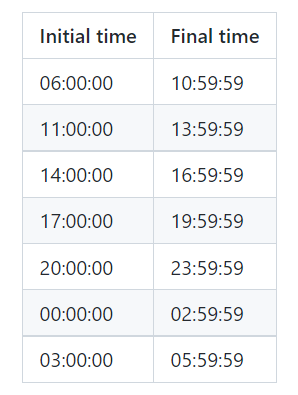

#### *Approach*:-
##### I use the previous implemented function to answer this part.It is pretty straightforward.


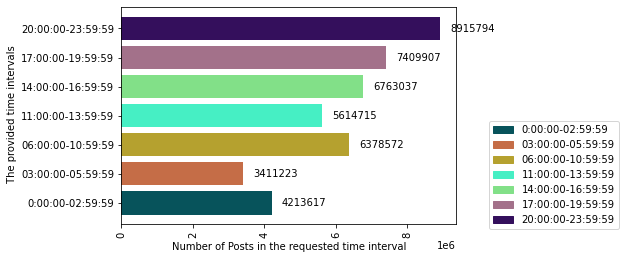

In [12]:
time_list=[('06:00:00','10:59:59'),('11:00:00','13:59:59'),('14:00:00','16:59:59'),('17:00:00','19:59:59'),('20:00:00','23:59:59'),('0:00:00','02:59:59'),('03:00:00','05:59:59')]
post_interval_plot(time_list)


# RQ4 
## In most cases, we will not have a consistent dataset, and the one we are dealing with is not an exception (ex. in the given datasets, you may not find the information of the profiles for some of the posts). So let’s enhance our analysis.

### - RQ 4.1
Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id :

In [172]:
def get_posts_by_profile_id(profile_id):
    
    
    ''' Arg: profile id, as an integer number, of the user whose posts we are looking for.
    
        Returns: posts that belong to the given Profile ID as a pandas DataFrame. '''
    
    posts_list = []
    
    for chunk in tqdm(pd.read_csv('~/instagram_posts.zip', delimiter='\t', chunksize=500000)):
        
        chunk.profile_id.fillna(0, inplace=True)                      # Replace Null Profile ID with 0
        chunk['profile_id'] = chunk['profile_id'].astype("int")       # Cast Profile ID column to a specified dtype (integer)
        
        result = chunk.loc[chunk['profile_id'] == profile_id]         #Access a rows and columns by label = profile_id
        if not result.empty:
            posts_list.append(result)                             ## if posts published from Profile ID are found, they stored in list
                   
    if len(posts_list) == 0:                                        ## Converting posts_list to pandas DataFrame
        output = None
        print("Error : no posts found for profile_id = ", profile_id )
    else:
        output = pd.concat(posts_list)
        print("profile_id =", profile_id, "\tdata.shape :", output.shape)
        output.head()
        
    return output             #return the posts that belong to the given Profile ID as a pandas DataFrame

In [173]:
data = get_posts_by_profile_id(1607309412)   #works (user with multiple posts published)
#data = get_posts_by_profile_id(1837592700)  #works (user with just one post published)
#data = get_posts_by_profile_id(1234)        #works too for non-existent profile_id

data.head()

86it [05:21,  3.74s/it]

profile_id = 1607309412 	data.shape : (74, 10)


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
233067,28607526,3851869,ByAFx7gnNhZ,1607309412,2.448736e+08,2019-05-28 11:36:28.000,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,1,0
241977,28616591,3851869,BxtZ7__Fosq,1607309412,3.621726e+14,2019-05-21 05:27:02.000,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,0,0
319192,28694641,3851869,ByB2YpbnoZs,1607309412,2.086910e+05,2019-05-29 04:00:25.000,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,4,0
637098,29019247,3851869,BwUPb5dFZCR,1607309412,9.268474e+14,2019-04-16 14:22:51.000,1,📞 สนใจตัวช่วย#dwfifteen🔥เพิ่มการเผาผลาญไขมัน\n...,1,0
1300143,29693418,3851869,ByJwLb5nTZ-,1607309412,2.509223e+08,2019-06-01 05:40:06.000,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,0,0


### - RQ 4.2
Write another function that, given an input n ( an integer ), will return the posts that belong to the n top posted profiles ( top n profiles that have posted the highest number of posts ) :

##### *Approach*:
Task divided into two sub functions:
- find top n posted profiles from instagram_profiles.csv with **get_nposts_sorted(n)** function
- find their posts from instagram_posts.csv with **posts_top_n_pubblischers(n)** function:  matching sid from profiles.csv with sid_profile in posts.csv



In [2]:
def get_nposts_sorted(n):
    
    ''' Arg : The function takes an integer number n as input.
    
        Return : A pandas DataFrame from the instagram_profiles.csv sorted for number of posts in decreasing order '''
    
    appended_data = []
    
    for chunk in tqdm(pd.read_csv('~/instagram_profiles.zip',sep='\t', chunksize=500000)):
        appended_data.append(chunk)

    df_nposts = pd.concat(appended_data)

    df_nposts.n_posts.fillna(0, inplace=True)                   # Replace n_posts with 0
    df_nposts.profile_id.fillna(0, inplace=True)                # Replace Null Profile ID with 0
    
    
    df_nposts['profile_id'] = df_nposts['profile_id'].astype("int")     # Cast Profile ID column to a specified dtype (integer)
    df_nposts['n_posts'] = df_nposts['n_posts'].astype("int")           # Cast n_posts column to a specified dtype (integer)
    df_nposts['sid'] = df_nposts['sid'].astype("int")                   # Cast sid column to a specified dtype (integer)
    
    
    result = df_nposts.nlargest(n,'n_posts')
    
    return result

In [3]:
def posts_top_n_pubblischers(n):
    
    ''' Arg: The function takes an integer number n as input ( n = top profiles that have posted the highest number of posts )
    
        Returns: the posts that belong to the top n publischers as a list of pandas DataFrame objects '''
    
    data_profiles = get_nposts_sorted(n)
    
    finale = []
    
    for chunk in tqdm(pd.read_csv('~/instagram_posts.zip', delimiter='\t', chunksize=500000)):
        chunk.sid_profile.fillna(0, inplace=True)                 # Replace Null Sid_Profile with 0
        chunk.profile_id.fillna(0, inplace=True)                  # Replace Null Profile ID with 0
        chunk['sid_profile'] = chunk['sid_profile'].astype(int)   # Cast Sid_Profile column to a specified dtype (integer)
        chunk['profile_id'] = chunk['profile_id'].astype(int)     # Cast Profile ID column to a specified dtype (integer)
        
        result = chunk.loc[chunk['sid_profile'].isin(list(data_profiles.sid))]    
        
        if not result.empty:
            finale.append(result)
            
    data = pd.concat(finale)
    output=[]
    
    for i in list(data_profiles.sid):
        result = data.loc[data['sid_profile'] == i]
        output.append(result)
    
    return output, data_profiles
                #return the posts that belong to the top n publischers as a list of pandas DataFrame objects (one for each user)
                #list in decreasing order from the top publisher 

In [ ]:
data, data2 = posts_top_n_pubblischers(int(input()))

**Comment :** <br>
It should be noted the inconsistency of the dataset.
<br>For profiles that have posted the highest number of posts according to instagram_profiles.csv, we can find just few records in instagram_posts.csv

In [197]:
#data, data2 = posts_top_n_pubblischers(int(input()))

c=1
for i in range(0,len(data)):
    try:
        print("{}  → {:<25} profile id: {:<20} tot_posts : {:<15} n_posts_found : {}".format(c,data2.profile_name.iloc[i], 
                                                                                                   data[i].profile_id.iloc[0],     
                                                                                                   data2.n_posts.iloc[i],
                                                                                                   data[i].shape[0]))
        c+=1
    except IndexError:
        print ("{} → {:<25} profile id: {:<20} tot_posts : {:<15} n_posts_found : {}".format(c,data2.profile_name.iloc[i],
                                                                                                   data2.profile_id.iloc[i],
                                                                                                   data2.n_posts.iloc[i],
                                                                                                   data[i].shape[0]))


1  → jasem33312                profile id: 199664772            tot_posts : 183730               n_posts_found : 21
2  → koenigpic                 profile id: 8563366588           tot_posts : 142428               n_posts_found : 15
3  → rudyanto62                profile id: 1273455368           tot_posts : 126340               n_posts_found : 25
4  → hometown_ni               profile id: 9813508              tot_posts : 125220               n_posts_found : 27
5  → dwfitfiber_thailand       profile id: 1607309412           tot_posts : 117262               n_posts_found : 74
6  → waxking911                profile id: 1087613619           tot_posts : 117099               n_posts_found : 38
7  → gamt_official             profile id: 1603889832           tot_posts : 113780               n_posts_found : 67
8  → collarosedw_official      profile id: 218172998            tot_posts : 113182               n_posts_found : 25
9  → gamt_authentic            profile id: 285549744            tot_post

In [200]:
for df in data:
    display(df.head(2))   ## to see data.head for each top publisher profile

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
9592952,21205477,3661552,Bq3hP3Khp8J,199664772,1.029593e+09,2018-12-02 03:03:33,1,NaN,0.0,0.0
9592953,21205482,3661552,Bq3hN53hUsD,199664772,1.029593e+09,2018-12-02 03:03:17,1,NaN,0.0,0.0


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
24956847,9253738,3288809,BxJpvMrpl0n,8563366588,219610759.0,2019-05-07 02:12:26,1,NaN,0.0,0.0
24978956,9253755,3288809,BxJpeX2pXeN,8563366588,219610759.0,2019-05-07 08:10:08,1,NaN,0.0,0.0


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
11228406,11234220,3970193,BpfufadAl1f,1273455368,378633680.0,2018-10-29 00:46:06,1,NaN,3.0,0.0
12360807,39883137,3970193,Bz6mD1VpaJB,1273455368,NaN,2019-07-15 01:25:52,1,NaN,2.0,0.0


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
2700732,31109333,3621669,BuUnJu0Al2B,9813508,344861278.0,2019-02-25 23:47:25,2,NaN,1.0,0.0
2701237,31109320,3621669,BuUoORyAH_f,9813508,344861278.0,2019-02-25 23:56:40,1,NaN,1.0,0.0


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
233067,28607526,3851869,ByAFx7gnNhZ,1607309412,2.448736e+08,2019-05-28 11:36:28,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,1.0,0.0
241977,28616591,3851869,BxtZ7__Fosq,1607309412,3.621726e+14,2019-05-21 05:27:02,1,อ้วนแค่ไหน ทานอะไรก็เอาไม่ลง \nมาเจอเซทล้มช้าง...,0.0,0.0


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
592982,28973172,345591,BsImXwXgQHo,1087613619,429994336.0,2019-01-02 14:46:48,1,NaN,0.0,0.0
593003,28973171,345591,BsIqY_RA9EP,1087613619,429994336.0,2019-01-02 15:21:55,1,NaN,1.0,0.0


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
494943,28873428,3944512,BxjqpeJhofB,1603889832,2.971150e+08,2019-05-17 10:40:38,1,"#gamt 1,290 free ems #gamtthailand #gamtsungla...",4.0,0.0
637087,29019245,3944512,BwUPb5mhGKA,1603889832,9.268474e+14,2019-04-16 14:22:51,1,📞 สนใจตัวช่วย#dwfifteen🔥เพิ่มการเผาผลาญไขมัน\n...,1.0,0.0


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
6309050,34925542,3851808,ByFkkDxBlTF,218172998,6.752505e+14,2019-05-30 14:41:39,1,หุ่นไซส์ S ที่ใครๆก็ปรารถนาอยากจะมี❗️❗️\nส่วนเ...,1.0,0.0
11427137,11776237,3851808,Bw3xOZVFTfl,218172998,2.362721e+08,2019-04-30 09:31:32,1,"☝🏻✨ปลุกความมั่นใจทุกเช้ากับ "" DW FITFIBER ""\nไ...",0.0,0.0


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
11565095,12683706,3868432,Bv9WuDjA_my,285549744,6.338327e+14,2019-04-07 17:03:58,1,#gamt 1290.- #รับตัวแทนจำหน่ายรายได้ดี #รับหิ...,5.0,0.0
11565096,14718062,3868432,BwyQXF_ASSO,285549744,3.514934e+08,2019-04-28 06:08:09,1,#gamt 1290.- #เช่าชุดราตรีรามอินทรา #ศูนย์การค...,0.0,0.0


,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments


### - RQ 4.3
What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in profile.csv ?

In [190]:
col_names = ['profile_id', 'tot_likes', 'tot_comments', 'likes_mean','comments_mean','posts_found']

df = pd.DataFrame( columns = col_names) ## create an empty pd.dataframe

data, data2 = posts_top_n_pubblischers(10)  ## call to the previous written function

for i in range(len(data)):
    try:
        L = [str(data[i].profile_id.iloc[0]), 
             int(sum(data[i].numbr_likes)),int(sum(data[i].number_comments)), 
             round(data[i].numbr_likes.mean(),2), round(data[i].number_comments.mean(),3), 
             int(data[i].shape[0])]
        
        df.loc[i] = L       ## insert list L as a row in df DataFrame
        
    except IndexError:
        print("No results for user ", i)
        

df = df.reindex(list(range(0, 10))).reset_index(drop=True)

df.insert(1, 'profile_name', list(data2.profile_name))
df.insert(7, 'all_posts', list(data2.n_posts))
df.loc[df.index[-1], 'profile_id'] = data2.iloc[-1].profile_id 


df


10it [00:21,  2.15s/it]
86it [05:20,  3.73s/it]

No results for user  9


,profile_id,profile_name,tot_likes,tot_comments,likes_mean,comments_mean,posts_found,all_posts
0,199664772,jasem33312,161,0,7.67,0.000,21,183730
1,8563366588,koenigpic,0,0,0.00,0.000,15,142428
2,1273455368,rudyanto62,74,1,2.96,0.040,25,126340
3,9813508,hometown_ni,8,0,0.30,0.000,27,125220
4,1607309412,dwfitfiber_thailand,114,0,1.54,0.000,74,117262
5,1087613619,waxking911,77,7,2.03,0.184,38,117099
6,1603889832,gamt_official,434,3,6.48,0.045,67,113780
7,218172998,collarosedw_official,10,1,0.40,0.040,25,113182
8,285549744,gamt_authentic,251,0,3.92,0.000,64,112777
9,8312603412,ivankkkka.trmp,NaN,NaN,NaN,NaN,NaN,112723


### - RQ 4.4
Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3.
Interpret the resulting chart.

In [194]:
### Taking care of time intervals:

times =[['06:00:00','10:59:59'],
        ['11:00:00','13:59:59'],
        ['14:00:00','16:59:59'],
        ['17:00:00','19:59:59'],
        ['20:00:00','23:59:59'],
        ['0:00:00','02:59:59'],
        ['03:00:00','05:59:59']]


time_list = [[datetime.datetime.strptime(i, '%H:%M:%S').time() for i in interval] for interval in times]
## Convert times in datetime.time objects

time_2 = [intervallo.append(0) or intervallo  for intervallo in time_list ]  
## Append 0 in order to store count of posts in each time intervals

#print(*time_2, sep="\n")

In [195]:
for dataframe in data:
    dataframe['cts'] = pd.to_datetime(dataframe['cts'])  ## convert cts column to a pandas datetime object.
    
    for i in dataframe['cts'].dt.time:                   ## check for each posts what's its time interval and add +1 to counter
        if  time_2[0][0] <=i and i <= time_2[0][1]:
            time_2[0][2]+= 1
        elif i >= time_2[1][0] and i <= time_2[1][1]:
            time_2[1][2]+= 1
        elif i >= time_2[2][0] and i <= time_2[2][1]:
            time_2[2][2]+= 1
        elif i >= time_2[3][0] and i <= time_2[3][1]:
            time_2[3][2]+= 1
        elif i >= time_2[4][0] and i <= time_2[4][1]:
            time_2[4][2]+= 1
        elif i >= time_2[5][0] and i <= time_2[5][1]:
            time_2[5][2]+= 1
        elif i >= time_2[6][0] and i <= time_2[6][1]:
            time_2[6][2]+= 1

print(*time_2, sep="\n")

[datetime.time(6, 0), datetime.time(10, 59, 59), 113]
[datetime.time(11, 0), datetime.time(13, 59, 59), 35]
[datetime.time(14, 0), datetime.time(16, 59, 59), 44]
[datetime.time(17, 0), datetime.time(19, 59, 59), 28]
[datetime.time(20, 0), datetime.time(23, 59, 59), 22]
[datetime.time(0, 0), datetime.time(2, 59, 59), 33]
[datetime.time(3, 0), datetime.time(5, 59, 59), 81]


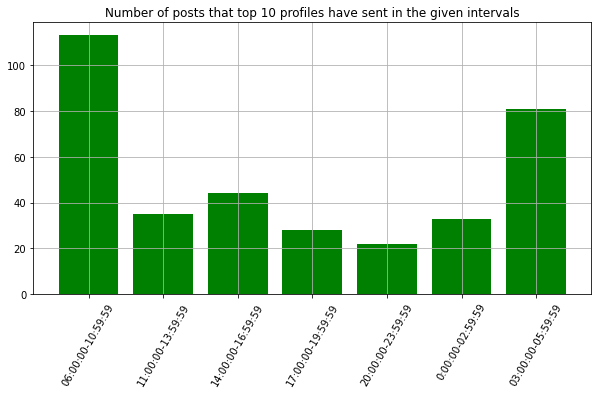

In [198]:
fig = plt.figure(figsize = (10, 5))
plt.bar(['-'.join(i) for i in times], [el[2] for el in time_2], color = "g" )
plt.xticks(rotation=60)
plt.title("Number of posts that top 10 profiles have sent in the given intervals")
plt.grid()
plt.show()

**Interpret the resulting chart :** 
<br>
Most of the posts (54.5 %) of the top 10 posted profiles have been shared early in the morning or late at night. <br>\
In detail:
- 113 out of 356 (31.74 %) between 6 am and 10.59 am.
-  81 out of 356 (22.75 %) between 3 am and 5.59 am.

# RQ5
## The most influential users are the ones with the highest number of “followers", you can now look more into their activity.

### The most influential users are the ones with the highest number of “followers", you can now look more into their activity.

### RQ5.1 Plot the top 10 most popular users in terms of followers and their number of posts.

We import the data about profiles as a DataFrame using Pandas: 

In [16]:
data_profiles = pd.read_csv('/home/ec2-user/SageMaker/instagram_profiles.zip', usecols = ['profile_id', 'firstname_lastname', 'followers', 'n_posts'], delimiter='\t')

To see if it worked correctly we print the first 5 indexis: 

In [17]:
data_profiles.head()

,profile_id,firstname_lastname,followers,n_posts
0,4.721050e+09,John Pierce,146.0,170.0
1,5.905830e+08,Deanna,1145.0,2878.0
2,1.074147e+09,Eliza Gray,324.0,431.0
3,1.472039e+09,Thomas Clark,NaN,NaN
4,3.531421e+09,NaN,NaN,NaN


We can control the number of NaN comparing to the total number of profiles: 

In [18]:
number_of_NaN = data_profiles['followers'].isna().sum()

print(number_of_NaN)

data_profiles.shape

1056815


(4509586, 4)

The numbers of NaN is 1056815 on a total of 4509586 profiles.

We sort the column corresponding to followers and print the first 10 values: 

In [19]:
most_populars_users = (data_profiles.sort_values(by=["followers"], ascending=False, ignore_index=True)).head(10)

print(most_populars_users)

     profile_id      firstname_lastname    followers  n_posts
0  2.502532e+07               Instagram  285457645.0   5760.0
1  3.416684e+06       Victoria's Secret   65269440.0   7355.0
2  2.082449e+07                     NBA   35339708.0  28816.0
3  1.876191e+08  Louis Vuitton Official   30689316.0   3352.0
4  2.125507e+09                   Tasty   30246783.0   2791.0
5  4.968651e+08          Andres Iniesta   29542143.0    990.0
6  2.341008e+07                     H&M   29176804.0   4566.0
7  2.423993e+07                Syahrini   29042823.0   4719.0
8  5.041706e+07           Dan Bilzerian   26476004.0   1311.0
9  9.070254e+08            Akshay Kumar   26252169.0   1173.0


We plot the profile name with the corresponding number of follower to compare them: 

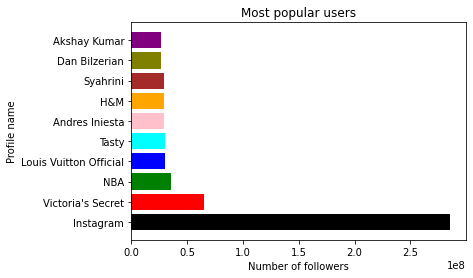

In [20]:
plt.barh(most_populars_users['firstname_lastname'], most_populars_users['followers'], color=['black', 'red', 'green', 'blue', 'cyan', 'pink', 'orange', 'brown', 'olive', 'purple'])

plt.title('Most popular users')

plt.ylabel('Profile name')

plt.xlabel('Number of followers')

plt.show()

Now we plot the 10 most following users in terms of their number of posts: 

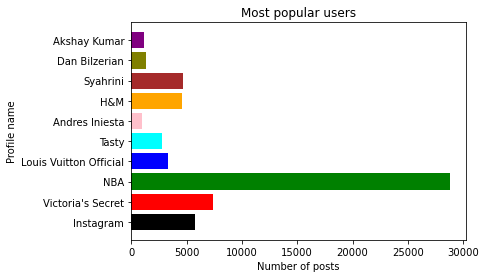

In [21]:
plt.barh(most_populars_users['firstname_lastname'], most_populars_users['n_posts'], color=['black', 'red', 'green', 'blue', 'cyan', 'pink', 'orange', 'brown', 'olive', 'purple'])

plt.title('Most popular users')

plt.ylabel('Profile name')

plt.xlabel('Number of posts')

plt.show()

### RQ5.2 Who is the most influential user?

The most influential users are the ones with the highest number of “followers" that is clearly Instagram with 285457645 followers. 

### RQ5.3 Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

First of all we extract Profile ID of the 10 most popular users in decrescent order and we create a list with their profile id:  

In [22]:
popular_users = data_profiles.sort_values(by=["followers"], ascending=False, ignore_index=True).head(10)

list_of_pid = [int(popular_users['profile_id'][i]) for i in popular_users.index]

We import the columns 'profile_id' and 'location_id' of the dataset of posts using pandas: 

In [23]:
data_posts = pd.read_csv('/home/ec2-user/SageMaker/instagram_posts.zip', delimiter='\t', usecols = ['profile_id','location_id'])

We drop NaN values of each columns that can not allow us to link 'profile_id' to 'location_id': 

In [24]:
data_posts1 = data_posts.dropna(subset = ['profile_id', 'location_id'])

We create a list of locations_id comparing the column of 'profile_id' to the profile id of the 10 most popular users: 

In [26]:
locations_id = []

for i in data_posts1.index: 
    
    if (data_posts1['profile_id'][i] in list_of_pid) == True:
        
        locations_id.append(int(data_posts1['location_id'][i]))       

To compare the list to the location_id in the dataset of location we need to tranform the element in integers.

We import the columns 'id' and 'city' from the data set of location as a dataframe using pandas:

In [28]:
data_locations = pd.read_csv('/home/ec2-user/SageMaker/instagram_locations.zip', usecols = ['id', 'city'], delimiter='\t')
print(data_locations.head())

                id                 city
0  110296492939207                  NaN
1        274391278          Nová Vieska
2  148885595789195     Kathmandu, Nepal
3        263258277        Paris, France
4  406147529857708  Burbank, California


We drop NaN values of each columns that can not allow us to link 'id' to 'name': 

In [29]:
data_locations1 = data_locations.dropna(subset = ['id', 'city'])

We create a list of the name of the locations that the 10 most popular users have visited:

In [31]:
locations_name = []

for i in data_locations1.index:
                  
    if (data_locations1['id'][i] in locations_id) == True:
                      
        locations_name.append(data_locations1['city'][i])
                      

We count the number of occurrencies through 'collection.counter()':

In [32]:
location_counter = collections.Counter(locations_name)

print(location_counter)

Counter({'New York, New York': 9, 'Singapore': 4, 'Los Angeles, California': 4, 'Houston, Texas': 3, 'London, United Kingdom': 3, 'Amsterdam, Netherlands': 3, 'Las Vegas, Nevada': 2, 'Shanghai, China': 2, 'Akron, Ohio': 1, 'Kowloon, Hong Kong': 1, 'Boulder City, Nevada': 1, 'Dallas, Texas': 1, 'Lontar, Jawa Timur, Indonesia': 1, 'Cusco, Peru': 1, 'Toronto, Ontario': 1, 'Adelaide, South Australia': 1, 'Stony Plain, Alberta': 1, 'Pune, Maharashtra': 1, 'Vaitape, French Polynesia': 1, 'Barcelona, Spain': 1, 'Sydney, Australia': 1, 'Bel Air, Los Angeles': 1, 'Tulum, Quintana Roo': 1, 'Kobe-shi, Hyogo, Japan': 1, 'Vail, Colorado': 1, 'Santa Monica, California': 1, 'Milwaukee, Wisconsin': 1, 'Eastwick, Pennsylvania': 1, 'Valencia': 1, 'Pierson, Michigan': 1, 'Novi Sad, Serbia': 1, 'Detroit, Michigan': 1, 'Jakarta, Indonesia': 1, 'Oakland, California': 1, 'Kosciuszko': 1, 'Hackney, Hackney, United Kingdom': 1, 'Bad Urach': 1, 'Hong Kong': 1, 'Pôrto São José, Parana, Brazil': 1, 'Memphis, Tenn

The most frequent visited area is New York with 9 occurrencies.

To plot them we decide to take the city that have been visited at least 2 times. So we create a new dictionary without the city that have been visited 1 time: 

In [33]:
new_dict = {x:location_counter[x] for x in location_counter if location_counter[x] != 1}

Now we can plot them: 

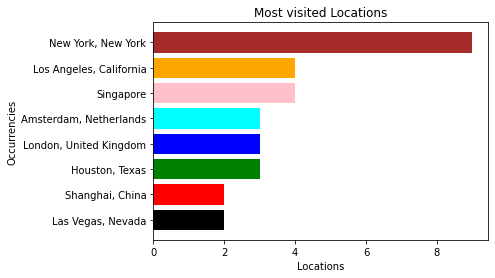

In [34]:
sort = dict(sorted(new_dict.items(), key=lambda item: item[1]))

lists = sort.items() 

x, y = zip(*lists)

plt.barh(x, y, color=['black', 'red', 'green', 'blue', 'cyan', 'pink', 'orange', 'brown', 'olive'])

plt.title('Most visited Locations')

plt.ylabel('Occurrencies')

plt.xlabel('Locations')

plt.show()

### RQ5.4 How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

We import columns 'profile_id' and 'post_type' of the dataset of post using pandas: 

In [36]:
data_posts = pd.read_csv('/home/ec2-user/SageMaker/instagram_posts.zip', delimiter='\t', usecols = ['profile_id', 'post_type'])

We drop NaN values that don't allow us to link profile id to post type:

In [37]:
data_posts2 = data_posts.dropna(subset = ['profile_id', 'post_type'])

We create a list with the post_type that the most 10 influential user have published: 

In [38]:
post_type = []

for i in data_posts2.index: 
    
    if (data_posts2['profile_id'][i] in list_of_pid) == True:
        
        post_type.append(data_posts2['post_type'][i])

We count the number of occurrencies through 'collection.counter()':

In [39]:
post_counter = collections.Counter(post_type)

In [40]:
print('The number of pictures: '+ str(post_counter[1]))
print('The number of reels: '+ str(post_counter[2]))
print('The number of multi-content: 0')
print(len(post_type))

The number of pictures: 128
The number of reels: 13
The number of multi-content: 0
141


In [41]:
print('The percentage of pictures: '+ str(round(post_counter[1]/len(post_type)*100, 2)) +'%')
print('The percentage of reels: '+ str(round(post_counter[2]/len(post_type)*100, 2)) +'%')
print('the percentage of multi-contents: 0 %')

The percentage of pictures: 90.78%
The percentage of reels: 9.22%
the percentage of multi-contents: 0 %


The majority of the posts published by the 10 most influential users are pictures. This could mean that this type of post is more successful on the public and for this reason they prefer to publish pictures instead of reels. From the analyses emerges that none of them published multi-contents post. This could mean that mixing contents doesn't receive much appreciament from the public or simply they prefer to mantain distance between picture and video contents. 

### RQ5.5 How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

We import columns 'profile_id', 'post_type', 'numbr_likes' and 'number_comments of the dataset of post using pandas: 

In [43]:
data_posts3 = pd.read_csv('/home/ec2-user/SageMaker/instagram_posts.zip', usecols = ['profile_id','post_type', 'numbr_likes', 'number_comments'], sep='\t')            
            

We drop NaN of profile id that cannot allow us to see to which profile the posts belongs to and of post_type cause that cannot allow us to see if it is a picture or a video (from the previous analyses we know that there aren't mixed content):

In [44]:
data_posts_3 = data_posts3.dropna(subset = ['profile_id', 'post_type'])

Now we create 4 lists with the number of like and comments for picture and reel:  

In [45]:
picture_like = []
picture_comment = []
reel_like = []
reel_comment = []

for i in data_posts_3.index: 
    
    if (data_posts_3['profile_id'][i] in list_of_pid) == True:
        
        if data_posts_3['post_type'][i] == 1:
        
            picture_like.append(data_posts_3['numbr_likes'][i])
            
            picture_comment.append(data_posts_3['number_comments'][i])
            
        elif data_posts_3['post_type'][i] == 2:
            
            reel_like.append(data_posts_3['numbr_likes'][i])
            
            reel_comment.append(data_posts_3['number_comments'][i])
            

We control if there are NaN values: 

In [46]:
pic_lik = np.array(picture_like)

pic_com = np.array(picture_comment)

rel_lik = np.array(reel_like)

rel_com = np.array(reel_comment)

print(np.isnan(picture_like))

print(np.isnan(picture_comment))

print(np.isnan(reel_like))

print(np.isnan(reel_comment))

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 

The total number of likes for each categories: 

In [47]:
print('The posts with only pictures received a total of ' + str(int(pic_lik.sum())) + ' likes and ' + str(int(pic_com.sum())) +' comments')

print('The posts with only reels received a total of ' + str(int(rel_lik.sum())) + ' likes and ' + str(int(rel_com.sum())) +' comments')

The posts with only pictures received a total of 69285634 likes and 497013 comments
The posts with only reels received a total of 3464814 likes and 26258 comments


The average numbers: 

In [48]:
average_piclike = int(pic_lik.mean())

average_piccomment = int(pic_com.mean())

average_reellike = int(rel_lik.mean())

average_reelcomment = int(rel_com.mean())

print('The average number of likes for picture is : ' + str(average_piclike))

print('The average number of comment for picture is : ' + str(average_piccomment))

print('The average number of likes for reel is : ' + str(average_reellike))

print('The average number of comment for reel is : ' + str(average_reelcomment))

The average number of likes for picture is : 541294
The average number of comment for picture is : 3882
The average number of likes for reel is : 266524
The average number of comment for reel is : 2019


To compare them to the number of follower we can extract the mean of the follower of the 10 most influential users: 

In [49]:
number_follower = []

for i in range(10): 
    
    number_follower.append(most_populars_users['followers'][i])
    
mean_of_follower = int((np.array(number_follower)).mean())

print('The mean of the follower of the first 10 most influential users is: ' + str(mean_of_follower))

The mean of the follower of the first 10 most influential users is: 58749283


Now we can compare number of likes/comments to number of follower through percentages to see how the public react to the type of post: 

In [50]:
print('The percentage of follower that like picture type posts : '+ str(round(average_piclike/mean_of_follower*100, 2)) +'%')

print('The percentage of follower that comment picture type posts : '+ str(round(average_piccomment/mean_of_follower*100, 2)) +'%')

print('The percentage of follower that like video type posts : '+ str(round(average_reellike/mean_of_follower*100, 2)) +'%')

print('The percentage of follower that comment video type posts : '+ str(round(average_reelcomment/mean_of_follower*100, 2)) +'%')

The percentage of follower that like picture type posts : 0.92%
The percentage of follower that comment picture type posts : 0.01%
The percentage of follower that like video type posts : 0.45%
The percentage of follower that comment video type posts : 0.0%


We can't say too much from this percentage maybe cause of the big difference between numbers of follower in the top 10 of the most influential users or maybe cause there are missing values in the field "number of likes" or "number of comments" for users that have more weight in terms of followers (and probably consequently in term of likes and number of comments). 

It's better to create this list for every users in the top ten. To make an example on how to do it we can define a function that have as input the indexes of the first most 10 influential users:

In [58]:
def find_like(index): 
    
    picture_like0 = []
    picture_comment0 = []
    reel_like0 = []
    reel_comment0 = []

    for i in data_posts_3.index: 
    
        if data_posts_3['profile_id'][i] == list_of_pid[index]:
        
            if data_posts_3['post_type'][i] == 1:
        
                picture_like0.append(data_posts_3['numbr_likes'][i])
            
                picture_comment0.append(data_posts_3['number_comments'][i])
            
            elif data_posts_3['post_type'][i] == 2:
            
                reel_like0.append(data_posts_3['numbr_likes'][i])
            
                reel_comment0.append(data_posts_3['number_comments'][i])
    
    print('The number of data of picture_like are ' + str(len(picture_like0)))
    print('The number of data of picture_comment are ' + str(len(picture_comment0)))
    print('The number of data of reel_like are ' + str(len(reel_like0)))
    print('The number of data of reel_comment are ' + str(len(reel_comment0)))
    
    number_of_follower = int(most_populars_users['followers'][index])
    
    average_piclike = int(mean(picture_like0))

    average_piccomment = int(mean(picture_comment0))

    average_reellike = int(mean(reel_like0))

    average_reelcomment = int(mean(reel_comment0))
    
    print('The average number of likes for picture is : ' + str(average_piclike))

    print('The average number of comment for picture is : ' + str(average_piccomment))

    print('The average number of likes for reel is : ' + str(average_reellike))

    print('The average number of comment for reel is : ' + str(average_reelcomment))
    
    print('The number of follower is : ' + str(number_of_follower))
    
    print('The percentage of follower that like picture type posts : '+ str(round(average_piclike/number_of_follower*100, 2)) +'%')

    print('The percentage of follower that comment picture type posts : '+ str(round(average_piccomment/number_of_follower*100, 2)) +'%')

    print('The percentage of follower that like video type posts : '+ str(round(average_reellike/number_of_follower*100, 2)) +'%')

    print('The percentage of follower that comment video type posts : '+ str(round(average_reelcomment/number_of_follower*100, 2)) +'%')

    

For NBA profile we obtain:

In [ ]:
find_like(2)

# RQ6

## It's time to get information from the user posting effectiveness.

## RQ6.1
In this part, we will find the average time a user lets pass before publishing another post. We derive the average for all users and after calculate the average over the whole dataset.
<br>In addition, we extract top three users who are the most actives between all with their following and followers number.

#### Importing Data but only the needed columns

In [ ]:
# Importing 100000 rows at a time
df = pd.DataFrame()
chunks = 100000
for chunk in tqdm(pd.read_csv('Data/instagram_posts.csv', delimiter='\t', usecols=['profile_id', 'cts', 'numbr_likes', 'number_comments'], chunksize=chunks)):
    df=pd.concat([df, chunk], axis=0)

428it [1:05:39,  9.20s/it]


#### Getting a copy a the dataset to leave it untouched for further uses

In [4]:
dfCopy = df.copy()

In [5]:
dfCopy.head()

,profile_id,cts,numbr_likes,number_comments
0,2.237948e+09,2017-08-06 20:06:57.000,80.0,0.0
1,5.579335e+09,2017-06-19 09:31:16.000,25.0,1.0
2,3.134296e+08,2017-03-11 20:05:03.000,9.0,0.0
3,1.837593e+09,2016-09-13 16:27:16.000,4.0,0.0
4,1.131527e+09,2015-10-18 10:19:27.000,8.0,0.0


#### A general information over the whole dataset including number of non-NULL values, value types, the size, and the shape of the dataset.

In [6]:
dfCopy.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42710197 entries, 0 to 42710196
Data columns (total 4 columns):
 #   Column           Non-Null Count     Dtype  
---  ------           --------------     -----  
 0   profile_id       40126905 non-null  float64
 1   cts              42706865 non-null  object 
 2   numbr_likes      42710161 non-null  float64
 3   number_comments  42710161 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ GB


It can be seen there are NULL values in every column

#### Number of NULL values over the entire dataset

In [7]:
dfCopy.isnull().sum().sum()

2586696

#### Dropping NULL values and check again to see the result of it

In [8]:
# Dropping NULL values
dfCopy.dropna(inplace=True)
dfCopy.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40126905 entries, 0 to 42710196
Data columns (total 4 columns):
 #   Column           Non-Null Count     Dtype  
---  ------           --------------     -----  
 0   profile_id       40126905 non-null  float64
 1   cts              40126905 non-null  object 
 2   numbr_likes      40126905 non-null  float64
 3   number_comments  40126905 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ GB


#### Counting the amount of dupplicated values and dropping the extras

In [9]:
# Check and see if there are duplicate rows
np.count_nonzero(dfCopy.duplicated())

920

In [10]:
# Dropping dupplicates
dfCopy.drop_duplicates(keep='first', inplace=True)

#### Now we find unique profile IDs and the number of posts each of them has published.

In [11]:
# Finding unique profiles and their frequency in the data set
profiles, freq = np.unique(dfCopy.profile_id, return_counts=True)

In [12]:
# Number of unique profiles
len(profiles)

11833765

#### Extracting profiles that have published at least two posts. This needs to be done to be able to consider time difference between each two consecutive posts.

In [13]:
profiles = profiles[np.where(freq>1)]
#freq = freq[np.where(freq>1)]
len(profiles)

4354672

#### Filtering the profiles that have at least two posts recorded for them:

In [14]:
dfCopy = dfCopy[dfCopy.profile_id.isin(profiles)]

#### The length of the data set after dropping NULLs, duplicates, and profiles with less than two posts:

In [15]:
len(dfCopy)

32646892

##### 32646892 posts is published by 4354672 users. <br><br>

#### Change the format of the timestamps column from string to datetime object to be able to work with it mathematically.

In [16]:
# Changing the time stamps format from string to time object
dfCopy['cts'] = pd.to_datetime(dfCopy['cts'], format='%Y-%m-%d %H:%M:%S.%f')

#### Sorting the timestamps in ascending order to not create a negative time difference.

In [17]:
# Sorting data set based on the times posted to maked them incremental
dfCopy = dfCopy.sort_values(by='cts')

#### Now we calculate, first, the differnece between each two consecutive posts for a user and then derive the average between them.

In [18]:
dfMeanTime = dfCopy.groupby(['profile_id']).apply(lambda x: x.cts.diff().sum()/(x.cts.count()-1))

#### An overlook of mean time of posting for each user:

In [19]:
dfMeanTime.head()

profile_id
3.0    71 days 12:40:48.923076923
4.0    89 days 03:12:52.916666667
11.0              6 days 07:28:52
19.0      61 days 22:49:06.800000
23.0            323 days 15:08:50
dtype: timedelta64[ns]

#### Calculating the average posting time over all users:

In [20]:
meanTime = dfMeanTime.mean()
print(f"The average time between posts is: \n{str(meanTime)}\n")

The average time between posts is: 
76 days 17:06:52.999416750



#### Finding the first three profiles posting more frequently:

In [21]:
dfMeanTime.sort_values(inplace=True)
dfMeanTime=dfMeanTime.to_frame()
dfMeanTime['profile_id'] = dfMeanTime.index
dfMeanTime.index = np.arange(0, len(dfMeanTime), 1)
dfMeanTime.rename(columns={0:'cts'}, inplace=True)
dfMeanTime = dfMeanTime[['profile_id', 'cts']]
dfMeanTime.head()

,profile_id,cts
0,1.750194e+09,0 days
1,3.291067e+09,0 days
2,1.902414e+08,0 days
3,9.197905e+09,0 days
4,2.617240e+08,0 days


#### Looking at the pure value of sorted mean times (without looking at their profile_id).

In [22]:
dfMeanTime.cts[:50]

0              0 days 00:00:00
1              0 days 00:00:00
2              0 days 00:00:00
3              0 days 00:00:00
4              0 days 00:00:00
5              0 days 00:00:00
6              0 days 00:00:00
7              0 days 00:00:00
8              0 days 00:00:00
9              0 days 00:00:00
10             0 days 00:00:00
11             0 days 00:00:00
12             0 days 00:00:00
13             0 days 00:00:00
14             0 days 00:00:00
15             0 days 00:00:00
16             0 days 00:00:00
17             0 days 00:00:00
18             0 days 00:00:00
19             0 days 00:00:00
20             0 days 00:00:00
21             0 days 00:00:00
22             0 days 00:00:00
23             0 days 00:00:00
24             0 days 00:00:00
25             0 days 00:00:00
26             0 days 00:00:00
27             0 days 00:00:00
28             0 days 00:00:00
29             0 days 00:00:00
30             0 days 00:00:00
31             0 days 00:00:00
32      

**Above** you can see there are 39 samples with 0s of average time difference between their posts. <br>
<br>
#### In order to be sure about the results of the **dfMeanTime** about the users with the average of 0s, we do a simple check on one of them:

In [23]:
dfCopy[dfCopy.profile_id==dfMeanTime.profile_id[0]]

,profile_id,cts,numbr_likes,number_comments
6768877,1.750194e+09,2019-04-13 21:22:32,140.0,3.0
6768879,1.750194e+09,2019-04-13 21:22:32,130.0,0.0
6768878,1.750194e+09,2019-04-13 21:22:32,232.0,15.0


#### Importing **instagram_profiles.csv** dataset.

In [24]:
# import profile data and compare it to the topThreeProfile
dfProfiles = pd.read_csv("Data/instagram_profiles.csv", delimiter='\t')

#### Since dfMeanTime is sorted, merging it with **instagram_profiles.csv** dataset, gives out the shared profiles sorted in ascending oreder in terms of average posting time

In [25]:
# Users with the average posting time of 0s:
topUsers = dfMeanTime.merge(dfProfiles[['profile_id', 'following', 'followers']])
topUsers.head()

,profile_id,cts,following,followers
0,9.197905e+09,0 days,30.0,37.0
1,1.823732e+09,0 days,1009.0,30.0
2,6.324740e+09,0 days,1377.0,288.0
3,1.036093e+10,0 days,5115.0,149.0
4,6.824888e+09,0 days,556.0,27.0


#### Bar plotting of #followers and #followings for top three most active users

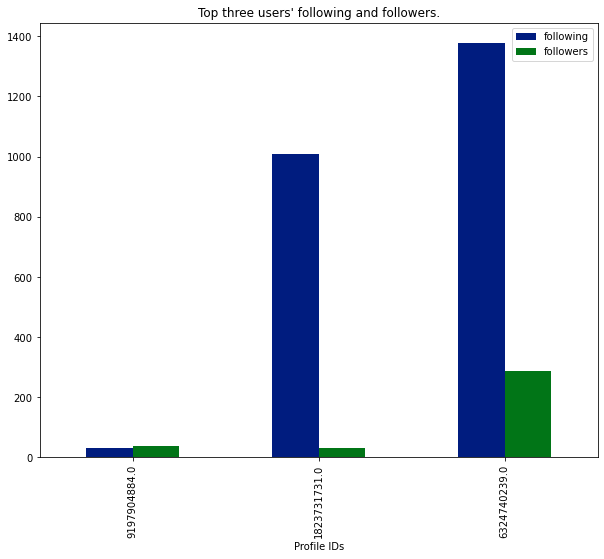

In [26]:
style.use('seaborn-dark-palette')
ax = topUsers.iloc[:3].plot(kind='bar', y=["following", "followers"], figsize=(10,8))
labels = topUsers.profile_id.iloc[:3]
ax.set_xticks([0,1,2], labels)
plt.title("Top three users' following and followers.")
plt.xlabel("Profile IDs")
plt.show()

## RQ6.2
In this part, we aggregate samples in defined time intervals and then examine to see in which time intervals highest number of likes and comments have been recorded.

#### Taking a copy a the dataset we imported previously

In [27]:
dfTimeIntervals = df.copy()

#### Changing the format of timestamps like before from string to datetime, but this time, we only need the hour value. We intend to define time intervals over a day, 24H, therefore only the hour is needed.

In [28]:
# Changing the time stamps format from string to time object
dfTimeIntervals['cts'] = pd.to_datetime(dfTimeIntervals['cts'], format='%Y-%m-%d %H:%M:%S.%f')
dfCopy = dfTimeIntervals.copy()

In [29]:
# Changing the time stamps into hour only
dfCopy['cts'] = dfCopy.cts.dt.hour

#### Aggregating data based on 2H time interval starting from 00:00:00 until 23:59:59 and then grouping by intervals.

In [30]:
aggregatedData = dfCopy.groupby(pd.cut(dfCopy['cts'],  np.arange(0, 26, 2)))['numbr_likes', 'number_comments'].mean()

/tmp/ipykernel_7412/1042340825.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  aggregatedData = dfCopy.groupby(pd.cut(dfCopy['cts'],  np.arange(0, 26, 2)))['numbr_likes', 'number_comments'].mean()


In [36]:
aggregatedData.head()

,numbr_likes,number_comments
cts,,
"(0, 2]",272.520189,7.726647
"(2, 4]",267.665914,7.135964
"(4, 6]",257.449635,6.703394
"(6, 8]",263.997820,7.393859
"(8, 10]",277.757407,7.493787


In [54]:
print(f"Highest average of likes: {aggregatedData.numbr_likes.max():{2}.{5}}")
print(f"Highest average of comments: {aggregatedData.number_comments.max():{2}.{3}}")

Highest average of likes: 301.6
Highest average of comments: 8.07


#### Taking out maximum likes and comments and associated indices which are the time ranges.

In [31]:
for i in aggregatedData.columns:
    likesMax = aggregatedData.numbr_likes.max()
    likesMaxID = aggregatedData.numbr_likes.idxmax()
    commentsMax = aggregatedData.number_comments.max()
    commentsMaxID = aggregatedData.number_comments.idxmax()

In [56]:
print(f"The maximum amount of average likes is {likesMax:{2}.{4}} and is recorded between {likesMaxID.left}:00:00 and {likesMaxID.right}:00:00")
print(f"The maximum amount of average comments is {commentsMax:{2}.{4}} and is recorded between {commentsMaxID.left}:00:00 and {commentsMaxID.right}:00:00")

The maximum amount of average likes is 301.6 and is recorded between 16:00:00 and 18:00:00
The maximum amount of average comments is 8.069 and is recorded between 18:00:00 and 20:00:00


#### Plotting the achieved results both for likes and comments.

In [35]:
labels = ["00:00:00-02:00:00","02:00:00-04:00:00","04:00:00-06:00:00","06:00:00-08:00:00","08:00:00-10:00:00","10:00:00-12:00:00",
         "12:00:00-14:00:00", "14:00:00-16:00:00","16:00:00-18:00:00","18:00:00-20:00:00","20:00:00-22:00:00","22:00:00-23:59:59"]

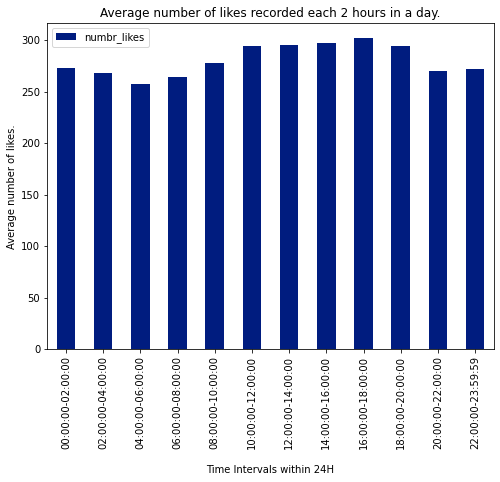

In [48]:
style.use('seaborn-dark-palette')
aggregatedData.plot(kind='bar', y='numbr_likes', figsize=(8,6))
plt.title("Average number of likes recorded each 2 hours in a day.")
plt.xlabel("\nTime Intervals within 24H")
plt.ylabel("Average number of likes.")
plt.xticks(ticks=np.arange(0,12,1),labels=labels)
plt.show()

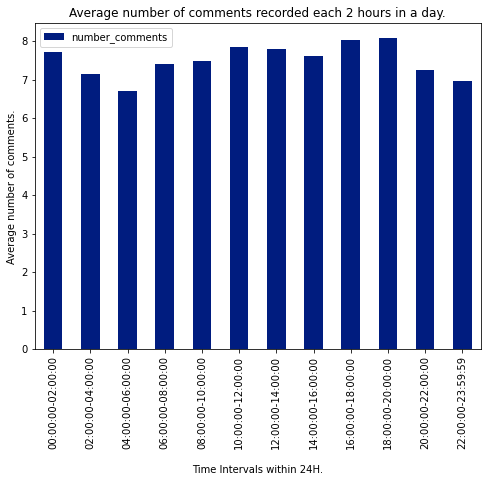

In [49]:
aggregatedData.plot(kind='bar', y='number_comments', figsize=(8,6))
plt.title("Average number of comments recorded each 2 hours in a day.")
plt.xlabel("\nTime Intervals within 24H.")
plt.ylabel("Average number of comments.")
plt.xticks(ticks=np.arange(0,12,1),labels=labels)
plt.show()

#### Based on the plots above, the most comments and likes are recorded on
##### For likes: 16:00:00-18:00:00 -> 301.6
##### For Comments: 18:00:00-20:00:00 -> 8.07

# RQ 7  
## Of course, calculating probabilities is a job that any Data Scientist must know. So let's compute some engaging figures.

### RQ7.1 What's the probability that a post receives more than 20% "likes" of the number of followers a user has?

### *Approach*:
#### For this part I would be working with two dataset *Instagram_Profiles.csv* to get followers information and *Instagram_Posts.csv* dataset to get user's likes information.
#### Step-1
>##### I read the complete dataset of the Instagram_Profiles dataset with columns [sid, followers] as the dataset size is small. 
>##### I drop rows with NaN values

In [2]:
#Drop NaN valued rows
df_profiles=pd.read_csv('/home/ec2-user/SageMaker/Data/instagram_profiles.csv',usecols=['sid','followers'],sep='\t')
df_profiles=df_profiles.dropna()

#### Step-2 
>##### I create a function that takes in as input number of likes and number of followers for a user and returns 1 or 0 to highlight those users which follow the constraint.


In [3]:

def compare_likes_followers(x,y):
'''Arguments':#This function takes as input value of number of like(x) and Number of followers(y) for a user

'Returns': '1 if the number of likes is greater than 20% of the user else 0 the other way round'''

    if x>(0.2)*y:
        return 1
    else:
        return 0

#### Step-3
> ##### I iterate over the Instagram_Posts dataset over small-size chunks and just read the 'sid_profile' and 'numbr_likes' columns.
> ##### I drop those rowns in chunks which has Nan Values.
> ##### I merge df_profile and chunk dataframes on columns ['sid_profiles'] and ['sid'] to get those users which are present in both the datasets.( Removing inconsistencies)
>> ##### Given on Kaggle Web page of the datasets that 'sid_profile' is made from the 'sid' of the profiles. Hence used this columns to get a match.
> ##### I apply the compare_like_followers function on the merged dataframe on columns['followers' and 'likes'] to get a dataframe which helps me the count of the users which follow the given constraint.
>##### Finally, in the next cell I output the recieved result for the question.

In [ ]:

for i,chunk in tq(enumerate(pd.read_csv('/home/ec2-user/SageMaker/Data/instagram_posts.csv',sep='\t',usecols=['sid_profile','numbr_likes'],chunksize=100000,keep_default_na=True,na_values=' '))):
        chunk=chunk.dropna(how='any')
        chunk=chunk.rename(columns={'sid_profile':'sid'})
        df_iter=pd.merge(chunk,df_profiles,on='sid')
        try:
            x=df_iter.apply( lambda row: compare_likes_followers(int(row['numbr_likes']),int(row['followers'])),axis=1)
        except:
            print('it still does not drop '' ')
        sum1=sum1+sum(x) if i!=0 else sum(x)
        size=size+len(x) if i!=0 else len(x) 
        
        
   
        
        

In [7]:
print('The probability that a post receives more than 20% "likes" of the number of followers a user has is '+str(round(sum1*100/size,2))+'%')    

The probability that a post receives more than 20% "likes" of the number of followers a user has is 15.24%


### RQ7.2 Do users usually return to locations? Extract the probability that a user returns to a site after having posted it in the past. Does that probability make sense to you? Explain why or why not.

##### Starting idea is to to get use Locations. csv and Posts.csv simultaneously. Since Locations dataset is small in size, I read the complete Location dataset in one-go. Whereas for the Posts dataset, I read the dataset in multiple chunks.

### *Approach*:
> ##### Step-1. While reading the dataset in chunk for Posts I extract the profile id and location_id columns whereas just the 'id' column for the location dataset.
> ##### Step-2. Now, for each chunk I try to match the Posts['location_id'] with Location['id'] so that I can query location information from the matched location['id'].
> ##### Step-3. Now each user would have a unique 'Profile Id' and through which I can see how many different locations the user has visited and see if the user went back to the sampe place again.
> ##### Step-4. Now the final array containing profile_id and location id is quite large and to improve the efficiency.I adopt a following procedure:
>> #####        1.I create a string variable using each 'profile_id'-'location_id' (combined) to define a new new variable.       
>> #####        2.Now,I pass this variable to a counter object to get the frequencies of the formed string.        
>> #####        3.Those string which have counts>1 means that the a particular user have revisited the place.        
>> #####        4.Hence I find the sum of all the strings which have more than count=1 and sum of all the counts to estimate the probability.
        
        
#### Assumption:
 
> ##### Every row in *Instagram_location.csv* is distinct.
        



In [2]:
#Drop NaN valued rows #Profiles(Step-1)

df_locations=pd.read_csv('/home/ec2-user/SageMaker/Data/instagram_locations.csv',usecols=['id'],sep='\t')
df_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022658 entries, 0 to 1022657
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   id      1022658 non-null  int64
dtypes: int64(1)
memory usage: 7.8 MB


In [4]:
#Step-1 and Step-2
for i,chunk in tq(enumerate(pd.read_csv('/home/ec2-user/SageMaker/Data/instagram_posts.csv',sep='\t',usecols=['profile_id','location_id'],chunksize=1000000,keep_default_na=True))):
           df_final=pd.merge(chunk,df_locations,left_on='location_id',right_on='id')
           df_final=df_final.drop(['id'],axis=1)
           x=np.concatenate([x,df_final.values],axis=0) if i!=0 else df_final.values

43it [06:59,  9.76s/it]


In [5]:
#Step-3 and Step-4
profile_id=x.copy()[:,0]
location_id=x.copy()[:,1]
z=[]
for i,j in tq(enumerate(profile_id)):
    z.append(str(j)+'-'+str(location_id[i]))

c=Counter(z)
count_freq=0
for i,j in tq(enumerate(c.values())):
    if j>1:
        count_freq += j
print('The probability that a user returns to a site after having posted it in the past is {}%'.format((count_freq/sum(c.values()))*100))    

28063765it [00:53, 525698.56it/s]
20074052it [00:05, 3566907.80it/s]

The probability that a user returns to a site after having posted it in the past is 38.759571283468205%


# RQ8
## Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check whether a hypothesis is correct or not

### RQ8.1 .Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.

##### Approach: Step-1
>#####    - To estimate the relationship between number of comments and number of likes for all the posts I use posts dataset.
>#####    - I read the posts data in chunks of size=1000000 and get the columns 'numbr_likes','number_comments'
>#####    - I drop the NaN values in the rows for the different chunks
>#####    - I concatenate the modified chunks and store them in numpy array(likes_comment)



In [2]:
for i,chunk in tq(enumerate(pd.read_csv('/home/ec2-user/SageMaker/Data/instagram_posts.csv',sep='\t',usecols=['numbr_likes','number_comments'],
                                       chunksize=1000000,keep_default_na=True,na_values=' ',engine='c'))):
    chunk=chunk.dropna()
    likes_comment=np.concatenate([likes_comment,chunk.values],axis=0) if i!=0 else chunk.values
   

43it [03:52,  5.41s/it]


##### Approach: Step-2
>#####    - I plot a scatter plot between likes v/s comments for all the posts to see the nature of the relationship between Likes and comments
>#####    - I also calculate the spearman's correlation between two variables (likes and comments)

In [4]:
coef_likes_comment=stats.spearmanr(likes_comment[:,0],likes_comment[:,1])
print(coef_likes_comment)

SpearmanrResult(correlation=0.6652385972821576, pvalue=0.0)


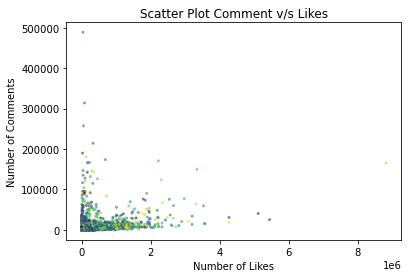

In [3]:
colors=np.random.rand(len(likes_comment))
plt.scatter(likes_comment[:,0],likes_comment[:,1],s=[4]*len(likes_comment),alpha=0.5,c=colors)
plt.xlabel('Number of Likes')
plt.ylabel('Number of Comments')
plt.title('Scatter Plot Comment v/s Likes')
plt.show()


### Comments:

>#### Through Spearman's calculation it's quite evident that they are correlated(p=0,null hypothesis get's rejected) with correlation =0.66

>#### So yeah more likes means more comments.



### RQ8.2 Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice.

##### Approach: Step-1
>#####    - To estimate the relationship between time of posting and number of likes(or comments) for all the posts I use posts dataset.
>#####    - I read the posts data in chunks of size=1000000 and get the columns 'cts','numbr_likes','number_comments'
>#####    - I drop the NaN values in the rows for the different chunks
>#####    - I concatenate the modified chunks and store them in numpy array(x)




In [3]:

for i,chunk in tq(enumerate(pd.read_csv('/home/ec2-user/SageMaker/Data/instagram_posts.csv',sep='\t',usecols=['cts','numbr_likes','number_comments'],
                                       chunksize=1000000,keep_default_na=True,na_values=' ',engine='c'))):
    chunk=pre_posts(chunk)
    chunk=chunk.dropna()
    x=np.concatenate([x,chunk.values],axis=0) if i!=0 else chunk.values


43it [07:20, 10.25s/it]


##### Approach: Step-2
>#####    - In this I store the respective values in of time,likes and comment in the different variable.

In [8]:

time=x[:,0].copy()
likes=x[:,1].copy()
comment=x[:,2].copy()

##### Approach: Step-3
>#####    - In this step since I want to find statistical relation between time v/s likes(or comments) I read the datetime objects of the time stamp and get the hour of the post.
>#####    -  I define a function time_hour which converts all the stored datetime objects to hours(int64)

In [5]:

def time_hour(time):
    y=[]
    for i in tq(time):
        try:
            y.append(i.hour)
        except:
            i=pd.DatetimeIndex([i])
            y.append(i.hour[0])
    return y

##### Approach: Step-4
>#####    - In this step since I want to find statistical relation between time v/s likes(or comments) I read the datetime objects of the time stamp and get the minutes with respect to 24 hours(24 * 60 minutes) in a day
>#####    -  I define a function time_minute which converts all the stored datetime objects to minutes(int64).
>#####    - So the objective is to compare the realation between time v/s likes(or comments) on two scale

In [6]:
def time_minute(time):
    y=[]
    for i in tq(time):
        try:
            y.append(i.hour*60+i.minute)
        except:
            i=pd.DatetimeIndex([i])
            y.append(i.hour[0]*60+i.minute[0])
    return y

##### Approach: Step-5
>#####    -Since now all the two variable are numerical,I use Spearman correlation to get correlation and p-value for time in hour v/s Likes

In [11]:
y_hour=time_hour(time)
coef=stats.spearmanr(y_hour,likes)
print(coef)

100%|██████████| 42706865/42706865 [01:54<00:00, 374115.83it/s] 


SpearmanrResult(correlation=0.015954613088348283, pvalue=0.0)


#### Comments:
>#### We can get p-value=0.This means that the null hopythesis is incorrect and the two variable are correlated to each other.
>#### The correlation is 0.015 which is small. 

##### Approach: Step-6
>#####    -Since now all the two variable are numerical,I can use Spearman correlation to get correlation and p-value for time in hour v/s Comments

In [12]:
y_hour=time_hour(time)
coef=stats.spearmanr(y_hour,comment)
print(coef)

100%|██████████| 42706865/42706865 [01:51<00:00, 382227.02it/s] 


SpearmanrResult(correlation=0.008855948260031634, pvalue=0.0)


#### Comments:
>#### We can get p-value=0.This means that the null hopythesis is incorrect and the two variable are correlated to each other.
>#### The correlation is 0.008 which is small. 

##### Approach: Step-7
>#####    -Since now all the two variable are numerical,I can use Spearman correlation to get correlation and p-value for time in minute v/s Likes

In [9]:
y_minute=time_minute(time)
coef_likes_minute=stats.spearmanr(y_minute,likes)
print(coef_likes_minute)

100%|██████████| 42706865/42706865 [02:44<00:00, 259099.86it/s] 


SpearmanrResult(correlation=0.01563381106999236, pvalue=0.0)


#### Comments:
>#### We can get p-value=0.This means that the null hopythesis is incorrect and the two variable are correlated to each other.
>#### The correlation is 0.015 which is small(which is kind of same with time in hours)

##### Approach: Step-8
>#####    -Since now all the two variable are numerical,I can use Spearman correlation to get correlation and p-value for time in minute v/s Number of Comments

In [10]:
y_minute=time_minute(time)
coef_comment_minute=stats.spearmanr(y_minute,comment)
print(coef_comment_minute)

100%|██████████| 42706865/42706865 [02:44<00:00, 259887.04it/s] 


SpearmanrResult(correlation=0.008660595562157732, pvalue=0.0)


#### Comments:
>#### We can get p-value=0.This means that the null hopythesis is incorrect and the two variable are correlated to each other.
>#### The correlation is 0.008 which is small(kind of same as time in hours)

##### Approach: Step-9
>#####    -As we see before, we find that the time v/s likes(or comments) are correlated(but with small value of correlation). I aim to find more stronger correlation.
>#####    -Hence instead of directly finding correlation for all the posts likes/ comments I refine my likes variable by calculating count of likes in a given intervals of the hours in day.
>#####    - My time intervals are each hours of the day(12am-1am,1am-2am......) and I normalised the count of the interval using the total count of likes.
>#####    - I plot a line plot Time v/s Normalised Likes to get a better representation of the relationship.

100%|██████████| 42706865/42706865 [01:50<00:00, 385258.33it/s] 
24it [01:09,  2.90s/it]


SpearmanrResult(correlation=0.7817391304347826, pvalue=6.454527225791052e-06)


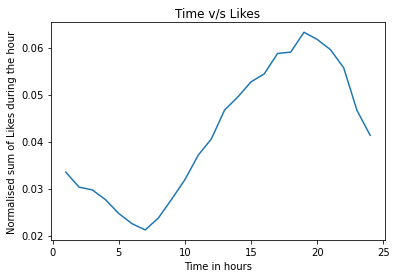

In [12]:
hist_hour=np.arange(0,24)
y_hour=time_hour(time)
for i,j in tq(enumerate(hist_hour)):
    hist_hour[i]=sum(likes[np.array(y_hour)==i])
coef=stats.spearmanr(np.arange(1,25),hist_hour/sum(hist_hour))
plt.plot(np.arange(1,25),hist_hour/sum(hist_hour))
plt.xlabel('Time in hours')
plt.ylabel('Normalised sum of Likes during the hour')
plt.title('Time v/s Likes')
print(coef)

#### Comments:
>#### We can get p-value=6.45e-6.This means that the null hopythesis is incorrect and the two variable are correlated to each other.
>#### In this way we get a very high correlation of 0.78 as compared to previous counterparts.(Stronger relationship)

##### Approach: Step-10
>#####    -As we see before, we find that the time v/s comments are correlated(but with small value of correlation). I aim to find more stronger correlation.
>#####    -Hence instead of directly finding correlation for all the posts comments I refine my comments variable by calculating count of comments in a given intervals of the hours in day.
>#####    - My time intervals are each hour of the day(12am-1am,1am-2am......) and I normalised the count of the interval using the total count of comments

24it [01:09,  2.88s/it]

SpearmanrResult(correlation=0.7852173913043478, pvalue=5.504827399386528e-06)


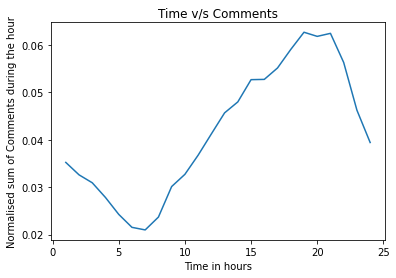

In [13]:
hist_hour=np.arange(0,24)
for i,j in tq(enumerate(hist_hour)):
    hist_hour[i]=sum(comment[np.array(y_hour)==i])
coef=stats.spearmanr(np.arange(1,25),hist_hour/sum(hist_hour))
plt.plot(np.arange(1,25),hist_hour/sum(hist_hour))
plt.xlabel('Time in hours')
plt.ylabel('Normalised sum of Comments during the hour')
plt.title('Time v/s Comments')
print(coef)

#### Comments:
>#### We can get p-value=6.45e-6.This means that the null hopythesis is incorrect and the two variable are correlated to each other.
>#### In this way we get a very high correlation of 0.78 as compared to previous counterparts.(Stronger relationship) which is close to the relationship v/s 


### RQ-8.3 What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.

##### Approach: Step-1
>#####    - To get the values for Number of followers of all the user I use profiles dataset to get the required values.  
>#####    - I read the profiles data in chunks of size=1000000 and get the columns 'followers'
>#####    - I drop the NaN values in the rows for the different chunks
>#####    - I concatenate the modified chunks and store them in df_followers dataframe.


>#####    -Note:Maybe it's not the best read the data in chunks here.



In [4]:
for i,chunk in tq(enumerate(pd.read_csv('/home/ec2-user/SageMaker/Data/instagram_profiles.csv',sep='\t',usecols=['followers'],
                                       chunksize=1000000,keep_default_na=True,na_values=' ',engine='c'))):
    chunk=chunk.dropna()
    df_followers=pd.concat([df_followers,chunk],axis=0) if i!=0 else chunk

5it [02:49, 33.99s/it]


##### Approach: Step-2
>#####    - From the obtained df_followers, I sort the dataframe in ascending order using followers column
>#####    - Now I only take those users which have more than one 0 followers
>#####    - To calculate the mean,25% quantile,50% quantile,75% quantile,of the followers I used dataframe.describe() method
>#####    - To calculate the mode of the followers I used dataframe.mode() method
>#####    - I plot a histogram of number of followers with num_nbins=100



The Mean of the distribution is 4770.453940295966
The Mode of the distribution is 1
The 25% quantile of the distribution is 163.0
The 50% quantile of the distribution is 410.0
The 75% quantile of the distribution is 980.0


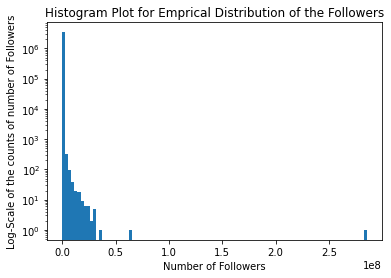

In [7]:
df_followers.sort_values(by='followers',ascending=True)
df_followers=df_followers[df_followers['followers']>0]
plt.hist(df_followers['followers'].values,bins=100,log=True)
plt.xlabel('Number of Followers')
plt.ylabel('Log-Scale of the counts of number of Followers')
plt.title('Histogram Plot for Emprical Distribution of the Followers')
print('The Mean of the distribution is {}'.format(df_followers.describe().iloc[1].values[0]))
print('The Mode of the distribution is {}'.format(df_followers['followers'].mode().values[0]))
print('The 25% quantile of the distribution is {}'.format(df_followers.describe().iloc[4].values[0]))
print('The 50% quantile of the distribution is {}'.format(df_followers.describe().iloc[5].values[0]))
print('The 75% quantile of the distribution is {}'.format(df_followers.describe().iloc[6].values[0]))
      

#### Comments:
##### It can be seen from the above figure that there are some users which have very high followers and to have a better understading of the distribution I take a decision to remove values which are greater than 10^7.

##### Approach: Step-3
>#####    - I remove the folowers with number of followers greater than 10^7
>#####    - Now I only take those users which have more than one 0 followers and less than 10^7 followers
>#####    - To calculate the mean,25% quantile,50% quantile,75% quantile,of the followers I used dataframe.describe() method
>#####    - To calculate the mode of the followers I used dataframe.mode() method
>#####    - I plot a histogram of number of followers with num_nbins=100

The Mean of the distribution is 4268.679459285507
The Mode of the distribution is 1
The 25% quantile of the distribution is 163.0
The 50% quantile of the distribution is 410.0
The 75% quantile of the distribution is 980.0


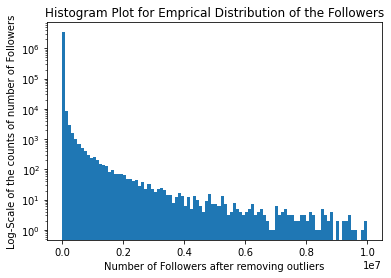

In [20]:
df_followers.sort_values(by='followers',ascending=True)

df_followers1=df_followers[df_followers['followers']>0]

df_followers1=df_followers1[df_followers1['followers']<10000000]
plt.hist(df_followers1['followers'].values,bins=100,log=True)
plt.xlabel('Number of Followers after removing outliers')
plt.ylabel('Log-Scale of the counts of number of Followers')
plt.title('Histogram Plot for Emprical Distribution of the Followers')
print('The Mean of the distribution is {}'.format(df_followers1.describe().iloc[1].values[0]))
print('The Mode of the distribution is {}'.format(df_followers1['followers'].mode().values[0]))
print('The 25% quantile of the distribution is {}'.format(df_followers1.describe().iloc[4].values[0]))
print('The 50% quantile of the distribution is {}'.format(df_followers1.describe().iloc[5].values[0]))
print('The 75% quantile of the distribution is {}'.format(df_followers1.describe().iloc[6].values[0]))
 

##### Approach: Step-4
>#####    - In this I take a Logarithm of the Number of followers and use only those profiles which have number of followers greater than 1 to avoid negative logarithm values.
>#####    - I plot a Normalised histogram 
>#####    - I see that the Logarithm of the Number of followers follows a gaussian distribution.

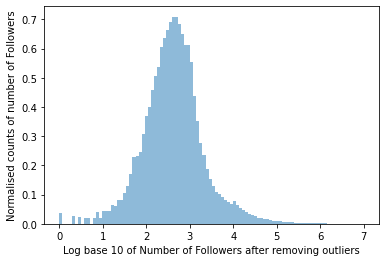

In [62]:
X=df_followers1[df_followers1['followers']>1]
plt.hist(np.log10(X),bins=100,density=True,alpha=0.5)
plt.xlabel('Log base 10 of Number of Followers after removing outliers')
plt.ylabel('Normalised counts of number of Followers')
plt.show()

##### Approach: Step-5
>#####    - I try to estimate the parameters of the gaussian distribution by computing the mean and variance of Log10( Number of followers)
>#####    - I estimate Probabiltiy distribution function using the obtained mean and variance parameters and generate pdf_y
>#####    - I plot a normalised histogram and the estimated gaussian distribution. It seems somewhat good fit.

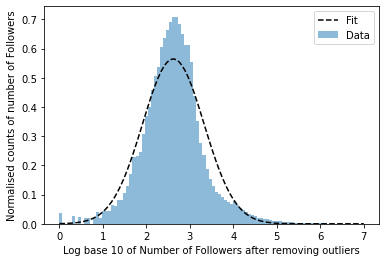

In [61]:
data=np.log10(X)
avg = np.mean(data)
var = np.var(data)

pdf_x = np.linspace(np.min(data),np.max(data),100)
pdf_y = 1.0/np.sqrt(2*np.pi*var)*np.exp(-0.5*(pdf_x-avg)**2/var)


# Then we plot :
plt.figure()

plt.hist(data,100,alpha = 0.5,density=True)
plt.plot(pdf_x,pdf_y,'k--')
plt.xlabel('Log base 10 of Number of Followers after removing outliers')
plt.ylabel('Normalised counts of number of Followers')
plt.legend(("Fit","Data"))
plt.show()

### RQ8.4 What are histograms, bar plots, scatterplots and pie charts used for?


### Histograms

>#### Through histogram charts I kind of gain insights to to the distribution of the the univariate data in consideration. 
>#### It breaks down the *numerical data* in *interval groups* and provide the frequency of the data falling in each interval.
>#### This helps in detecting skewness of the data ( the pattern of distribution of the data).

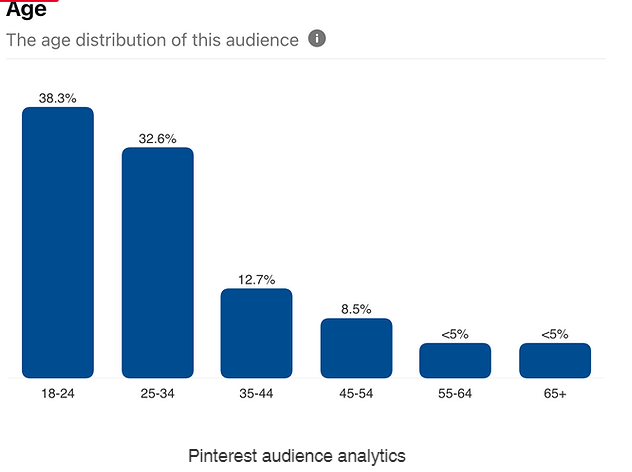

>#### The above histogram show us the distribution of the age of the users of the pinterest users and we can clearly see that it's heavily dominated by users of age bellow 34.

### Bar Chart

>#### Through Bar charts I kind of gain insights to the influence of the different categorical values falling inside the data. 
>#### Through the height of the bar I get insights to the importance of the categories


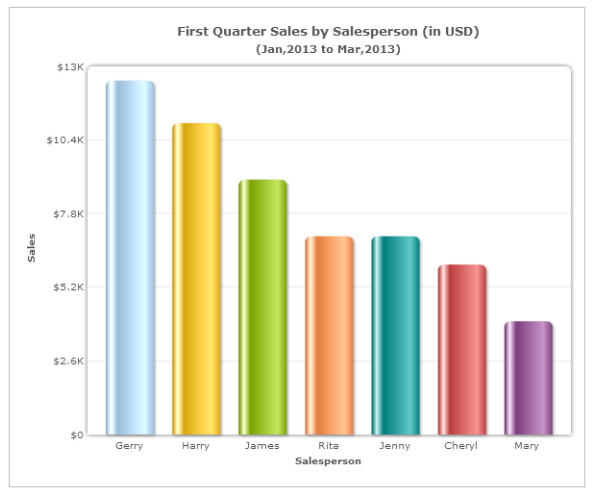

>#### Through the above bar plot I can see which salesperson had the best/worst sales for the three months(Jan-March,2013).


### Scatter Plot

>#### Through scatter plot I kind of gain insights to the type of relationship between two numerical variables.
>#### The realtionship is measured with the usage of different correlation measures.
>#### The provides me qualitative measure of the change in one variable with respect to the change in ohter variable.

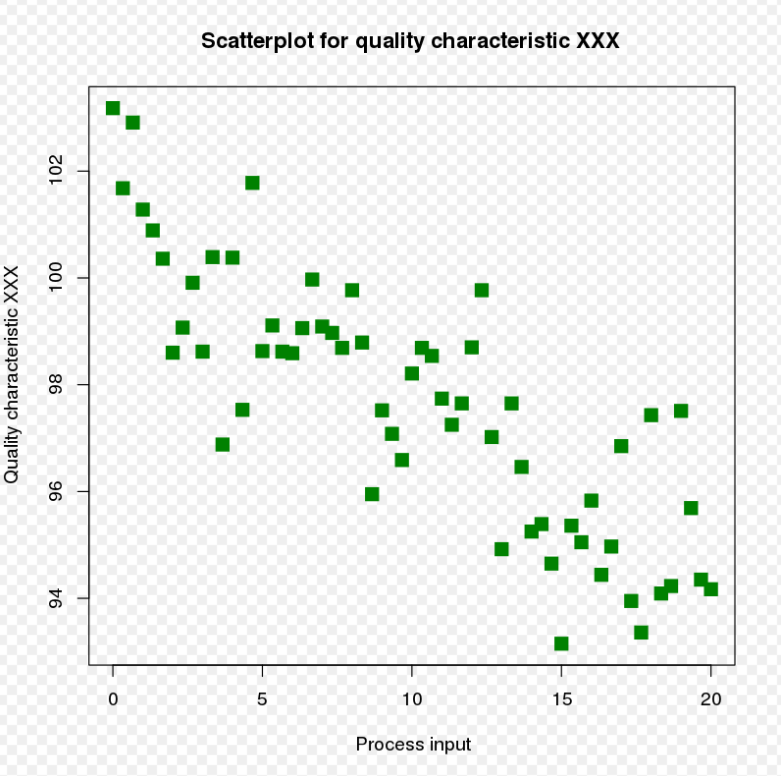

>#### The above plot gives me the idea of the production quality with respect to the Process input. With increase of Process input the Quality Characteristic decreases.


### Pie Chart

>#### Through pie plot I kind of gain insights to the percentage(weigths) of the different categorical values of a categorical attribute.
>#### It shows the composition of the a categorical attribute and give numerical values of it's proportion.

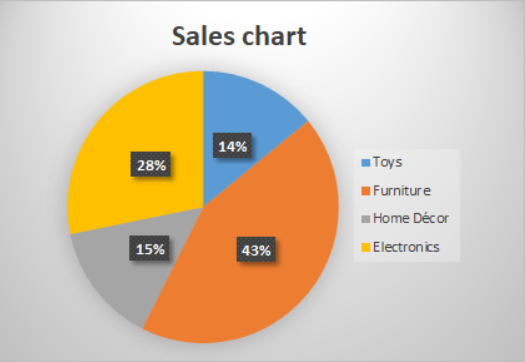

>#### The above pie chart shows the proportion of sales of different kinds of product and inform us that Electronics have the highest share of purchase among all the categories

### [RQ8.5] What insights can you extract from a Box Plot?

>#### Through scatter plot I kind of gain insights to the distribution of the numerical data which is usually represented through the percentiles.
>#### It gives a highly qualitative visualisation of the variability within the data.
>#### Another important point of note is it's ability to identify the outliers( they don't follow the common distribution) within the data and might help us in identifying mistakes in data generating process or unusual behaviour.
>#### Not only does it provides qualitative idea of variation within one group, if other groups of data are plotted it gives us qualitative idea of variation comparison different groups.

# Bonus A
<p>  Sort the users in terms of number of followers and divide them into two groups: for the first group, take only the top 10% regarding "followers", and for the second one, take the rest. <br>
 Now compare the mean of time intervals between posts for the two categories. <br> Do you notice something relevant?</p>

#### *Approach*:

##### Task divided in three parts:
 - Order users descending by number of followers from instagram_profiles.csv and split them into two groups
 - Create a post_finder funtion to get all posts cts (Timestamp when the post was created) for each group
 - Calculate the mean of timedeltas for each group

In [2]:
## Sort the users in terms of number of followers and divide them into two groups (named a and b):

appended_data = []
for chunk in tqdm(pd.read_csv('~/instagram_profiles.zip', delimiter='\t', usecols=['sid','followers'], chunksize=500000)):  
    
    chunk = chunk.dropna()        ## Remove missing values
    appended_data.append(chunk)

df_followers = pd.concat(appended_data)

df_followers['followers'] = df_followers['followers'].astype("int")    # Cast Followers column to a specified dtype (integer)
df_followers['sid'] = df_followers['sid'].astype("int")                # Cast Sid column to a specified dtype (integer)

result = df_followers.sort_values(by=['followers'], ascending=False)

a, b = np.split(result, [int(.1*len(result))])   # splitting df sorted by followers in 10 % and rest

ten_list = a['sid'].tolist()    ## sid needed as a list for post_finder function input
rest_list = b['sid'].tolist()   ## sid needed as a list for post_finder function input

print(a.shape, b.shape)

10it [00:12,  1.20s/it]


(345277, 2) (3107494, 2)


In [3]:
# function to get posts's datetime information from instagram_posts.zip

def post_finder(lis):
    
    ''' Arg: list of sid from profiles.csv used to match with sid_profile in posts.csv in order to retrieve their posts .
    
        Returns: posts that belong to the users in input list as a pandas DataFrame. '''
    
    big_lista = []
    for chunk in tqdm(pd.read_csv('~/instagram_posts.zip', delimiter='\t', usecols=['sid_profile','cts'], chunksize=500000)):
        
        chunk = chunk.dropna()     ## Remove missing values
        result = chunk.loc[chunk['sid_profile'].isin(lis)]

        if not result.empty:
                big_lista.append(result)

    data = pd.concat(big_lista)
    data['cts'] = pd.to_datetime(data['cts'])  ## converts values to pandas datetime objects.
    print("shape :", data.shape)
    
    return (data)  ## return dataFrame with cts of the posts with matching sid from two tables

In [23]:
## top 10 % 

data_10 = post_finder(ten_list)  ## call the function on 10 % list

##  mean of time intervals between posts:

df_top = data_10.sort_values(["sid_profile",'cts'], ascending = [True, True])
df_top['cts'] = pd.to_datetime(df_top['cts'], utc=True)
y = df_top.diff()         ### Calculates the difference of a DataFrame element compared with element in previous row

result1 = y[y.sid_profile == 0]['cts'].mean()
print(" mean of time intervals between posts for 10 % users regarding 'followers' :", str(result1).split(".")[0])

86it [03:34,  2.49s/it]


shape : (4861946, 2)
 mean of time intervals between posts for 10 % : 22 days 09:14:56


In [24]:
## rest 

data_rest = post_finder(rest_list) ## call the function on rest list

##  mean of time intervals between posts:

df_rest = data_rest.sort_values(['sid_profile','cts'], ascending = [True, True])
df_rest['cts'] = pd.to_datetime(df_rest['cts'], utc=True)
z = df_rest.diff()      ### Calculates the difference of a DataFrame element compared with element in previous row

result2 = z[z.sid_profile == 0]['cts'].mean()
print(" mean of time intervals between posts for rest users regarding 'followers' :", str(result2).split(".")[0])

86it [04:14,  2.96s/it]


shape : (22268940, 2)
 mean of time intervals between posts for rest users regarding 'followers' : 20 days 02:38:57


**Comment :** <br>
<br>The data shows that the mean frequency of posts for the two groups is very similar, 22 days for top followers and 20 days for the rest users.
<br> Intuitively we expected a different result: more influential profiles (with more followers) posting more frequently than others

# Bonus B
## Assume users publish their posts the same day pictures or videos are taken: Are there users that have visited the same location on the same day? How about the same week? Extract the results and explain them.

### *Flow of Execution*:

#### - To answer the given question, I use three datasets to evaluate the required subparts of the questions. 
#### - I find those users which are present in *Instagram_Profiles.csv* and they have atleast one post in the *Instagram_Posts.csv* dataset. Further I filter those posts whose location-id is not present in the *Instagram_location.csv* dataset.

#### Step-1: 
##### - I read the complete Location dataset( Just one column containing Location-ID) in one-go  as the size of the dataset is not that big. 
##### - I drop rows with any NaN value present

In [2]:

df_locations=pd.read_csv('/home/ec2-user/SageMaker/Data/instagram_locations.csv',usecols=['id'],sep='\t')
df_locations=df_locations.dropna()

#### Step-2: 
##### - I read the complete Profiles dataset( Just one column containing SID) in one-go  as the size of the dataset is not that big. 
##### - I drop rows with any NaN value present

In [3]:

df_profiles=pd.read_csv('/home/ec2-user/SageMaker/Data/instagram_profiles.csv',usecols=['sid'],sep='\t')
df_profiles=df_profiles.dropna()

#### Step-3: 
##### - I read the Posts dataset( Columns='profile_id','location_id','cts') in chunks due to the large datasize of the dataset
##### - I drop rows with any NaN value present
##### - For every Chunk I perform three operations:
> ######    I merge Chunk and Location dataset on those Location_id which are present in both the dataframe
> ######    I find those users which are present in both the previously-merged dataframe and Profile dataset. In the end I get users whose required information is present in all datasets.
> ######    I Concatenate the Final merged Dataframe(df_merged) for all the chunks and would use this for further analysis.


In [ ]:

for i,chunk in tq(enumerate(pd.read_csv('/home/ec2-user/SageMaker/Data/instagram_posts.csv',sep='\t',usecols=['profile_id','location_id','cts'],chunksize=100000,keep_default_na=True))):
           chunk=chunk.dropna()
           df_final=pd.merge(chunk,df_locations,left_on='location_id',right_on='id')
           df_final=pd.merge(df_final,df_profiles,left_on='profile_id',right_on='sid')
           df_final=df_final.drop(['id','sid'],axis=1)
           df_merged=pd.concat([x,df_final],axis=0) if i!=0 else df_final

428it [1:20:05, 11.23s/it]


#### Step-4: Further modifying the Dataframe
##### - I convert the string Timestamps in (cts) column to datetime objects to be able to use the data more efficiently.
##### - I create two new more columns to get date and time from the Datetime objects created for every user.



In [65]:
#df_merged=pd.read_csv('/home/ec2-user/SageMaker/Data/Three_intersection.csv')
df_merged['cts']=pd.to_datetime(df_merged['cts'])
df_merged['date']=pd.DatetimeIndex(df_merged['cts']).date
df_merged['time']=pd.DatetimeIndex(df_merged['cts']).time


#### Step-5: Towards finding users who would have visited the locations on Same-day
##### - I create a Counter(c) over the Location-Id which helps me to identify:
> ###### Number of distinct Location
##### - I Iterate over the key values(distinct locations) of the counter
> ###### I find those rows with the jth Location-ID to get the users visiting the location(df_location)
> ###### I create a counter(c1) over the possible dates for that location visited by the user.
##### - Now I Iterate over the possible dates of that Location-ID
> ###### Now,using the df_location dataframe I find those rows(users) which have visited that location on that day (df_location_date).
> ###### I create a counter(c2) over all the possible users('Profile_ID') that would a visited a particular location on a particular date.
> ###### I store those users in a dictionary(location_date) for which I can get a more than one-users for a location and on a particular date. The format for the stored dictionary:
>>###### Key: Location Value: [ Date, Counter_Object( Key: Profile_id, Value: Number of time the user visited the location on that day)]



In [66]:
c=Counter(df_merged['location_id'].values)
location_date={}
for i,j in tq(enumerate(c.keys())):
    df_location=df_merged[df_merged['location_id']==j]
    c1=Counter(df_location['date'].values)
    
    for k in c1.keys():
        df_location_date=df_location[df_location['date']==k]
        c2=Counter(df_location_date['profile_id'])
        
        if (len(location_date)==0) and ((sum(c2.values())>1) and (len(c2)>1)): 
            location_date={j:[[k,dict(c2)]]}
            
        elif (j not in location_date.keys()) and ((sum(c2.values())>1) and (len(c2)>1)):
            location_date[j]=[[k,dict(c2)]]
            
        elif ((sum(c2.values())>1) and (len(c2)>1)):
            location_date[j].append([k,dict(c2)])

                

218115it [07:06, 511.90it/s]


#### Step-6: Towards finding users who would have visited the locations on Same-day
##### - I convert the stored dictionary into Dataframe(df_location) with Columns: Location_id','Date','n_users'
##### - I create a new Column: Count to get the actual value of users that have visited a particular location on a given date.

In [67]:
df_location=pd.DataFrame([(k,*x) for k,v in location_date.items() for x in v ],columns=['Location_id','Date','n_users'])
count=[]
for i,j in tq(enumerate(df_location['n_users'])):

        count.append(len(j))
df_location['Count']=count
df_location

11416it [00:00, 876882.60it/s]


,Location_id,Date,n_users,Count
0,1.355426e+15,2019-06-03,"{138932.0: 1, 1873096.0: 1}",2
1,1.957827e+15,2019-05-25,"{311771.0: 1, 2750189.0: 1}",2
2,3.226783e+08,2019-05-09,"{632129.0: 1, 650406.0: 2}",2
3,2.696303e+08,2019-05-30,"{3465032.0: 1, 2234616.0: 2}",2
4,1.276207e+14,2019-05-05,"{1661025.0: 1, 4125475.0: 1}",2
...,...,...,...,...
11411,6.252645e+08,2018-07-14,"{3568917.0: 1, 2689816.0: 1}",2
11412,3.818394e+08,2019-05-29,"{3866899.0: 1, 1007994.0: 1}",2
11413,5.180815e+08,2016-05-06,"{2772195.0: 1, 3164283.0: 1}",2
11414,2.567200e+05,2019-05-25,"{1801359.0: 1, 1227933.0: 1}",2


#### Step-7: Towards finding users who would have visited the locations on Same-day
##### - I Calculate the total counts of users that have visited a location on the same day

In [69]:
People_same_day=0
for i,j in enumerate(df_location['n_users']):
  
        People_same_day += len(j)


In [70]:
print('The Number of users that have visited a location on the same day is {}'.format(People_same_day))

The Number of users that have visited a location on the same day is 32388


#### Step-8: Scatter plot of users that have visited a location on the same day

Text(0, 0.5, 'No. of users went within a same day of Posting')

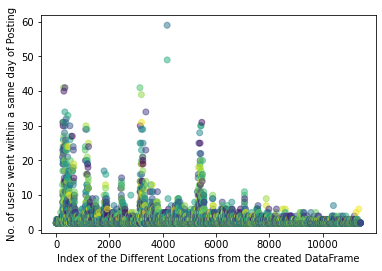

In [71]:

colors=np.random.rand(len(df_location['Location_id'].values))
plt.scatter(y=df_location['Count'].values,x=df_location.index,alpha=0.5,c=colors)
plt.xlabel('Index of the Different Locations from the created DataFrame')
plt.ylabel('No. of users went within a same day of Posting')

#### Step-9: Towards finding users who would have visited the locations within a same week
##### - I create a Counter(c) over the Location-Id which helps me to identify:
> ###### Number of distinct Location
##### - I Iterate over the key values(distinct locations) of the counter
> ###### I find those rows with the jth Location-ID to get the users visiting the location(df_location)
> ###### I create a counter(c1) over the possible dates for that location visited by the user.
##### - Now I Iterate over the possible dates of that Location-ID
> ###### Now,using the df_location dataframe I find those rows(users) which have visited that location on that day (df_location_date).
> ###### I create a counter(c2) over all the possible users('Profile_ID') that would a visited a particular location on a particular date.
> ###### I store those users in a dictionary(location_date) for which I can get with a least one-users for a location and on a particular day.
>>###### The reason to include with a location(on a particular date) with just one user as he might have gone to visit the location within span of one-week of others users.
>>###### The format for the stored dictionary:Key: Location Value: [ Date, Counter_Object( Key: Profile_id, Value: Number of time the user visited the location on that day)]



In [72]:
c=Counter(df_merged['location_id'].values)
location_date_1={}
for i,j in tq(enumerate(c.keys())):
    
    df_location=df_merged[df_merged['location_id']==j]
    c1=Counter(df_location['date'].values)
    
    for k in c1.keys():
        
        df_location_date=df_location[df_location['date']==k]
        c2=Counter(df_location_date['profile_id'])
        
        if (len(location_date_1)==0) and ((sum(c2.values())>0) and (len(c2)>0)): 
            location_date_1={j:[[k,dict(c2)]]}
            
        elif (j not in location_date_1.keys()) and ((sum(c2.values())>0) and (len(c2)>0)):
            location_date_1[j]=[[k,dict(c2)]]
            
        elif ((sum(c2.values())> 0) and (len(c2)>0)):
            location_date_1[j].append([k,dict(c2)])

                

218115it [06:59, 519.83it/s]


#### Step-10: Towards finding users who would have visited the locations within a same week
##### - I convert the stored dictionary into Dataframe(df_location) with Columns: Location_id','Date','n_users'
##### - I sort the Dataframe using columns: [Date and Location_id] to get dataframe in orders of location_id and in orders of visit for that location.
##### - Now, I take difference of consecutive rows for columns ['location_id' and 'date'] and add them as columns to the dataframe.
#####  - Copy DataFrame(df_location_1) to df_location_2. 

In [73]:
##Within a week
df_location_1=pd.DataFrame([(k,*x) for k,v in location_date_1.items() for x in v ],columns=['Location_id','Date','n_users'])
df_location_1=df_location_1.sort_values(['Location_id','Date'],ascending=[True,True])
df_location_2=df_location_1[['Location_id','Date']]
df_location_1['diff_loc']=df_location_2.diff()['Location_id']
df_location_1['diff_Date']=df_location_2.diff()['Date']
df_location_2=df_location_1

#### Step-11: Towards finding users who would have visited the locations within a same week
##### -Using the diff_Date column , a create a new column [Days] as datatype int to make easier instead of using datetime objects
>###### - The aim of sorting and taking difference was to get time difference between posts between users time of posting which would facilitate in finding the users according to the given constraint.
##### - Note the first row contains NaN values as for pandas.diff() method I need two rows to calculate the required values.

In [74]:
def get_date(x):
    try:
        return x.days
    except:
        return np.NaN

x=df_location_2['diff_Date'].apply(get_date)
df_location_2['Days']=x
df_location_2

,Location_id,Date,n_users,diff_loc,diff_Date,Days
143549,1.000000e+01,2011-02-16,{957640.0: 1},NaN,NaN,NaN
143551,1.000000e+01,2016-11-06,{1060749.0: 1},0.000000e+00,"2090 days, 0:00:00",2090.0
143550,1.000000e+01,2017-09-02,{3591211.0: 1},0.000000e+00,"300 days, 0:00:00",300.0
328787,4.600000e+01,2014-11-24,{1359813.0: 1},3.600000e+01,"-1013 days, 0:00:00",-1013.0
328786,4.600000e+01,2017-04-10,{1813011.0: 1},0.000000e+00,"868 days, 0:00:00",868.0
...,...,...,...,...,...,...
211870,3.163097e+15,2019-03-29,{2563910.0: 1},0.000000e+00,"4 days, 0:00:00",4.0
336287,3.373913e+15,2019-02-21,{672004.0: 1},2.108156e+14,"-36 days, 0:00:00",-36.0
40432,3.846355e+15,2016-10-30,{3384228.0: 1},4.724419e+14,"-844 days, 0:00:00",-844.0
294510,6.417260e+15,2019-05-05,{4197510.0: 2},2.570905e+15,"917 days, 0:00:00",917.0


#### Step-12: Towards finding users who would have visited the locations within a same week
##### In this part from the created df_location_2 I use boolean logic to find users:
>###### -Those rows for different location_id which would have day_difference between [0 and 7] 
>###### -Further to filter out, I use diff_loc value to find users with same location_id and would have posted with a span of week.
##### The results are outputed in the Dataframe x

In [75]:
x=df_location_2[(df_location_2['Days']>0) & (df_location_2['Days']<=7)] 
x=x[x['diff_loc']==0]
x

,Location_id,Date,n_users,diff_loc,diff_Date,Days
174402,1.410000e+02,2019-05-26,{990964.0: 1},0.0,"4 days, 0:00:00",4.0
237341,3.890000e+02,2019-02-24,{980862.0: 1},0.0,"7 days, 0:00:00",7.0
237338,3.890000e+02,2019-02-25,{1328827.0: 1},0.0,"1 day, 0:00:00",1.0
237337,3.890000e+02,2019-03-04,{430384.0: 1},0.0,"7 days, 0:00:00",7.0
237339,3.890000e+02,2019-03-08,{4258005.0: 1},0.0,"4 days, 0:00:00",4.0
...,...,...,...,...,...,...
281628,2.881182e+15,2019-04-25,{1006094.0: 2},0.0,"2 days, 0:00:00",2.0
375929,2.937459e+15,2019-04-07,{3456134.0: 1},0.0,"7 days, 0:00:00",7.0
375928,2.937459e+15,2019-04-14,{3456134.0: 1},0.0,"7 days, 0:00:00",7.0
212974,3.005502e+15,2019-02-26,{3317714.0: 1},0.0,"1 day, 0:00:00",1.0


#### Step-13: Towards finding users who would have visited the locations within a same week
##### - Now if we have a closely look on the final rows in x. Each value in x['Days'] corresponds to difference in consecutive rows in df_location_2 dataset.
##### - Hence, to get rows which statisfy the condition of same location_id and difference between time_stamps of being less <= 7.I use the index of x and get [j-1,j] rows from df_location_2 dataset.
>##### - Note of caution would that there might be a case that three consecutive rows follow this constraint and I would have already added the first two rows information in dictionary.
>##### - Hence,I check if the j-1 row has already been added or not.

##### - Structure of same_week: key: Index of df_location_2, Value:[Location_id, Counter of users on a particular date]


In [76]:
Same_week={}
for i,j in tq(enumerate(x.index)):
    if i==0:
        Same_week={j-1:[df_location_2.loc[j-1]['n_users'],df_location_2.loc[j-1]['Location_id']],j:[df_location_2.loc[j]['n_users'],df_location_2.loc[j]['Location_id']]}
    else:
        if j-1 in Same_week.keys():
            Same_week[j]=[df_location_2.loc[j]['n_users'],df_location_2.loc[j]['Location_id']]
        else:
            Same_week[j-1]=[df_location_2.loc[j-1]['n_users'],df_location_2.loc[j-1]['Location_id']]
            Same_week[j]=[df_location_2.loc[j]['n_users'],df_location_2.loc[j]['Location_id']]

69333it [00:28, 2454.25it/s]


#### Step-14: Towards finding users who would have visited the locations within a same week
##### - I convert the same_week dictionary to df_location_week dataframe

In [80]:

df_location_week=pd.DataFrame([(k,v[0],v[1]) for k,v in Same_week.items()],columns=['Index','n_users','Location_id',])
df_location_week=df_location_week.set_index(df_location_week.iloc[:,0])
df_location_week

                      

,Index,n_users,Location_id
Index,,,
174401,174401,{2426274.0: 1},1.410000e+02
174402,174402,{990964.0: 1},1.410000e+02
237340,237340,{4726.0: 1},3.890000e+02
237341,237341,{980862.0: 1},3.890000e+02
237337,237337,{430384.0: 1},3.890000e+02
...,...,...,...
375927,375927,{563442.0: 1},2.937459e+15
212973,212973,{118153.0: 1},2.378219e+08
212974,212974,{3317714.0: 1},3.005502e+15


#### Step-15: Towards finding users who would have visited the locations within a same week
##### - I group the rows with same location-id and aggregate all the 'n_user' into a list. 
>###### -Each row represents all the users who would have visited that location with a same week

In [81]:
df_location_week=df_location_week.groupby('Location_id')['n_users'].apply(list).reset_index(name='All the users who went within a week to that location')
df_location_week

,Location_id,All the users who went within a week to that location
0,1.410000e+02,"[{2426274.0: 1}, {990964.0: 1}]"
1,3.480000e+02,[{4110732.0: 1}]
2,3.890000e+02,"[{4726.0: 1}, {980862.0: 1}, {430384.0: 1}, {1..."
3,6.450000e+02,"[{1805926.0: 1}, {1805926.0: 1}]"
4,6.730000e+02,"[{1173802.0: 2}, {1173802.0: 1}, {720909.0: 1}..."
...,...,...
38192,3.005502e+15,"[{3317714.0: 1}, {3317714.0: 1}]"
38193,3.048956e+15,[{1655843.0: 1}]
38194,3.061592e+15,[{81044.0: 1}]
38195,3.163097e+15,[{2563910.0: 1}]


#### Step-16: Towards finding users who would have visited the locations within a same week
##### - I add a new column[Count] in df_location_week to calculate the users more explicity.


In [82]:
count=[]
for i,j in tq(enumerate(df_location_week['All the users who went within a week to that location'])):
        x=0
        for v in j:
            x += len(v)
        count.append(x)
df_location_week['Count']=count

df_location_week

38197it [00:00, 319519.25it/s]


,Location_id,All the users who went within a week to that location,Count
0,1.410000e+02,"[{2426274.0: 1}, {990964.0: 1}]",2
1,3.480000e+02,[{4110732.0: 1}],1
2,3.890000e+02,"[{4726.0: 1}, {980862.0: 1}, {430384.0: 1}, {1...",6
3,6.450000e+02,"[{1805926.0: 1}, {1805926.0: 1}]",2
4,6.730000e+02,"[{1173802.0: 2}, {1173802.0: 1}, {720909.0: 1}...",7
...,...,...,...
38192,3.005502e+15,"[{3317714.0: 1}, {3317714.0: 1}]",2
38193,3.048956e+15,[{1655843.0: 1}],1
38194,3.061592e+15,[{81044.0: 1}],1
38195,3.163097e+15,[{2563910.0: 1}],1


In [83]:
print('The Number of users that have visited a location on the same day is {}'.format(df_location_week['Count'].sum()))

The Number of users that have visited a location on the same day is 124132


#### Step-15: Scatter plot of users that have visited a location within a same week

Text(0, 0.5, 'No. of users went within a span of week')

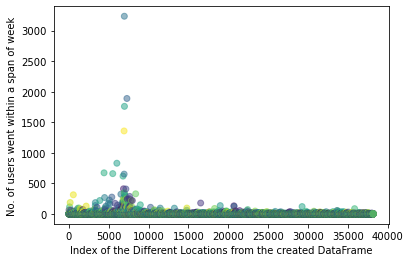

In [84]:

colors=np.random.rand(len(df_location_week['Location_id'].values))
plt.scatter(y=df_location_week['Count'].values,x=df_location_week.index,alpha=0.5,c=colors)
plt.xlabel('Index of the Different Locations from the created DataFrame')
plt.ylabel('No. of users went within a span of week')

#### Comments:
1. We can see that the influence of users posting about a particular location results in greater influence on the users(resulting them in going to the location) with number of days.
2. For the first case, I found that 32388 users have visited the locations on same day. In a way,I kind of draw onservation that users who might have seen other users post might have been influenced and went to check out that location
3. For the second case, I found that 124132 users have visited the location in same week. This number is more than the 1st Case which reflects that increase in influence of the posts over other users towards that location with span of time.
4. The total number of users considered in the analysis are 456918. 


# Bonus C 

## Implement a text data analysis (also known as text mining) of the field "description" from instagram_posts.csv for descriptions written in English. Use appropriate visualizations and statistics to highlight the words (and probably the topics) provided for the users in that field.

For this part of code we work in local cause the 4 hour limit of AWS don't allow us to work with all the 'description' data set. 

We use stopwords package to detect stopwords, the stemmer and a nltk corpus of english words to detect English words: 

In [2]:
stop = stopwords.words('english')

ps = PorterStemmer()

words = set(nltk.corpus.words.words())

We define a function that do the text cleaning in 6 steps:

    -Case normalization
    -Remove Unicode Character
    -Remove emoji
    -Remove stopwords and 'numerical terms'
    -Stemming
    -Remove non English words comparing them to a nlkt corpus
    

In [3]:
def clean_text(text): 
    
    text.lower  #case normalization

    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)  #removing unicode charachters
    
    text = clean(text, no_emoji=True) #remove emoji

    text = " ".join([word for word in text.split() if word not in (stop) and word.isalpha() == True]) #removing stopwords and 'numerical term
    
    token = word_tokenize(text) #tokenization
    
    text = [ps.stem(t) for t in token if ps.stem(t) in words] #stemming and removing non english words
    
    return(" ".join(text))

Example on how it works:

In [4]:
text = "This sample 65a5svkla _ ! #text contains laughing emojis привет меня зовут джуло 😀 😃 😄 😁 😆 😅 😂 🤣"

print(clean_text(text))

text contain laugh


The nlkt corpus doesn't contain all English terms but is more efficient instead of using 'langedetect' or in general a translation method and efficiency is the key in the case u have to deal with the large datasets of description.

We decide to create a .txt file with all the 'cleaned English description':

In [ ]:
file_object = open('/Users/giacomo/Desktop/data.txt', 'a')      

with open("/Users/giacomo/Desktop/instagram_posts.csv") as f:

    rows = csv.DictReader(f, delimiter = '\t')
    
    for r in rows: 
        
        if str(r['description']) != '\n' and str(r['description']) != '' and str(r['description']) != ' ':
            
           file_object.write(clean_text(str(r['description'])))


Now we can use a collection counter to count all the occurrences of the words that we found taking as input the .txt file: 

In [2]:
with open('/Users/giacomo/Desktop/data.txt', 'r') as f:
    
    contents = f.read()
    
    words = contents.split()
    
    counter_word = Counter(words)

To visualize these data we decide to use a ciruclar barplot in which we represent the first 30 most used words. First of all we sort the dictionary to take the most frequent words:

In [23]:
sorted_count = dict(sorted(counter_word.items(), key=lambda x: x[1], reverse=True))

first_words = list(sorted_count.keys())[0:30]

first_values = list(sorted_count.values())[0:30]

print(first_words)
print(first_values)

['n', 'de', 'love', 'day', 'get', 'la', 'one', 'time', 'like', 'beauti', 'e', 'new', 'make', 'go', 'year', 'thank', 'us', 'see', 'today', 'work', 'en', 'come', 'look', 'life', 'nn', 'good', 'friend', 'best', 'back', 'know', 'week', 'great', 'take', 'travel', 'last', 'feel', 'much', 'night', 'want', 'dont', 'first', 'food', 'way', 'thing', 'got', 'even', 'el', 'un', 'da', 'alway']
[2571761, 1135954, 952877, 748314, 580519, 569450, 561228, 555006, 531030, 457534, 455880, 450090, 427209, 414730, 412326, 408261, 405388, 381618, 373483, 364500, 363364, 361430, 355345, 344536, 337565, 314973, 309531, 296756, 296385, 287522, 277080, 276802, 268401, 266943, 262656, 261942, 260760, 251216, 248884, 245264, 243800, 232799, 232490, 229156, 228254, 227308, 224321, 221857, 216993, 213513]


We decide to remove single letter keys from the dictionary cause they don't have a significant meaning: 

In [24]:
keys = list(sorted_count.keys())

for k in keys: 
    
    if len(k) == 1: 
        
        sorted_count.pop(k)

In [27]:
first_words = list(sorted_count.keys())[0:30]

first_values = list(sorted_count.values())[0:30]

print(first_words)
print(first_values)

['de', 'love', 'day', 'get', 'la', 'one', 'time', 'like', 'beauti', 'new', 'make', 'go', 'year', 'thank', 'us', 'see', 'today', 'work', 'en', 'come', 'look', 'life', 'nn', 'good', 'friend', 'best', 'back', 'know', 'week', 'great']
[1135954, 952877, 748314, 580519, 569450, 561228, 555006, 531030, 457534, 450090, 427209, 414730, 412326, 408261, 405388, 381618, 373483, 364500, 363364, 361430, 355345, 344536, 337565, 314973, 309531, 296756, 296385, 287522, 277080, 276802]


We also decide to remove words like 'de', 'la', 'en', 'nn' that seems to have no meaning: 

In [33]:
no_meaning = ['de', 'la', 'en', 'nn']

for s in no_meaning:

    sorted_count.pop(s)

first_words = list(sorted_count.keys())[0:30]

first_values = list(sorted_count.values())[0:30]

print(first_words)
print(first_values)

['love', 'day', 'get', 'one', 'time', 'like', 'beauti', 'new', 'make', 'go', 'year', 'thank', 'us', 'see', 'today', 'work', 'come', 'look', 'life', 'good', 'friend', 'best', 'back', 'know', 'week', 'great', 'take', 'travel', 'last', 'feel']
[952877, 748314, 580519, 561228, 555006, 531030, 457534, 450090, 427209, 414730, 412326, 408261, 405388, 381618, 373483, 364500, 361430, 355345, 344536, 314973, 309531, 296756, 296385, 287522, 277080, 276802, 268401, 266943, 262656, 261942]


Then we plot the cirular barplot:

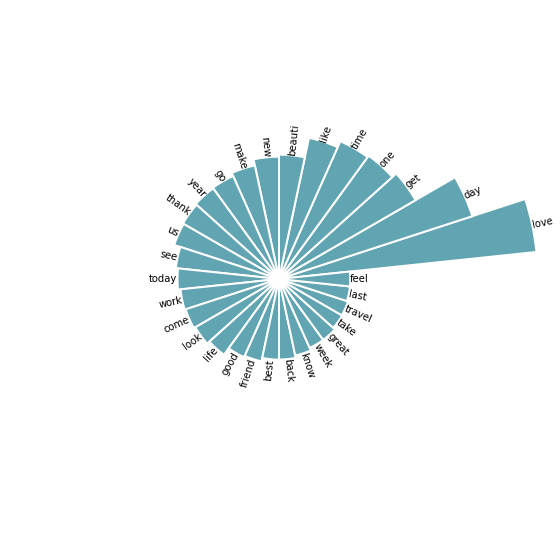

In [34]:
#Circular barplot

words = np.array(first_words)

occurrences = np.array(first_values)

# initialize the figure

plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max 
max = occurrences.max()

slope = (max - lowerLimit) / max
heights = slope * occurrences + lowerLimit

width = 2*np.pi / 30

indexes = list(range(1, 31))
angles = [element * width for element in indexes]

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

labelPadding = 4

for bar, angle, height, label in zip(bars,angles, heights, words):

   
    rotation = np.rad2deg(angle)

    
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor")

From this analysis we can say that people like to use key words refferred to what they are posting. The majority of these words seems to be referred to positive things like 'love', 'travel', 'beauti', 'friend', 'life', key words of the social world as 'like', key words reffered to changes like 'new' ecc. Also if this text data analysis have limitations like the use of a comparation method to detect english words instead of a translation method it seems to give as meaningful answers.

# AQ1 Algorithmic Questions

### Part1
What is the output of this algorithm? Describe the mechanism of the algorithm in detail . We do not want to know only its final result. (Describe one example on your own)

<b> Pseudocode: </b> 

Input: 

    N : an integer 
    List : array of characters of length N without repetition
    
function f1(sequence, end):

    For i=0 To end:
        OUTPUT sequence[i]
    EndFor
    Output "\n"
    
function f2(sequence, start, end): 

    If start = end: 
        f1(sequence, end)
    Else
        For i=start To end: 
            temp <-- sequence[start]
            sequence[start] <-- sequence[i]
            sequence[i] <-- temp
            f2(sequence, start+1, end)
            temp <-- sequence[start]
            sequence[start] <-- sequence[i]
            sequence[i] <-- temp
            
f2(List, 0, N)

### <b> Answer: </b>
This algorithm is calculating all possible permutations of an array of characters of length N without repetition. Also, we already know that the number of permutation which would be possible is n!

This is a recursive algorithm. We are going to describe this algorithm step by step with an example:

For example:   

Input:   N = 3 ,  List = ["ABC"]

Output:

ABC

ACB

BAC

BCA

CAB

CBA


<b> Description of the algorithm: </b> 

To solve this problem, we need to understand the concept of backtracking.

According to the backtracking algorithm:

1) Fix a character in the first position and swap the rest of the character with the first character. Like in ABC, in the first iteration three strings are formed: ABC, BAC, and CBA by swapping A with A, B and C respectively.


2) Repeat step 1 for the rest of the characters like fixing second character B and so on.


3) Now swap again to go back to the previous position. E.g., from ABC, we formed ABC by fixing B again, and we backtrack to the previous position and swap B with C. So, now we got ABC and ACB.


4) Repeat these steps for BAC and CBA, to get all the permutations.

We can see the recursion tree for string ABC:


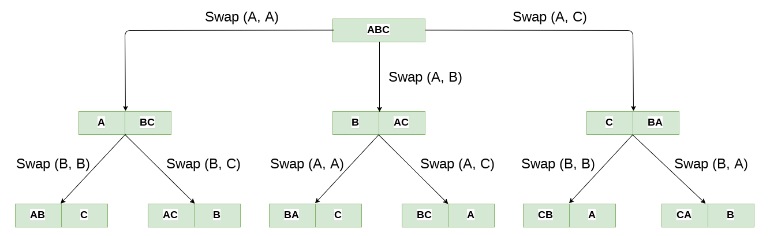



In [10]:
# Python code of the Algorithm
# 1.Define a string.
# 2.Fix a character and swap the rest of the characters.
# 3.Call the f2() for rest of the characters.
# 4.Backtrack and swap the characters again.

def f1(sequence, end): 
    print(sequence)
    print("\n")
    
def f2(sequence, start, end): 
    if start == end: 
        f1(sequence, end)
    else:
        for i in range(start, end): 
            temp = sequence[start]
            sequence[start] = sequence[i]
            sequence[i] = temp
            f2(sequence, start+1, end)
            temp = sequence[start]
            sequence[start] = sequence[i]
            sequence[i] = temp
            #print(i)
            
N= int(input('Enter N:'))
myList = list(input())
f2(myList, 0, N)

Enter N:3
ABC
['A', 'B', 'C']


['A', 'C', 'B']


['B', 'A', 'C']


['B', 'C', 'A']


['C', 'B', 'A']


['C', 'A', 'B']




### Part2
What is asymptotically (i.e., we are asking for big-O complexity) the algorithm's running time as a function of N?

### <b> Answer: </b>

n is the length of the input string, and finding all string permutations is n!. So the Time complexity is <b> O(n * n!) </b> .



### Part3
Is this algorithm the optimal one to produce this output? If not, can you suggest a better algorithm to perform the same task?


### <b> Answer: </b>

No, it is not the optimal algorithm. We can solve it in lower time complexity. With the above algorithm, we can solve the problem with time complexity O(n!).

<b> Psuedocode: </b>


- Function F1(sequence , N):
	
	- OUTPUT sequence
	- rounds <- [N, N-1, ..., 1, 0]
	- indices <- [0, 1, ..., N]
	
	- while  true:

		- for i=N to 0:

			- rounds[i] <- rounds[i]-1
			- if rounds[i]==0:
				- indices[k for k=i to N] <- indices[p for p=i+1 to N]+indices[i]3
				- rounds[i] <- N - i
			- else:
				- j <- rounds[i]
				- indices[i] <- indices[-j]
				- indices[-j] <- indices[i]
				- OUTPUT sequence[l for l=indices[0] to indices[N]]
				- Break out of the for loop
			- if i==0:
				- Break out of the while loop





# AQ2

### AQ2.1 The questions states that Alex has a ribbon of length N. He wants to cut the ribbon in a way that fulfils the following three conditions:

#### - Each piece of the cut should have an integer length
#### - He should at least cut the ribbon once
#### - The multiplication of the length of all the pieces be the maximum possible


- Okay,now the 1st and 2nd part of the questions asks us to create a `recursive algorithm` that would have `exponential` running time. 
    - This gives us a hint that there terms which are being calculated again and again which is one of the major causes of exponential running time.
    - I follow this idea to create my algorithm
    
<div class="alert alert-block alert-warning">
<b> Idea of the Naive Implementation of the algorithm:
    
    
    1. So for a Length of rope n, for the first cut I can have a length of subrope varying from [1] to [n-1]. Hence my algorithm iterates over the all the possible choice of the length of the first subrope. Let's assume for iteration [ith], i cut a rope of length i.

    2. Now, for the other part of the rope in the [ith] iteration, my goal would be to cut in the other part of the rope of length [n-i] in the most optimal way to maximumize the product of the cuts. 
    
        2.1 To evaluate this, the approach would be the same as point first to evaluate over the choices of the the possible subcuts over the length [n-i].
        
    3. It will not be always the case that splitting the leftover subparts give me the maximum product. Further, I want to state that it might be a case that [i*n-i] will give me a maximum product instead of spiliting [n-i]. 
    
    4. Hence a take a Maximimum of [i*n-i] and [i*Max_product_after_splitting]. 
    
    5. I take the maximum of all the maximum product produced from different combination of the slices produced in the point 1.
    
</div>  
    
    
<div class="alert alert-block alert-info">
<b>Pseudo Code for Naive Implementation of the Algorithm: 
   
 
##### Max_product_slice_rod_naive(n):
        1. if n<=1       (Handle Base case: I cannot Slice the rod according the given constraints.)
        2.      return 0
        3. maximum_product = - ∞
        4. for i=1 to n  ( Other Case)
        5.           maximum_product=max(maximum_product,max(i*n-i, Max_slice_product_rod_naive(n-i)*i)
        6.      return maximum_product
</div>        
    

<div class="alert alert-block alert-success">
<b>Example Case of the Algorithm :
</div>

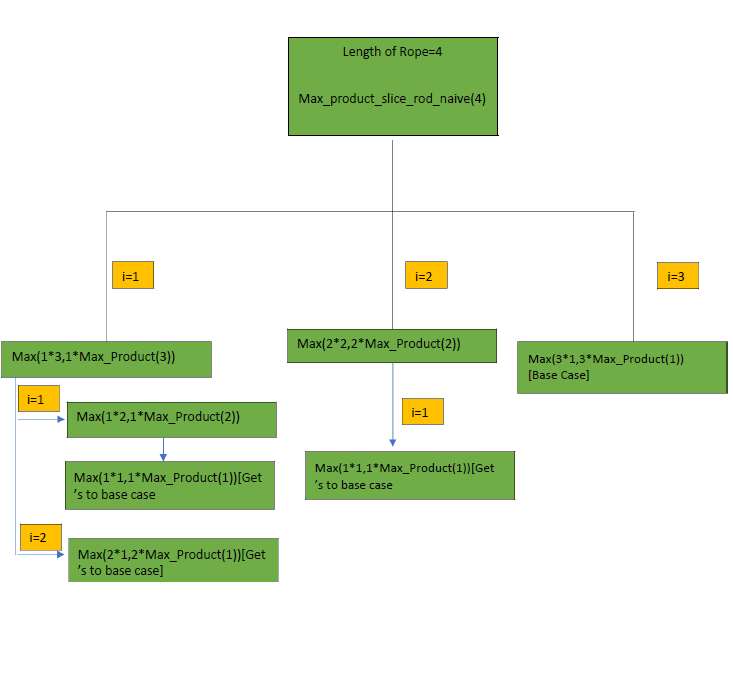

In [1]:
def Max_product_slice_rod_naive(n):
     
    # Base cases
    if (n == 0 or n == 1):
        return 0
  
    ### For cases greater than 1
    Max_Product = 0
    for i in range(1, n):
        
        
        Max_Product = max(Max_Product, max(i * (n - i),Max_product_slice_rod_naive(n - i) * i))
  
    #Return the maximum of all values
    return Max_Product

### AQ2.2 Show that the algorithm has exponential running time.

<div class="alert alert-block alert-info">
<b>Pseudo Code for Naive Implementation of the Algorithm: 
   
 
##### Max_product_slice_rod_naive(n):
        1. if n<=1       (Handle Base case: I cannot Slice the rod according the given constraints.)
        2.      return 0
        3. maximum_product = - ∞
        4. for i=1 to n  ( Other Case)
        5.           maximum_product=max(maximum_product,max(i*n-i, Max_slice_product_rod_naive(n-i)*i)
        6.      return maximum_product
</div>      
 



>#### I am gonna use this psuedo code for calculation the the Running time complexity.
>#### I assume the running time complexity when the input is of rope of length n is T(n)
>#### Now I want to write T(n) in terms of T(n-1) where n-1 is the lenght of the string.

>>#### T(n)=x + T(n-1)
>>#### To estimate x, I see the for loop and the iteration that i'm doing extra is i=n-1. For this iteration I just call Max_slice_product_rod_naive(1) only. Hence x=1 (one extra computation.
>>#### T(n)=1 + T(n-1)




>#### Now I want to write T(n) in terms of T(n-2) where n-2 is the lenght of the string.
>>#### T(n)=1 + x + T(n-2).
>>#### To estimate x, I see the for loop and the iteration that i'm doing extra is i=n-2. For this iteration I just call Max_slice_product_rod_naive(2) only. 
>>#### In recursive call of Max_slice_product_rod_naive(2), the for loop would have only one iteration Max_slice_product_rod_naive(1). 
>>#### Hence, I do total do total of two computations. Therefore x=2.
>>#### T(n)=1 + 2 + T(n-2)

>#### Now I want to write T(n) in terms of T(n-3) where n-3 is the lenght of the string.
>>#### T(n)=1 + 2 + x + T(n-3).
>>#### To estimate x, I see the for loop and the iteration that i'm doing extra is i=n-3. For this iteration I just call Max_slice_product_rod_naive(3) only. 
>>#### In recursive call of Max_slice_product_rod_naive(3), the for loop would have:
>>>####  1. Max_slice_product_rod_naive(2). From previous step I know it takes 2 recursive calls. The 
>>>####  2. Max_slice_product_rod_naive(1). This is only one recursive call.
>>#### Hence, I do total do total of 4 recursive calls 
>>>#### Max_slice_product_rod_naive(3): 1
>>>#### Max_slice_product_rod_naive(2): 1
>>>#### Max_slice_product_rod_naive(1): 2.
>>>#### (Note: the number represents number of recursive calls).


>>#### Therefore x=4 and T(n)=1 + 2 + 4 + T(n-3).

>#### Now I want to write T(n) in terms of T(n-4) where n-4 is the lenght of the string.
>>#### T(n)=1 + 2 + 4 + x + T(n-4).
>>#### To estimate x, I see the for loop and the iteration that i'm doing extra is i=n-4. For this iteration I just call Max_slice_product_rod_naive(3=4) only. 
>>#### In recursive call of Max_slice_product_rod_naive(4), the for loop would have:
>>>####  1. Max_slice_product_rod_naive(3). From previous step I know it takes 3 recursive calls.
>>>####  2. Max_slice_product_rod_naive(2). From previous step I know it takes 2 recursive calls.
>>>####  3. Max_slice_product_rod_naive(1). This is only takes 1 recursive call.
>>#### Hence, I do total do total of 8 recursive calls:
>>>#### Max_slice_product_rod_naive(4): 1
>>>#### Max_slice_product_rod_naive(3): 1
>>>#### Max_slice_product_rod_naive(2): 2
>>>#### Max_slice_product_rod_naive(1): 4 

>>#### Therefore x=8 and T(n)=1 + 2 + 4 + 8 + T(n-4).
>#### .
>#### .
>#### .
>#### .
>#### .
>#### .
>#### Based on the observation from previous steps,I can see that that T(n) can be written as T(n)= $ \sum_{i=n-k}^{n-1} 2^{n-i-1}.$ +T(n-k)
>#### Therefore T(n)= $ \sum_{i=1}^{n-1} 2^{n-i-1}.$ +T(1) and assuming T(1) takes constant time(c)

>#### Finally, I can write T(n)= $2^{n-1}-1$ + c.The running time of the Naive Recursion Algorithm is dominationed by $2^{n-1}$.
>#### The running time complexity in terms of  Big-O notations is given by $O(2^{n})$ 





 






### AQ2.3 Now provide a polynomial solution, based on dynamic programming, and compute its running-time complexity.


- In previous implemented algorithm the disadvantage of the method(see the example case for reference) we calculate the same terms consecutively and hence the goal would be to reduce the computations of the terms to just once which are repeatedly being used. 

- For this goal, we leverage the idea of the the Dynamic Programming.
    
<div class="alert alert-block alert-warning">
<b> Idea of the Dynamic Programming way of Implementation of the algorithm:
    
    
    1. Given a length of rope given as a n, I adopt a bottom-up approach to calculate the Maximum Product for the respective possible substrings combinations.

    2. I Iterate over the length of the rope from i=1 to n and then the idea of the this loop is to get Maximum Product for a string of length=i
        
    3. I create a subloop in which I iterate over the possible values of cuts of string size=i from values j=1 to i-1 to get the maximum product of string of size=i
    
    4. The important things is to note that I already know the maximum product of substrings formed in the second loop from the previous iterations for i=[1,.. i-1]
        
        4.1 Elaborating over the point 4. Suppose I store the the values of Maximum product in a variable var. 
    
        4.2 So for the iteration i, I already know the Maximum product from var[1] to var[i-1]( the index of the variable denotes the length of the string)
        
        4.3 By storing the previous Maximum Product I remove the disadvantage of the Naive-Recursive algorithm of repeated Calculations.
    
    5. Further for the logic implemented in the second loop,I state that:
    
        5.1 It will not be always the case that splitting the leftover subparts give me the maximum product. Further, I want to state that it might be case that[i*i-j] will give me a maximum product instead of spiliting the remaining substring of length i-j (var[i-j]*j) 
    
        5.2 Hence a take a Maximimum of [i*i-j] and [i*Max_product_after_splitting].(Max_product_after_splitting=var[i-j])
    
        
    
    
</div>  
    
    
<div class="alert alert-block alert-info">
<b>Pseudo Code for Naive Implementation of the Algorithm: 
   
 
##### Max_product_slice_rod_dynamic(n):
        1. if n<=1       (Handle Base case: I cannot Slice the rod according the given constraints.)
        2.      return 0
        3. var=[0,......0] has length of n. Assuming my starting index is 1.
        4. for i=1 to n  ( Other Case)
        5.    maximum_product = - ∞
        6.      for j= 1 to i-1
        7.           maximum_product=max(maximum_product,max(j*(i-j), var[i-j]*j)
        8.      var[i]= maximum_product
        9. return var[n]
</div>        
    

In [21]:

def Max_product_slice_rod_dynamic(n):
     
    # Base cases
    if (n == 0 or n == 1):
        return 0
    var=[0]*(n+1) ### Since index starts from 0,I create a variable of length of n+1 where index 1 to n represents the maximum product of string from length 1 to n.
    ### For cases greater than 1
   
    
    for i in range(1, n+1):
        #t=n-i
        Max_Product = 0
        for j in range(1,i):
           
                Max_Product = max(Max_Product, max(j * (i-j),var[i-j] *j))
        var[i]=Max_Product

  
    #Return the maximum of all values
    return var[n]

### Running time complexity for Dynamic Programming Algorithm:

#### *Approach*-

##### Assumptions: 
>##### Apart from for loops in the function I say that all the other operation are constant time with time complexity as c1. 
>##### The complexity for the loops I assume the running-time complexity is T(n)

##### 1. Suppose the time complexity for the an string of length of size n. Therefore I can write O(n)=T(n)+c

##### 2. Now if I write T(n) in terms of T(n-1). I get that O(n)=n+T(n-1)+2*c
>#####    I say for the nth iteration, due to the second subloop I perform n more steps compared to T(n-1) [ represents loops complexity, when the main loop goes from 1 to n-1]

##### 3. Going Further down I can write:
>#####   T(n)=n+ n-1 + T(n-2) + 3*c
>#####   T(n)=n+ n-1 + n-2 +T(n-3) + 4c
>#####   .
>#####   .
>#####   .
>#####   .
>#####   T(n)=n + n-1 + n-2 + n-3 + n-4 + n-5 + ...... 1 + n*c=n(n+1)/2 +n*c

##### 4. Hence overall the running-time complexity is of order O(n^2)




In [ ]:
Max_product_slice_rod_dynamic(50)

#### AQ 2.4 Evaluate the running time of your algorithm for the sizes (Ns) in the range of [2, 25], plot the results, and interpret it (if you have implemented two algorithms, please include both in the plot and compare them).

#### *Approach*:

##### - The approach for this problem is quite straightforward. I use the previously implemented two functions for recursion and dynamic programming algorithms.
##### - Then I plot a 3 line plots: One for each and one combined plot(to appreciate the running time scale difference).



100%|██████████| 24/24 [00:15<00:00,  1.50it/s] 


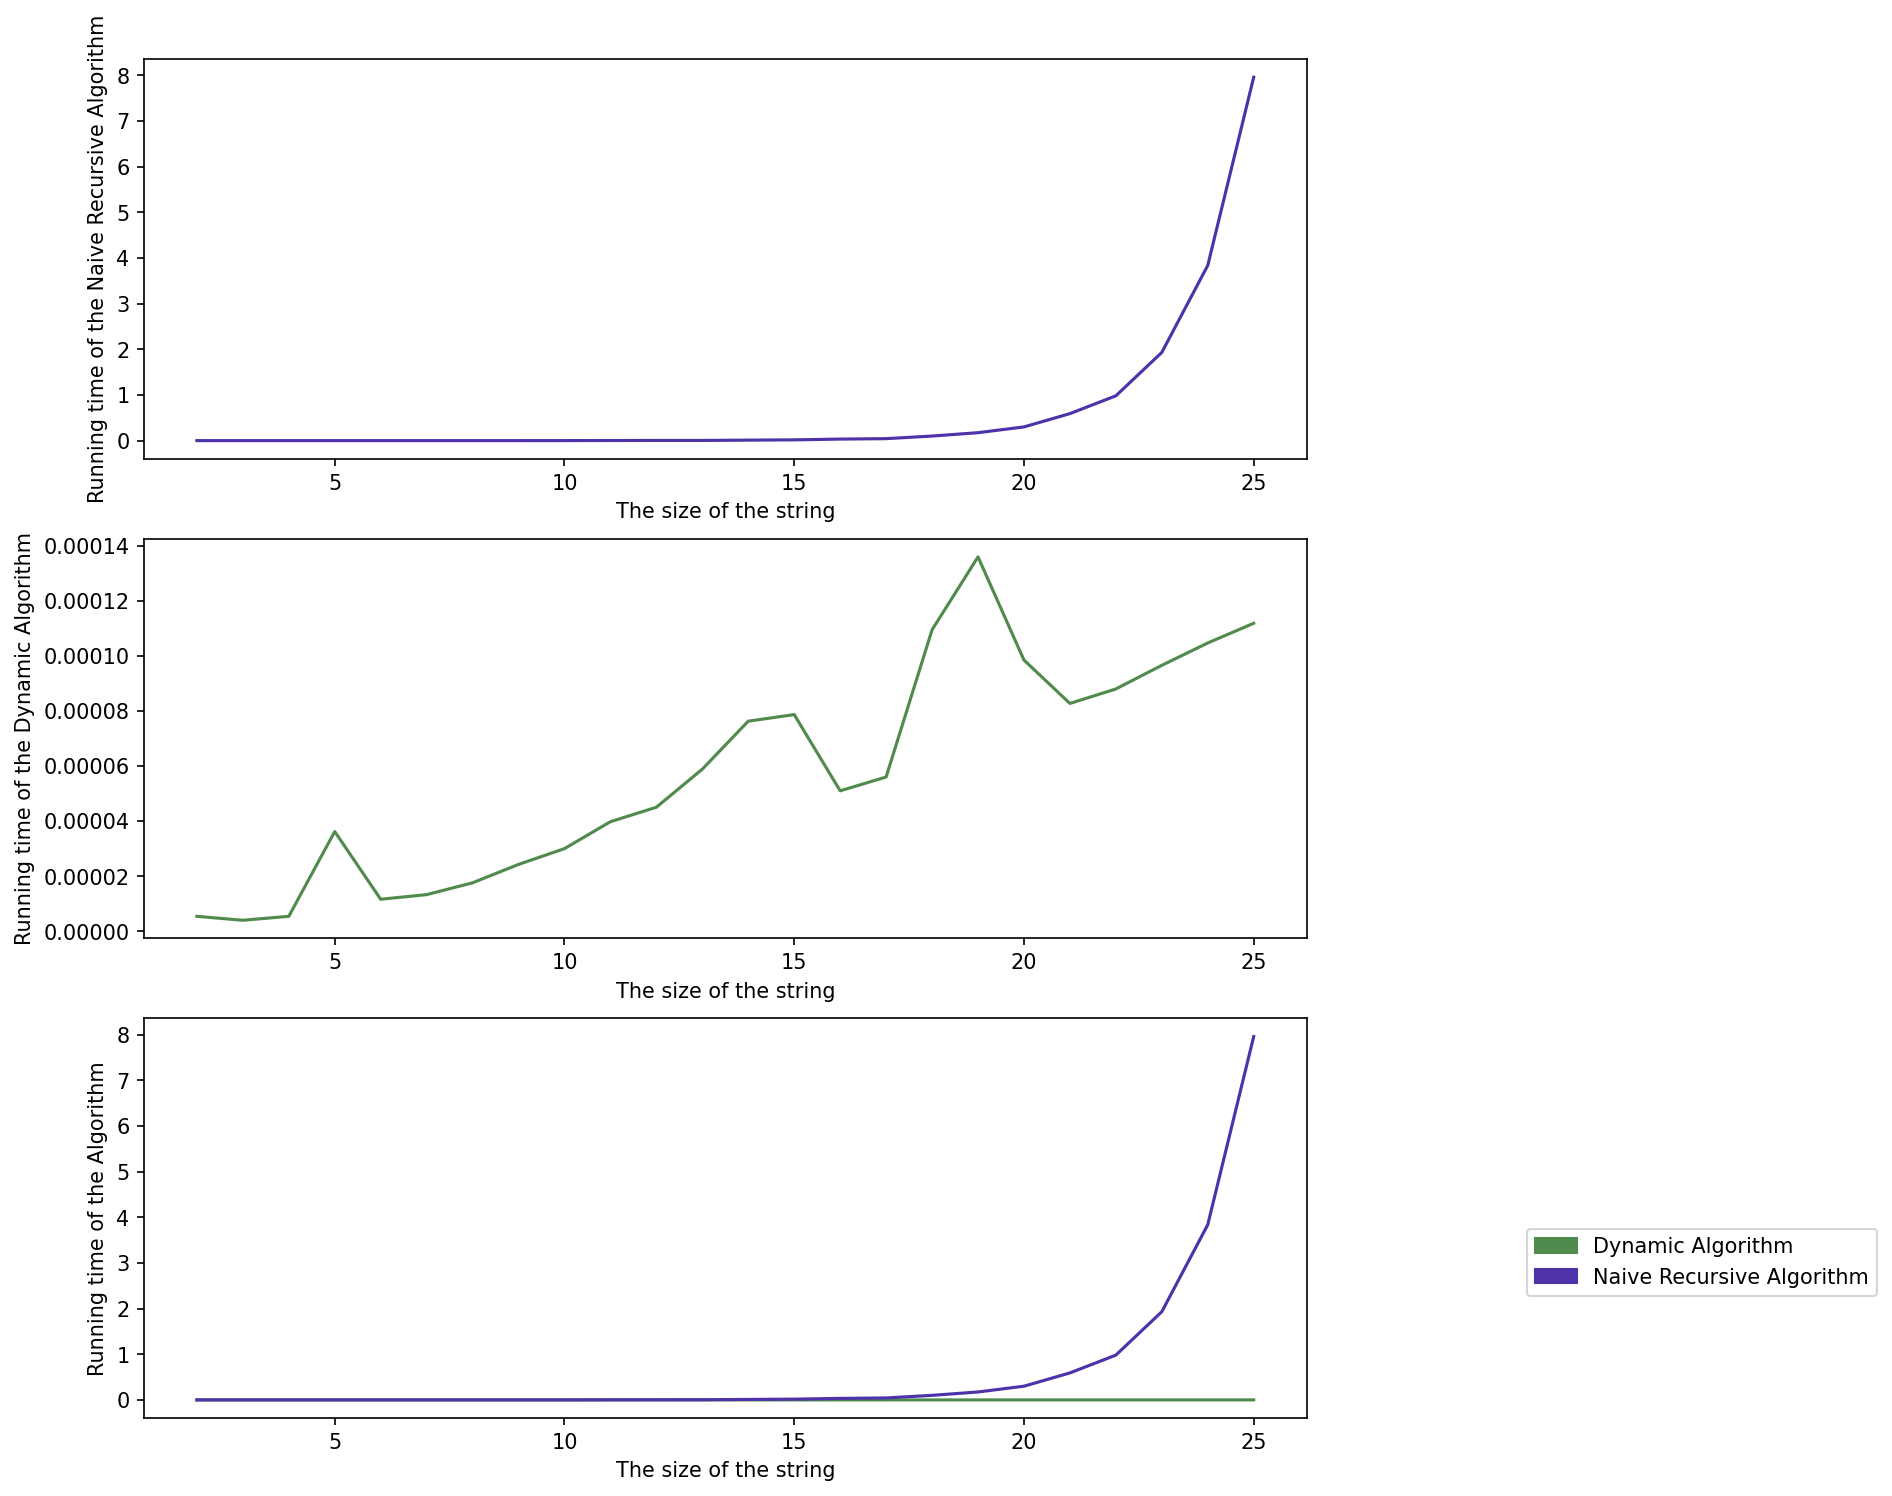

In [30]:

time1=[] ### Recursive_Exponential
time2=[] ## Dynamic_Polynomial

for i in tq(range(2,26)):
    start_time=time.time()
    Max_product_slice_rod_naive(i)
    delta=time.time()-start_time    ### Recursion Exponential
    time1.append(delta)
    
    start_time=time.time()
    Max_product_slice_rod_dynamic(i)
    delta=time.time()-start_time    ### Dynamic Polynomial
    time2.append(delta)
    
colors=[]
for i in range(2):
        colors.append( (random.random(), random.random(), random.random()))
        
plt.figure(figsize=(10, 12), dpi=150)
plt.subplot(3,1,1)
plt.plot(range(2,26),time1,color=colors[1])
plt.xlabel('The size of the string')
plt.ylabel('Running time of the Naive Recursive Algorithm')

plt.subplot(3,1,2)  
plt.plot(range(2,26),time2,color=colors[0])
plt.xlabel('The size of the string')
plt.ylabel('Running time of the Dynamic Algorithm')

plt.subplot(3,1,3)  

plt.plot(range(2,26),time2,color=colors[0])
plt.plot(range(2,26),time1,color=colors[1])
plt.xlabel('The size of the string')
plt.ylabel('Running time of the Algorithm')
labels=['Dynamic Algorithm','Naive Recursive Algorithm']
handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i,label in enumerate(labels)]
plt.legend(handles,labels,bbox_to_anchor=(1,-0.5,0.5,1))



#### Comments: 

#### 1. The dynamic programming performs way better than it's counter-part Naive Recursive algorithm and the time scale differs to the power of 10^5 between the two.
#### 2. This is mainly due to the reason that Dynamic Programming Algortihm avoids the repeated calculation of the terms being reused.

### AQ2.5 Is the algorithm of question 3 optimal? If you belive it, can you prove it? If not, can you find a faster algorithm? In case you found a faster algorithm implement it and explain your algorithm in detail.

1. The idea to implement a more optimal algorithm than dynamic programming which gives us a Polynomial Solution starts with a very simple and basic approach.

     - Before approaching towards the idea and implementation of the algorithm I would like to take your attention towards some basic mathematics:
        
    - I'm taking a list of natural number like: 2,3,4,5,6,7,8.Now suppose I want to break this number into small numbers such that sum of the smalll numbers should be equal to the original number and the produt is maximum.
            
        - 2 : 2
            
            
        - 3 : 3
            
            
         - 4 : 2 * 2
            
            
         - 5 : 3 * 2
          
            
         - 6 : 3 * 3
            
            
         - 7 : 3 * 2 * 2
            
           
         - 8 : 3 * 3 * 2
            
           
         - 9 : 3 * 3 * 3
            
           
        - 10 : 3 * 3 * 2 * 2
           
        
     - Do you notice something ?
        
        
     - From this I draw a conclusion is that for numbers greater than 4, I can break the number into smallers numbers composing of 2's and 3's whose sum is equal to the bigger number and the product is maximum for all the ranges of possible combination of smaller numbers. Let me give you a counter example which might help to make my claim stronger.Let's take the number 10.
        
        
     - I can break 10 as : 5 * 5. Don't you think if I break the 5 as : 2 * 3 I will get a bigger multiplication. Hence I break the number 5 * 5 as: 2 * 3 * 2 * 3. Voila, I hope this makes more sense to you.
        
    
<div class="alert alert-block alert-warning">
<b> Idea of the Optimal Recursive Algorithm:
    
     1. So using the idea mentioned in the point 1. I would like to take the conclusion further and implement a algorithm for the Cutting Rope Problem.
    
     2. Now if you closely see the way the list of natural number are broken into mulitple 2's and 3's you could see a pattern of finding the best set of numbers to maximise the  product of numbers such that the sum of numbers is equal to the original number.I propose:
        
        2.1 Suppose I know the set of numbers which maximise the product for Cutting_Ropes(N-1). N is the length of the number.
    
        2.2 TO find the next set of numbers which maximise the product for Cutting_ropes is equal to replacing by: minimum ( Set of numbers for Cutting_Ropes(N-1)) + 1.Until this number is less than 4.
    
        2.3 When the number is equal to 4 I can break this into : 2 * 2. This value is same as 4 but I suppose if I continue the logic given in 2.2 and the next number would be 5 according to the logic but as previously shown I can get a greater multiplication value by breaking into 2 * 3.
    
        2.4 Hence the logic and constraint in 2.2 seems logical.
    
     3. In this way I find the set of number which maximises the product using recursion. This is different than our naive algorithm implementation,in the way the tree of possible computations does not diverge and every node as a single child node.
    
    
</div>  
    
<div class="alert alert-block alert-info">
<b>Pseudo Code for Optimal Recursive Algorithm: 
   
 
##### Cutting_Ropes(n):
        1. if n <= 1       (Handle Base case: I cannot Slice the rod according the given constraints.)
        2.      return The length of the string has to be greater than 2
        3. if n == 2       (Handle Base case)
        4.      return [2]
        5. if n == 3       (Handle Base case)
        6.      return [3]
        7. if n > 3
        8.        previous_set_numbers=Cutting_Ropes(n-1)
        9.        min_element=min(previous_set_numbers) + 1
        10.        previous_set_numbers.remove(min_element)
        11.        if min_element < 4
        12.             next_set=previous_set_numbers.add(min_element)
        13.             retrun next_set
        14.       else:
        15.             next_set=previous_set_number.add(2,2)
        16.             return next_set  
                   
</div> 


<div class="alert alert-block alert-success">
<b>Example Case of the Algorithm :
</div>

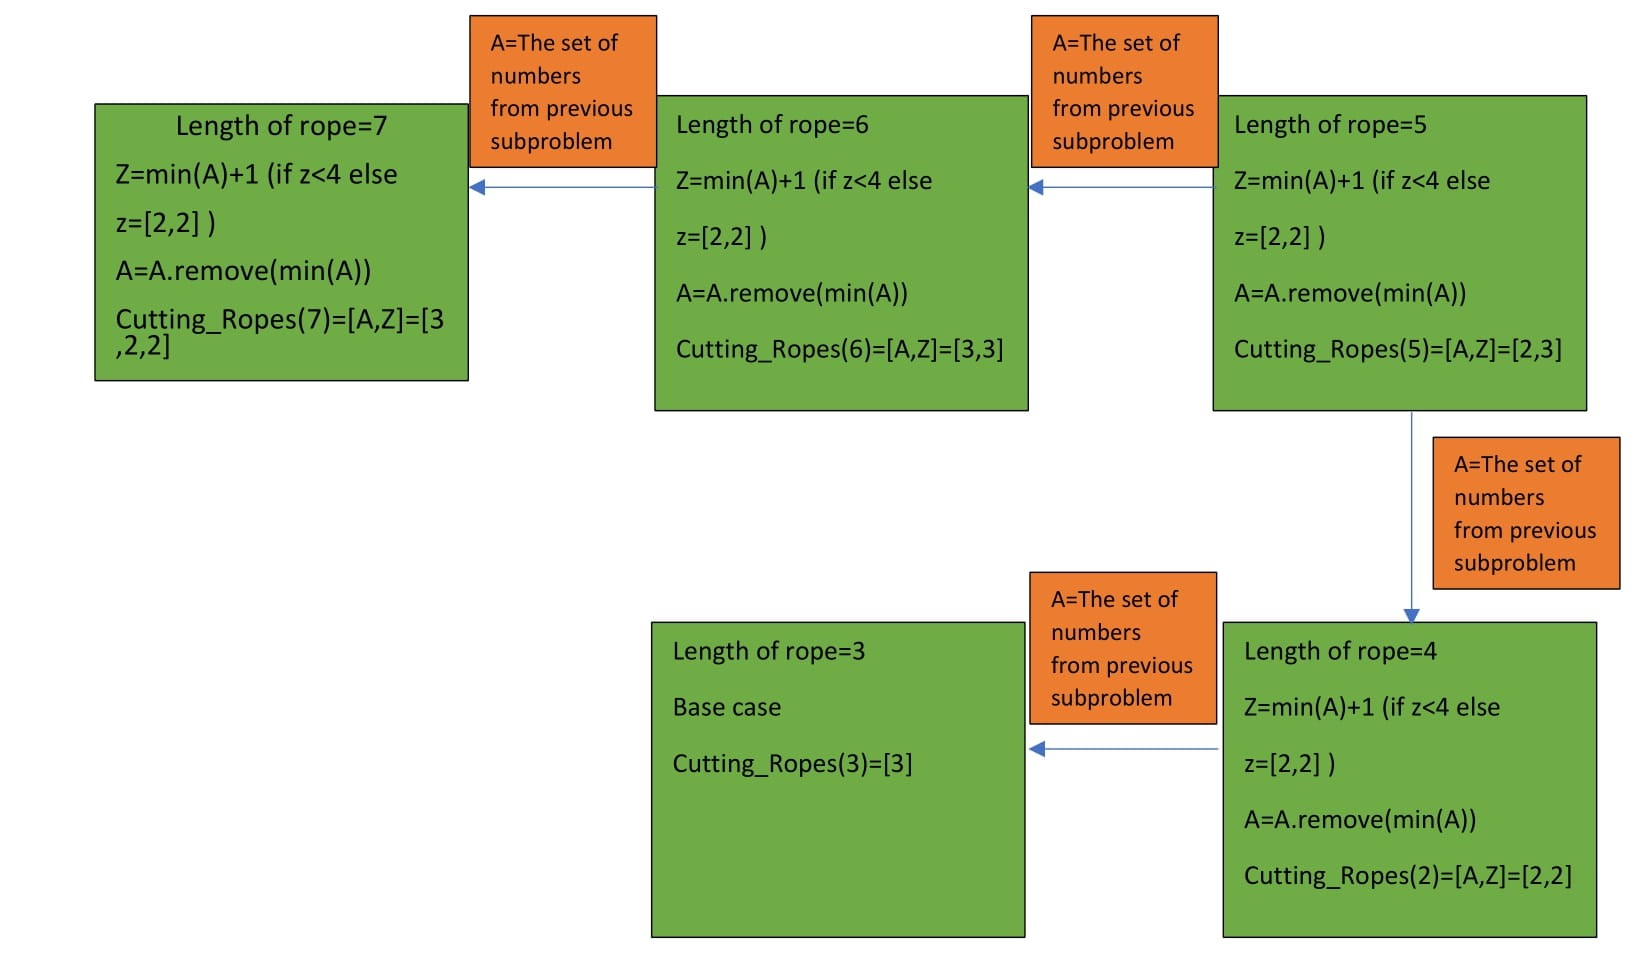

In [1]:
def cutting_ropes(n):
    if n<=1:
        return [1]
    if n==2:
        x=[2]
        
        return x
    if n==3:
        x=[3]
        
        return x
    
    if n>3:
        previous_elements=cutting_ropes(n-1)
        
        z=min(previous_elements)+1
        previous_elements.remove(min(previous_elements))
        if z<4:

            previous_elements.append(z)
            return previous_elements
        else:
            previous_elements.append(2)
            previous_elements.append(2)
            return previous_elements
        

In [2]:
def ropes_multi(x:list):
    w=1
    if (len(x)==1) and ((x[0]==1) or (x[0]==2) or (x[0]==3) ):
        return print('The length of the string has to be greater than 3 to be able to divide to follow the constrains given')
    else:
        for i in x:
            w=w*i
    return w

In [11]:
ropes_multi(cutting_ropes(50))

86093442

100%|██████████| 38/38 [00:00<00:00, 4267.64it/s]

The length of the string has to be greater than 3 to be able to divide to follow the constrains given
The length of the string has to be greater than 3 to be able to divide to follow the constrains given


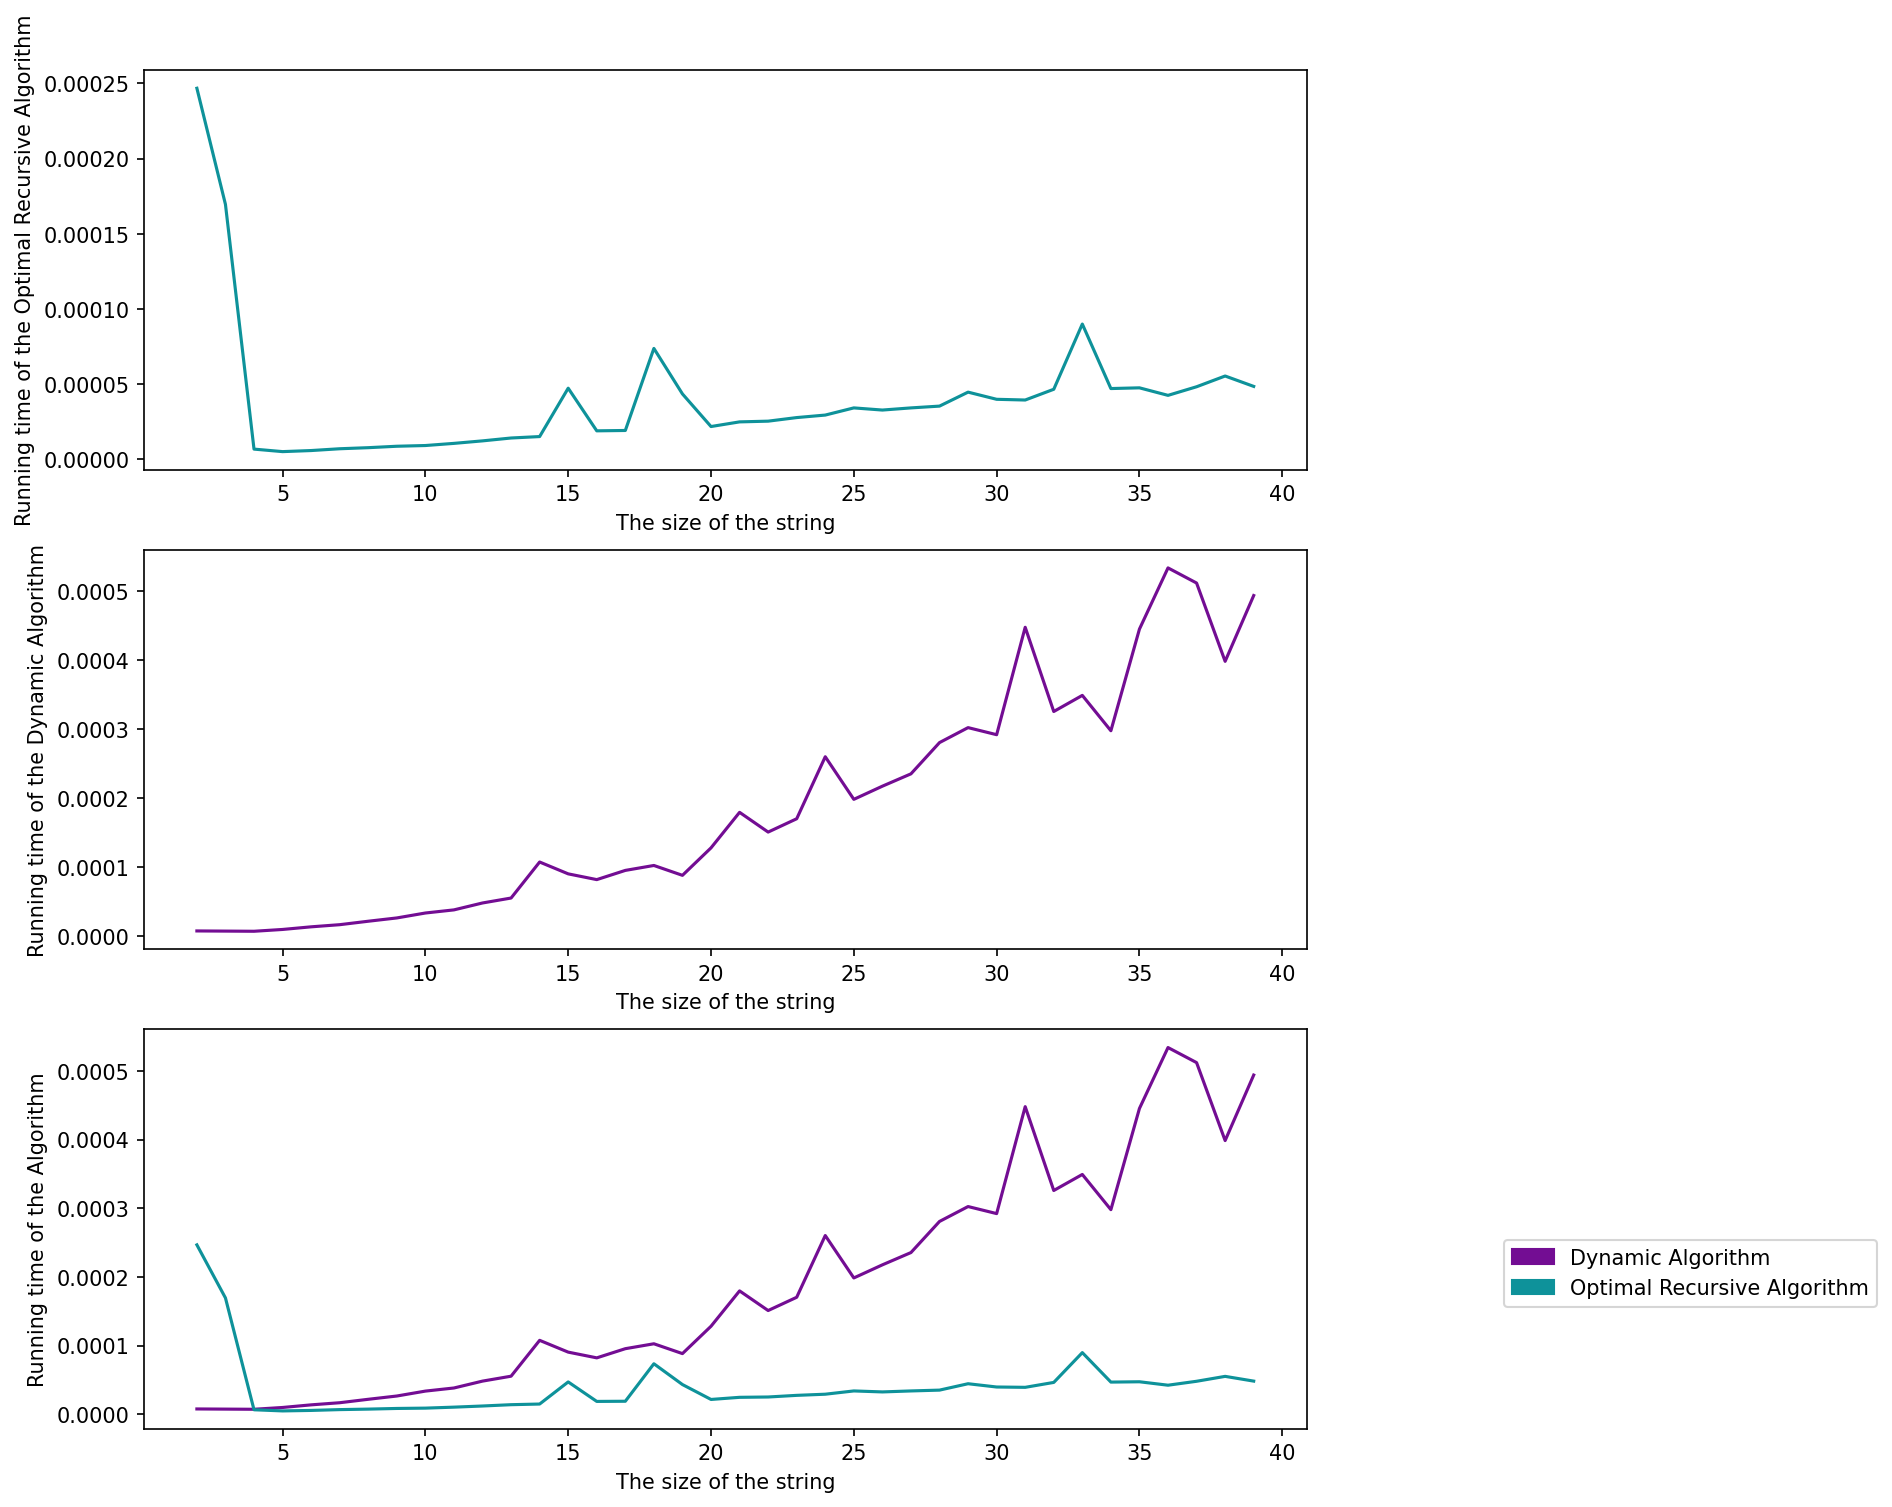

In [27]:

time1=[] ### Recursive_Exponential
time2=[] ## Dynamic_Polynomial

for i in tq(range(2,40)):
    start_time=time.time()
    ropes_multi(cutting_ropes(i))
    delta=time.time()-start_time    ### Recursion Exponential
    time1.append(delta)
    
    start_time=time.time()
    Max_product_slice_rod_dynamic(i)
    delta=time.time()-start_time    ### Dynamic Polynomial
    time2.append(delta)
    
colors=[]
for i in range(2):
        colors.append( (random.random(), random.random(), random.random()))
        
plt.figure(figsize=(10, 12), dpi=150)
plt.subplot(3,1,1)
plt.plot(range(2,40),time1,color=colors[1])
plt.xlabel('The size of the string')
plt.ylabel('Running time of the Optimal Recursive Algorithm')

plt.subplot(3,1,2)  
plt.plot(range(2,40),time2,color=colors[0])
plt.xlabel('The size of the string')
plt.ylabel('Running time of the Dynamic Algorithm')

plt.subplot(3,1,3)  

plt.plot(range(2,40),time2,color=colors[0])
plt.plot(range(2,40),time1,color=colors[1])
plt.xlabel('The size of the string')
plt.ylabel('Running time of the Algorithm')
labels=['Dynamic Algorithm','Optimal Recursive Algorithm']
handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i,label in enumerate(labels)]
plt.legend(handles,labels,bbox_to_anchor=(1,-0.5,0.5,1))



### Comments: 

#### We can see that Optimal Recursive Algorithm works way better than Dynammic Programming method for large values of n

#### The running time complexity of the Optimal Recursive Algorithm is almost constant time.




